# **Dicionário**

id_ocorrencia - identificação única da ocorrência

cidade - A cidade onde aconteceu a ocorrência

população - Pupulação da cidade

horario - horario da ocorrencia com data e hora

vtr - viatura empenhanha na ocorrencia

mtcl - matricula do militar ou cpf do Bombeiro comunitario

militar_bc - identificação se o individuo é Bombeiro Comunitário ou Bombeiro
Militar

bc_indenizado - Identifica se o Bombeiro Comunitario estava no serviço sendo
pago(indenizado) ou não

obm - Organização Bombeiro Militar que estava na ocorrência

coordenada_obm - Coordenada da organização Bombeiro Militar

coordenada_ocorrencia - Coordenada da Ocorrência

lat_ocorrencia - Latitude ocorrência

lon_ocorrencia - Longitude Ocorrência

tipo - Tipo da ocorrência, pode ser Atendimento pré-hospitalar - APH, incendio, acidente e outros.

subtipo - especifica o tipo, num APH, pode especificar desmaio, nem sempre é preenchido.

tempo_resposta - Tempo do acionamento até a chegada ao local da ocorrêcia, pode ser um dado que estaja bem falho, pois acontece do bombeiro esquecer de clicar no botão

tempo_total_empenho - tempo total da saída da obm até a chegada a obm novamente.
firecast - indica se uma viatura utilizou o sistema "firecast" para dar J-9, J-10, J-11 e J-12 nos deslocamentos

origem_samu - Se foi um repasse da ocorrência que era do samu

vitima - geração no sistema, talvez de pra gerar o número de vítimas, nome, idade, alguns sinais vitais.

In [1]:
import pandas as pd

# Load the data into a DataFrame
df = pd.read_csv('Data/datasets/datasetTratadoFloripa5.csv', sep=',', thousands=',')

# Drop duplicates based on 'NrOcorrência'
X = df.drop_duplicates(subset="NrOcorrência", keep=False)

# Select the columns of interest
X = X.loc[:, ['NrOcorrência', 'Cidade', 'Data/Hora', 'lat_ocorrencia', 'lon_ocorrencia', 'TipoOcorrênciaEncerramento']]


# X = X.loc[(X['TipoOcorrênciaEncerramento'] == 'AÇÕES PREVENTIVAS') | (X['TipoOcorrênciaEncerramento'] == 'SALVAMENTO / BUSCA / RESGATE') | (X['TipoOcorrênciaEncerramento'] == 'AVERIGUAÇÃO / MANEJO DE INSETO') | (X['TipoOcorrênciaEncerramento'] == 'INCÊNDIO')]
X = X.loc[X['TipoOcorrênciaEncerramento'] == 'ATENDIMENTO PRÉ-HOSPITALAR']


X = X.loc[X["lat_ocorrencia"] >= -48.61,:]

X["Date"] = pd.to_datetime(X["Data/Hora"], infer_datetime_format=True).dt.floor('1D')

# Count the number of missing values in 'lat_ocorrencia' and 'lon_ocorrencia' columns
missing_lat = X['lat_ocorrencia'].isna().sum()
missing_lon = X['lon_ocorrencia'].isna().sum()

print("Number of missing values in 'lat_ocorrencia':", missing_lat)
print("Number of missing values in 'lon_ocorrencia':", missing_lon)
X

Number of missing values in 'lat_ocorrencia': 0
Number of missing values in 'lon_ocorrencia': 0


NrOcorrência         Cidade            Data/Hora  lat_ocorrencia  \
0        10085306.0  Florianópolis  2018-01-01 01:07:47      -48.583567   
1        10085307.0  Florianópolis  2018-01-01 01:51:00      -48.499719   
3        10085311.0  Florianópolis  2018-01-01 02:34:00      -48.430948   
4        10085313.0  Florianópolis  2018-01-01 04:56:00      -48.502000   
5        10085314.0  Florianópolis  2018-01-01 05:25:00      -48.446964   
...             ...            ...                  ...             ...   
64968   130319356.0  Florianópolis  2023-07-30 19:04:54      -48.397082   
64970   130319412.0  Florianópolis  2023-07-30 20:27:56      -48.400281   
64971   130319424.0  Florianópolis  2023-07-30 20:49:08      -48.600708   
64973   130319468.0  Florianópolis  2023-07-30 22:20:41      -48.552170   
64974   130319514.0  Florianópolis  2023-07-31 03:59:59      -48.405436   

       lon_ocorrencia  TipoOcorrênciaEncerramento       Date  
0          -27.603720  ATENDIMENTO PRÉ-HOSPITALAR 2018-01-01  
1          -27.438892  ATENDIMENTO PRÉ-HOSPITALAR 2018-01-01  
3          -27.573438  ATENDIMENTO PRÉ-HOSPITALAR 2018-01-01  
4          -27.446556  ATENDIMENTO PRÉ-HOSPITALAR 2018-01-01  
5          -27.609410  ATENDIMENTO PRÉ-HOSPITALAR 2018-01-01  
...               ...                         ...        ...  
64968      -27.452763  ATENDIMENTO PRÉ-HOSPITALAR 2023-07-30  
64970      -27.456841  ATENDIMENTO PRÉ-HOSPITALAR 2023-07-30  
64971      -27.595756  ATENDIMENTO PRÉ-HOSPITALAR 2023-07-30  
64973      -27.598435  ATENDIMENTO PRÉ-HOSPITALAR 2023-07-30  
64974      -27.452575  ATENDIMENTO PRÉ-HOSPITALAR 2023-07-31  

[24806 rows x 7 columns]

TESTES

In [2]:
X["Date"] = pd.to_datetime(X["Data/Hora"], infer_datetime_format=True).dt.floor('1D')
missing_lat = X['lat_ocorrencia'].isna().sum()
missing_lon = X['lon_ocorrencia'].isna().sum()

print("Number of missing values in 'lat_ocorrencia':", missing_lat)
print("Number of missing values in 'lon_ocorrencia':", missing_lon)
X

Number of missing values in 'lat_ocorrencia': 0
Number of missing values in 'lon_ocorrencia': 0


NrOcorrência         Cidade            Data/Hora  lat_ocorrencia  \
0        10085306.0  Florianópolis  2018-01-01 01:07:47      -48.583567   
1        10085307.0  Florianópolis  2018-01-01 01:51:00      -48.499719   
3        10085311.0  Florianópolis  2018-01-01 02:34:00      -48.430948   
4        10085313.0  Florianópolis  2018-01-01 04:56:00      -48.502000   
5        10085314.0  Florianópolis  2018-01-01 05:25:00      -48.446964   
...             ...            ...                  ...             ...   
64968   130319356.0  Florianópolis  2023-07-30 19:04:54      -48.397082   
64970   130319412.0  Florianópolis  2023-07-30 20:27:56      -48.400281   
64971   130319424.0  Florianópolis  2023-07-30 20:49:08      -48.600708   
64973   130319468.0  Florianópolis  2023-07-30 22:20:41      -48.552170   
64974   130319514.0  Florianópolis  2023-07-31 03:59:59      -48.405436   

       lon_ocorrencia  TipoOcorrênciaEncerramento       Date  
0          -27.603720  ATENDIMENTO PRÉ-HOSPITALAR 2018-01-01  
1          -27.438892  ATENDIMENTO PRÉ-HOSPITALAR 2018-01-01  
3          -27.573438  ATENDIMENTO PRÉ-HOSPITALAR 2018-01-01  
4          -27.446556  ATENDIMENTO PRÉ-HOSPITALAR 2018-01-01  
5          -27.609410  ATENDIMENTO PRÉ-HOSPITALAR 2018-01-01  
...               ...                         ...        ...  
64968      -27.452763  ATENDIMENTO PRÉ-HOSPITALAR 2023-07-30  
64970      -27.456841  ATENDIMENTO PRÉ-HOSPITALAR 2023-07-30  
64971      -27.595756  ATENDIMENTO PRÉ-HOSPITALAR 2023-07-30  
64973      -27.598435  ATENDIMENTO PRÉ-HOSPITALAR 2023-07-30  
64974      -27.452575  ATENDIMENTO PRÉ-HOSPITALAR 2023-07-31  

[24806 rows x 7 columns]

In [5]:
X['Date'].groupby([X.Date.dt.year]).agg('count')


Date
2018    4522
2019    4991
2020    3698
2021    4103
2022    4525
2023    2967
Name: Date, dtype: int64

In [2]:
# Count the number of NaN values in 'lat_ocorrencia' and 'lon_ocorrencia' before dropping
num_nan_before = X['lat_ocorrencia'].isnull().sum() + X['lon_ocorrencia'].isnull().sum()

# Drop the rows with NaN values in 'lat_ocorrencia' and 'lon_ocorrencia'
df_dropped = X.dropna(subset=['lat_ocorrencia', 'lon_ocorrencia'])

# Count the number of NaN values in 'lat_ocorrencia' and 'lon_ocorrencia' after dropping
num_nan_after = df_dropped['lat_ocorrencia'].isnull().sum() + df_dropped['lon_ocorrencia'].isnull().sum()

# Calculate the number of rows dropped
num_rows_dropped = len(X) - len(df_dropped)

print(f"Number of NaN values in 'lat_ocorrencia' and 'lon_ocorrencia' before dropping: {num_nan_before}")
print(f"Number of NaN values in 'lat_ocorrencia' and 'lon_ocorrencia' after dropping: {num_nan_after}")
print(f"Number of rows dropped: {num_rows_dropped}")

Number of NaN values in 'lat_ocorrencia' and 'lon_ocorrencia' before dropping: 0
Number of NaN values in 'lat_ocorrencia' and 'lon_ocorrencia' after dropping: 0
Number of rows dropped: 0


In [17]:
df_dropped = df_dropped.loc[df_dropped["lat_ocorrencia"] >= -48.61,:]
df_dropped

NrOcorrência         Cidade            Data/Hora  lat_ocorrencia  \
0        10085306.0  Florianópolis  2018-01-01 01:07:47      -48.583567   
1        10085307.0  Florianópolis  2018-01-01 01:51:00      -48.499719   
3        10085311.0  Florianópolis  2018-01-01 02:34:00      -48.430948   
4        10085313.0  Florianópolis  2018-01-01 04:56:00      -48.502000   
5        10085314.0  Florianópolis  2018-01-01 05:25:00      -48.446964   
...             ...            ...                  ...             ...   
64968   130319356.0  Florianópolis  2023-07-30 19:04:54      -48.397082   
64970   130319412.0  Florianópolis  2023-07-30 20:27:56      -48.400281   
64971   130319424.0  Florianópolis  2023-07-30 20:49:08      -48.600708   
64973   130319468.0  Florianópolis  2023-07-30 22:20:41      -48.552170   
64974   130319514.0  Florianópolis  2023-07-31 03:59:59      -48.405436   

       lon_ocorrencia  TipoOcorrênciaEncerramento       Date cluster_label  
0          -27.603720  ATENDIMENTO PRÉ-HOSPITALAR 2018-01-01             0  
1          -27.438892  ATENDIMENTO PRÉ-HOSPITALAR 2018-01-01             1  
3          -27.573438  ATENDIMENTO PRÉ-HOSPITALAR 2018-01-01             1  
4          -27.446556  ATENDIMENTO PRÉ-HOSPITALAR 2018-01-01             1  
5          -27.609410  ATENDIMENTO PRÉ-HOSPITALAR 2018-01-01             0  
...               ...                         ...        ...           ...  
64968      -27.452763  ATENDIMENTO PRÉ-HOSPITALAR 2023-07-30             1  
64970      -27.456841  ATENDIMENTO PRÉ-HOSPITALAR 2023-07-30             1  
64971      -27.595756  ATENDIMENTO PRÉ-HOSPITALAR 2023-07-30             0  
64973      -27.598435  ATENDIMENTO PRÉ-HOSPITALAR 2023-07-30             0  
64974      -27.452575  ATENDIMENTO PRÉ-HOSPITALAR 2023-07-31             1  

[24806 rows x 8 columns]

In [5]:
X['Date'].groupby([X.Date.dt.year, X.TipoOcorrênciaEncerramento]).agg('count')


In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters = 4, init ='k-means++', n_init='auto', random_state=42)
kmeans.fit(X[X.columns[3:5]]) # Compute k-means clustering.
X['cluster_label'] = kmeans.fit_predict(X[X.columns[3:5]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(X[X.columns[3:5]]) # Labels of each point


Data = pd.DataFrame()
#print(Data)
#criar coluna X_dia

X['cluster_label'] = X['cluster_label'].astype('category')
v = X.groupby(['Date', 'cluster_label']).size().unstack(fill_value=0)

silhouette_avg = silhouette_score(X[X.columns[3:5]], X['cluster_label'])
print(f"Average Silhouette Score: {silhouette_avg}")
#binary_z = (z > 0).astype(int) #changing to binary dataset
#v = binary_z


Average Silhouette Score: 0.5595237322680485


In [3]:
v.describe()

cluster_label            0            1            2            3
count          2037.000000  2037.000000  2037.000000  2037.000000
mean              1.447226     2.924890     5.556210     2.249386
std               1.348720     1.808014     3.478026     1.598027
min               0.000000     0.000000     0.000000     0.000000
25%               0.000000     2.000000     4.000000     1.000000
50%               1.000000     3.000000     5.000000     2.000000
75%               2.000000     4.000000     7.000000     3.000000
max               8.000000    11.000000    95.000000     9.000000

In [3]:
v.sum(axis=0)

cluster_label
0    1788
1    3173
2    1602
3    1490
dtype: int64

In [11]:
n_clusters = 4
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score

kmedoids = KMedoids(n_clusters=n_clusters, random_state=42)
kmedoids.fit(X[X.columns[3:5]])  # Compute K-medoids clustering.
X['cluster_label'] = kmedoids.labels_

X['cluster_label'] = X['cluster_label'].astype('category')
v = X.groupby(['Date', 'cluster_label'], observed=False).size().unstack(fill_value=0)

silhouette_avg = silhouette_score(X[X.columns[3:5]], X['cluster_label'])
print(f"Average Silhouette Score: {silhouette_avg}")

Average Silhouette Score: 0.5350417238217386


Average Silhouette Score: 0.5591373818616432


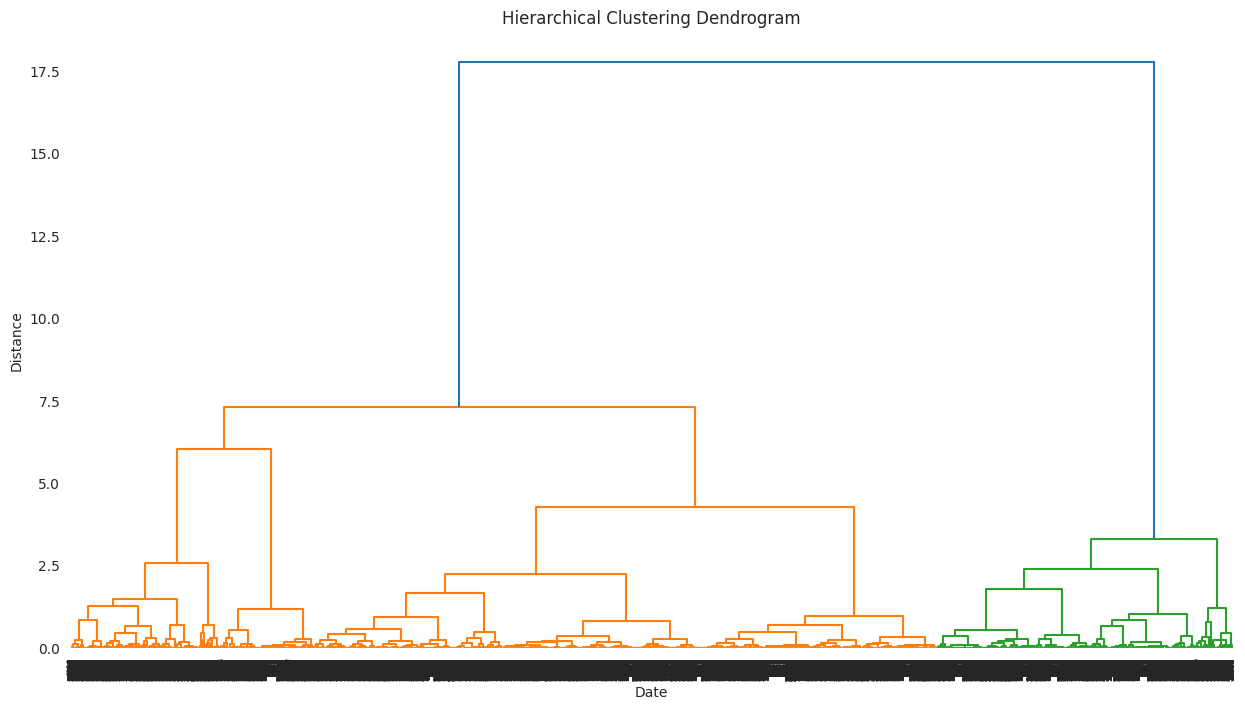

In [15]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage

def plot_dendrogram(data, method='ward'):
    Z = linkage(data[data.columns[3:5]], method)

    plt.figure(figsize=(15, 8))
    dendrogram(Z, orientation='top', distance_sort='descending')
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Date')
    plt.ylabel('Distance')
    plt.show()

n_clusters = 4  # 
hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
X['cluster_label'] = hierarchical.fit_predict(X[X.columns[3:5]])

X['cluster_label'] = X['cluster_label'].astype('category')
v = X.groupby(['Date', 'cluster_label'], observed=False).size().unstack(fill_value=0)

silhouette_avg = silhouette_score(X[X.columns[3:5]], X['cluster_label'])
print(f"Average Silhouette Score: {silhouette_avg}")

plot_dendrogram(X)

In [22]:
# training_dataX = v.loc[:,3]
training_dataX = v.sum(axis=1)

train_data_size = int(training_dataX.shape[0]*0.7)
trainX = training_dataX[:train_data_size]


test = training_dataX[train_data_size:]




#print(training_dataX)
test

Date
2021-11-19    3
2021-11-20    4
2021-11-21    6
2021-11-22    4
2021-11-23    7
             ..
2023-07-25    5
2023-07-26    2
2023-07-27    2
2023-07-28    2
2023-07-30    4
Length: 583, dtype: int64

In [25]:
#from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

#df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv', names=['value'], header=0)

model = pm.auto_arima(trainX, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=10, max_q=10, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=1, 
                      D=None, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=8373.452, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=6947.000, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=7711.517, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=6665.012, Time=0.07 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=6553.048, Time=0.09 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=6475.687, Time=0.12 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=6432.929, Time=0.16 sec
 ARIMA(6,0,0)(0,0,0)[0]             : AIC=6396.969, Time=0.24 sec
 ARIMA(7,0,0)(0,0,0)[0]             : AIC=6389.793, Time=0.39 sec
 ARIMA(8,0,0)(0,0,0)[0]             : AIC=inf, Time=0.38 sec
 ARIMA(7,0,1)(0,0,0)[0]             : AIC=6296.384, Time=3.87 sec
 ARIMA(6,0,1)(0,0,0)[0]             : AIC=6296.474, Time=2.46 sec
 ARIMA(8,0,1)(0,0,0)[0]             : AIC=6297.292, Time=1.22 sec
 ARIMA(7,0,2)(0,0,0)[0]             : AIC=6300.472, Time=0.83 sec
 ARIMA(6,0,2)(0,0,0)[0]             : 

In [26]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
# Make predictions on the test data
predictions, conf_int = model.predict(n_periods=len(test), return_conf_int=True)


# Calculate regression metrics
r2 = r2_score(test, predictions)
mae = mean_absolute_error(test, predictions)
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)

# Print regression metrics
print("R-squared:", r2)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

R-squared: -0.36213509128404
Mean Absolute Error (MAE): 2.0145288017315797
Mean Squared Error (MSE): 5.671963398359022
Root Mean Squared Error (RMSE): 2.381588419177214


/home/dsciaux1/PycharmProjects/pythonProject/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


0


/tmp/ipykernel_121407/2285120017.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['y_pred'] = svr_model.predict(test[['ds']])


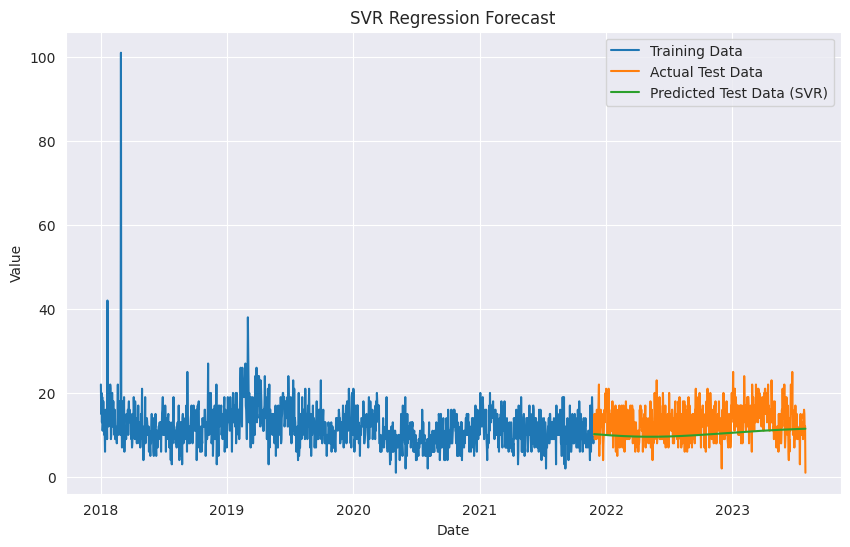

R-squared: -0.4678000486577387
Mean Absolute Error (MAE): 3.729778717800571
Mean Squared Error (MSE): 22.05481026591378
Root Mean Squared Error (RMSE): 4.696254919179088


In [65]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
import matplotlib.pyplot as plt

training_dataX = v.sum(axis=1)
print(training_dataX.isnull().sum())

training_dataX = training_dataX.fillna(training_dataX.mean())

train_data_size = int(training_dataX.shape[0] * 0.7)
train_df = pd.DataFrame({'ds': training_dataX.index, 'y': training_dataX.values})
train = train_df.iloc[:train_data_size]
test = train_df.iloc[train_data_size:]

svr_model = SVR(C=1.0, epsilon=0.2)
svr_model.fit(train[['ds']], train['y'])

test['y_pred'] = svr_model.predict(test[['ds']])

plt.figure(figsize=(10, 6))
plt.plot(train['ds'], train['y'], label='Training Data')
plt.plot(test['ds'], test['y'], label='Actual Test Data')
plt.plot(test['ds'], test['y_pred'], label='Predicted Test Data (SVR)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('SVR Regression Forecast')
plt.legend()
plt.show()

r2 = r2_score(test['y'], test['y_pred'])
mae = mean_absolute_error(test['y'], test['y_pred'])
mse = mean_squared_error(test['y'], test['y_pred'])
rmse = sqrt(mse)

print("R-squared:", r2)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


0
Best Period: 90


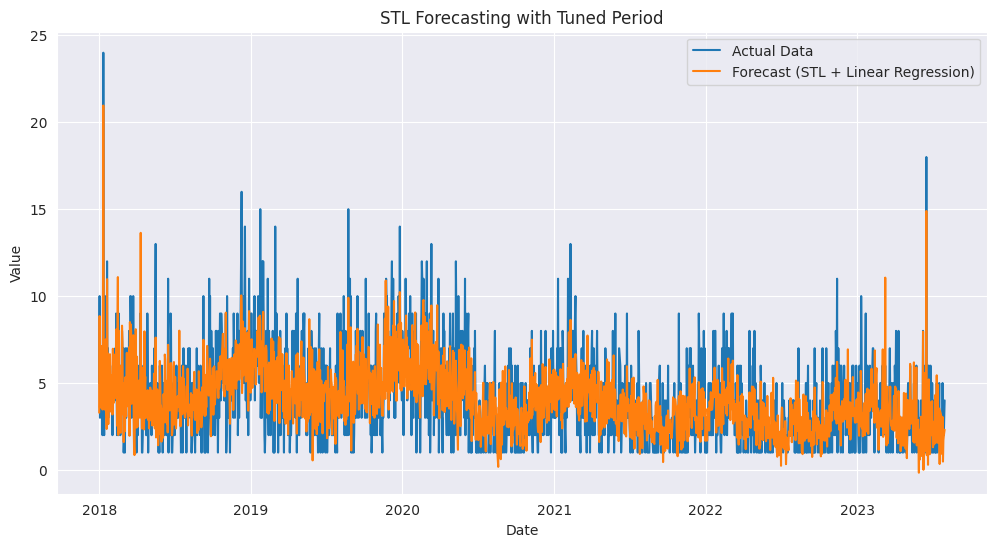

In [27]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import STL
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
from sklearn.linear_model import LinearRegression

training_dataX = v.sum(axis=1)
print(training_dataX.isnull().sum())

training_dataX = training_dataX.fillna(training_dataX.mean())

train_data_size = int(training_dataX.shape[0] * 0.7)
train = training_dataX.iloc[:train_data_size]
test = training_dataX.iloc[train_data_size:]

best_period = None
best_rmse = float('inf')

period_values = range(10, 100, 10)

for period in period_values:
    stl = STL(train, period=period)
    result = stl.fit()

    trend_train = result.trend
    seasonal_train = result.seasonal
    residual_train = result.resid

    # Fit a linear regression model on the decomposed components
    X_train = pd.DataFrame({'trend': trend_train, 'seasonal': seasonal_train})
    y_train = residual_train  # Target is the residual component
    regression_model = LinearRegression()
    regression_model.fit(X_train, y_train)

    # Use the trained model to predict on the test data
    X_test = pd.DataFrame({'trend': result.trend[-len(test):], 'seasonal': result.seasonal[-len(test):]})
    residual_test = regression_model.predict(X_test)

    # Combine the decomposed components and predicted residuals to get the overall forecast
    stl_forecast = result.trend[-len(test):] + result.seasonal[-len(test):] + residual_test

    # Calculate RMSE
    rmse = sqrt(mean_squared_error(test, stl_forecast))

    # Check if the current period gives a lower RMSE
    if rmse < best_rmse:
        best_rmse = rmse
        best_period = period

# Print the best period
print("Best Period:", best_period)

# STL decomposition with the best period
final_stl = STL(training_dataX, period=best_period)
final_result = final_stl.fit()

# Extract components for the entire dataset
final_trend = final_result.trend
final_seasonal = final_result.seasonal
final_residual = final_result.resid

# Fit a linear regression model on the decomposed components for the entire dataset
X_final = pd.DataFrame({'trend': final_trend, 'seasonal': final_seasonal})
y_final = final_residual
final_regression_model = LinearRegression()
final_regression_model.fit(X_final, y_final)

# Use the trained model to predict on the entire dataset
X_all = pd.DataFrame({'trend': final_result.trend, 'seasonal': final_result.seasonal})
final_residual_all = final_regression_model.predict(X_all)

# Combine the decomposed components and predicted residuals to get the overall forecast for the entire dataset
final_stl_forecast = final_result.trend + final_result.seasonal + final_residual_all

# Plot the entire dataset with the forecast
plt.figure(figsize=(12, 6))
plt.plot(training_dataX.index, training_dataX.values, label='Actual Data')
plt.plot(final_stl_forecast.index, final_stl_forecast.values, label='Forecast (STL + Linear Regression)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('STL Forecasting with Tuned Period')
plt.legend()
plt.show()


0
Best Period: 90
Best RMSE: 2.429697199441025
Best MAE: 1.961000666631393
Best SMSE: 1.4177219646980528


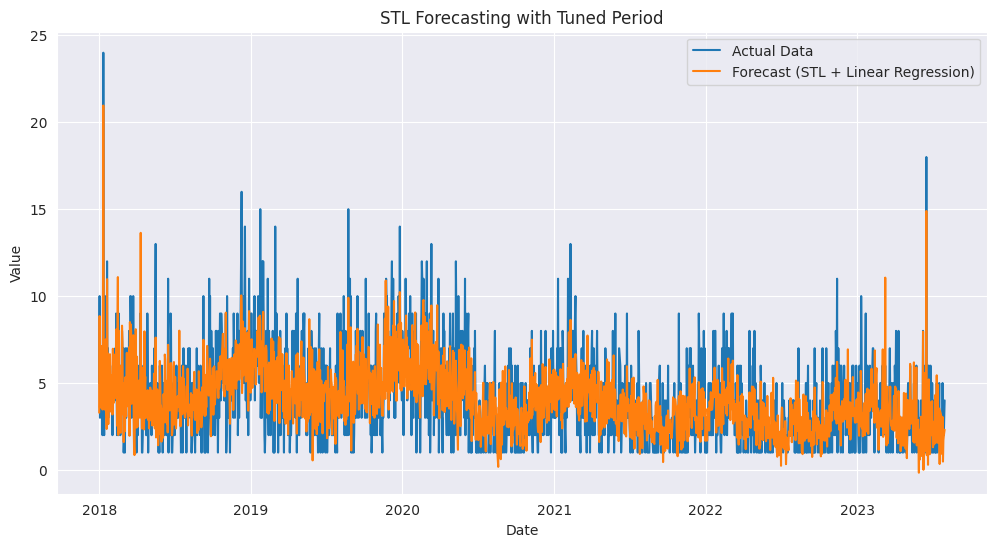

In [28]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import STL
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'v' with a column at index 3
training_dataX = v.sum(axis=1)
# Check for NaN values
print(training_dataX.isnull().sum())

# Impute NaN values with the mean or remove rows with NaN values
training_dataX = training_dataX.fillna(training_dataX.mean())
# Or: training_dataX = training_dataX.dropna()

# Create Training and Test
train_data_size = int(training_dataX.shape[0] * 0.7)
train = training_dataX.iloc[:train_data_size]
test = training_dataX.iloc[train_data_size:]

# STL decomposition
best_period = None
best_rmse = float('inf')

# Define a range of values to test
period_values = range(10, 100, 10)

for period in period_values:
    stl = STL(train, period=period)
    result = stl.fit()

    # Extract components
    trend_train = result.trend
    seasonal_train = result.seasonal
    residual_train = result.resid

    # Fit a linear regression model on the decomposed components
    X_train = pd.DataFrame({'trend': trend_train, 'seasonal': seasonal_train})
    y_train = residual_train  # Target is the residual component
    regression_model = LinearRegression()
    regression_model.fit(X_train, y_train)

    # Use the trained model to predict on the test data
    X_test = pd.DataFrame({'trend': result.trend[-len(test):], 'seasonal': result.seasonal[-len(test):]})
    residual_test = regression_model.predict(X_test)

    # Combine the decomposed components and predicted residuals to get the overall forecast
    stl_forecast = result.trend[-len(test):] + result.seasonal[-len(test):] + residual_test

    # Calculate evaluation metrics
    mae = mean_absolute_error(test, stl_forecast)
    mse = mean_squared_error(test, stl_forecast)
    rmse = sqrt(mse)
    smse = mse / np.var(test)

    # Check if the current period gives a lower RMSE
    if rmse < best_rmse:
        best_rmse = rmse
        best_period = period
        best_mae = mae
        best_smse = smse

# Print the best period and corresponding metrics
print("Best Period:", best_period)
print("Best RMSE:", best_rmse)
print("Best MAE:", best_mae)
print("Best SMSE:", best_smse)

# STL decomposition with the best period
final_stl = STL(training_dataX, period=best_period)
final_result = final_stl.fit()

# Extract components for the entire dataset
final_trend = final_result.trend
final_seasonal = final_result.seasonal
final_residual = final_result.resid

# Fit a linear regression model on the decomposed components for the entire dataset
X_final = pd.DataFrame({'trend': final_trend, 'seasonal': final_seasonal})
y_final = final_residual
final_regression_model = LinearRegression()
final_regression_model.fit(X_final, y_final)

# Use the trained model to predict on the entire dataset
X_all = pd.DataFrame({'trend': final_result.trend, 'seasonal': final_result.seasonal})
final_residual_all = final_regression_model.predict(X_all)

# Combine the decomposed components and predicted residuals to get the overall forecast for the entire dataset
final_stl_forecast = final_result.trend + final_result.seasonal + final_residual_all

# Plot the entire dataset with the forecast
plt.figure(figsize=(12, 6))
plt.plot(training_dataX.index, training_dataX.values, label='Actual Data')
plt.plot(final_stl_forecast.index, final_stl_forecast.values, label='Forecast (STL + Linear Regression)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('STL Forecasting with Tuned Period')
plt.legend()
plt.show()


0
Best Parameters: {'C': 0.1, 'epsilon': 0.2}


/tmp/ipykernel_348826/3459949643.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['y_pred'] = best_svr_model.predict(test[['ds']])


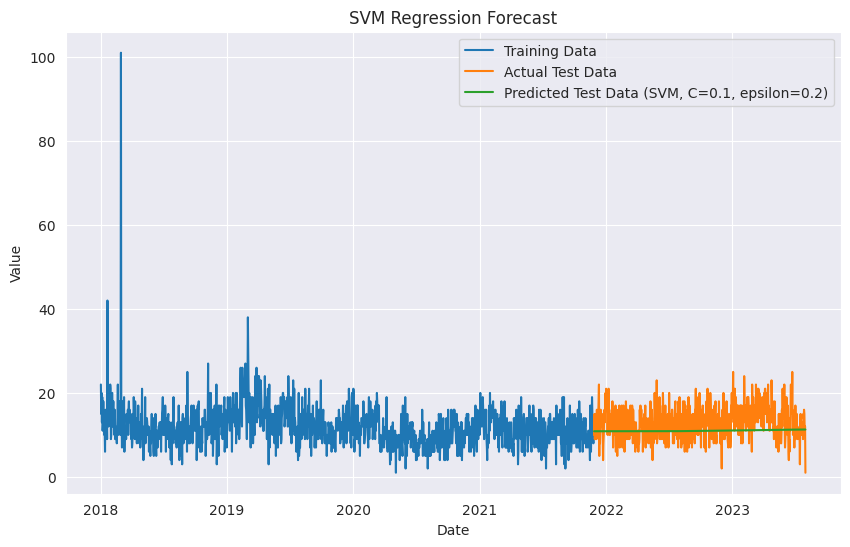

R-squared: -0.25191950125054796
Mean Absolute Error (MAE): 3.4144689049571446
Mean Squared Error (MSE): 18.81104111798305
Root Mean Squared Error (RMSE): 4.337169712840742


In [15]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'v' with a column at index 3
training_dataX = v.sum(axis=1)
# Check for NaN values
print(training_dataX.isnull().sum())

# Impute NaN values with the mean or remove rows with NaN values
training_dataX = training_dataX.fillna(training_dataX.mean())
training_dataX = training_dataX.dropna()

# Create Training and Test
train_data_size = int(training_dataX.shape[0] * 0.7)
train_df = pd.DataFrame({'ds': training_dataX.index, 'y': training_dataX.values})
train = train_df.iloc[:train_data_size]
test = train_df.iloc[train_data_size:]

# Define the parameter grid for grid search
param_grid = {
    'C': [0.1, 1],
    'epsilon': [0.1, 0.2]
}

# Fit SVM model with grid search
svr_model = SVR()
grid_search = GridSearchCV(svr_model, param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(train[['ds']], train['y'])

# Get the best parameters from grid search
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best model to predict on the test data
best_svr_model = grid_search.best_estimator_
test['y_pred'] = best_svr_model.predict(test[['ds']])

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(train['ds'], train['y'], label='Training Data')
plt.plot(test['ds'], test['y'], label='Actual Test Data')
plt.plot(test['ds'], test['y_pred'], label=f'Predicted Test Data (SVM, C={best_params["C"]}, epsilon={best_params["epsilon"]})')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('SVM Regression Forecast')
plt.legend()
plt.show()

# Calculate regression metrics
r2 = r2_score(test['y'], test['y_pred'])
mae = mean_absolute_error(test['y'], test['y_pred'])
mse = mean_squared_error(test['y'], test['y_pred'])
rmse = sqrt(mse)

# Print regression metrics
print("R-squared:", r2)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


0


/tmp/ipykernel_348826/3904696804.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['y_pred'] = train['y'].rolling(window=window_size, min_periods=1).mean()
/tmp/ipykernel_348826/3904696804.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['y_pred'] = test['y'].rolling(window=window_size, min_periods=1).mean()


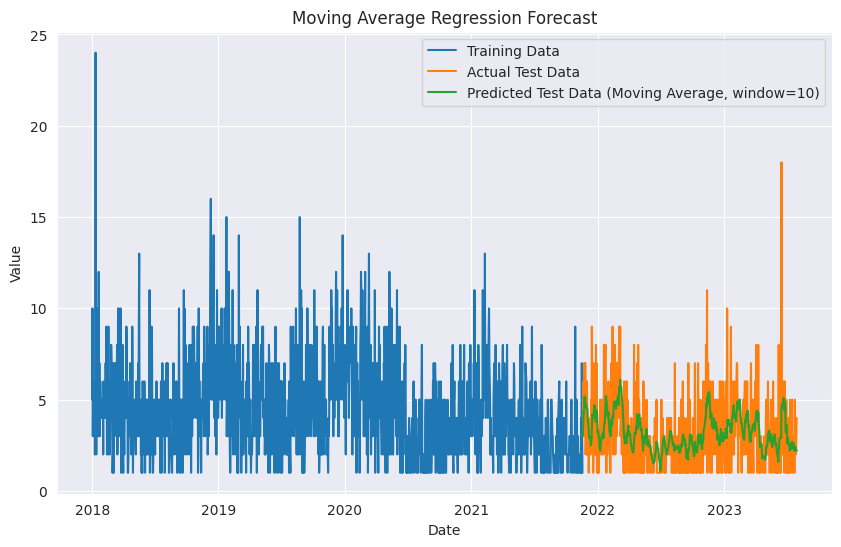

Mean Absolute Error (MAE): 1.4304629856516649
Mean Squared Error (MSE): 3.3945661112580474
Root Mean Squared Error (RMSE): 1.8424348322961241


In [19]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'v' with a column at index 3
training_dataX = v.sum(axis=1)
# Check for NaN values
print(training_dataX.isnull().sum())

# Impute NaN values with the mean or remove rows with NaN values
training_dataX = training_dataX.fillna(training_dataX.mean())
training_dataX = training_dataX.dropna()

# Create Training and Test
train_data_size = int(training_dataX.shape[0] * 0.7)
train_df = pd.DataFrame({'ds': training_dataX.index, 'y': training_dataX.values})
train = train_df.iloc[:train_data_size]
test = train_df.iloc[train_data_size:]

# Calculate Moving Average for Training Set
window_size = 10
train['y_pred'] = train['y'].rolling(window=window_size, min_periods=1).mean()

# Calculate Moving Average for Test Set
test['y_pred'] = test['y'].rolling(window=window_size, min_periods=1).mean()

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(train['ds'], train['y'], label='Training Data')
plt.plot(test['ds'], test['y'], label='Actual Test Data')
plt.plot(test['ds'], test['y_pred'], label=f'Predicted Test Data (Moving Average, window={window_size})')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Moving Average Regression Forecast')
plt.legend()
plt.show()

# Calculate regression metrics
mae = mean_absolute_error(test['y'], test['y_pred'])
mse = mean_squared_error(test['y'], test['y_pred'])
rmse = sqrt(mse)

# Print regression metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


In [86]:
print(train['y_pred'])

0       22.000000
1       18.500000
2       19.000000
3       17.500000
4       17.800000
          ...    
1420    11.222222
1421    11.555556
1422    12.111111
1423    11.111111
1424    11.222222
Name: y_pred, Length: 1425, dtype: float64


Importing plotly failed. Interactive plots will not work.


0


16:07:04 - cmdstanpy - INFO - Chain [1] start processing
16:07:04 - cmdstanpy - INFO - Chain [1] done processing


             ds      yhat
2032 2023-07-27  1.002587
2033 2023-07-28  1.070641
2034 2023-07-29  1.815502
2035 2023-07-30  1.437685
2036 2023-07-31  1.145038
R-squared: -0.15577203787314153
Mean Absolute Error (MAE): 1.3382387843181858
Mean Squared Error (MSE): 2.9718829676483005
Root Mean Squared Error (RMSE): 1.723915011724273


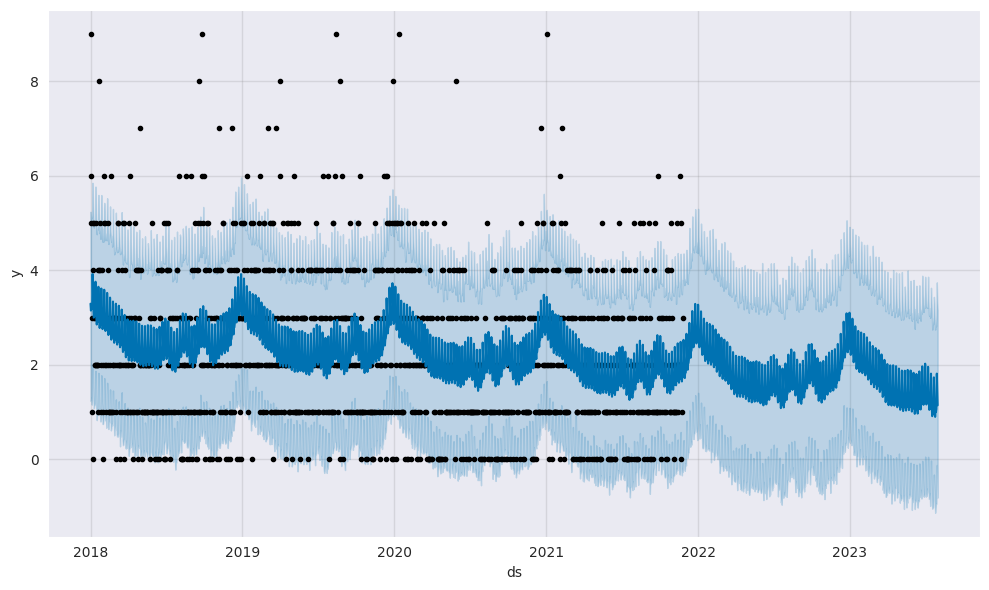

In [7]:
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

# Assuming you have a DataFrame 'v' with a column at index 3
training_dataX = v.iloc[:, 3]

# Check for NaN values
print(training_dataX.isnull().sum())

# Impute NaN values with the mean or remove rows with NaN values
training_dataX = training_dataX.fillna(training_dataX.mean())
# Or: training_dataX = training_dataX.dropna()

# Create Training and Test
train_data_size = int(training_dataX.shape[0] * 0.7)
train_df = pd.DataFrame({'ds': training_dataX.index, 'y': training_dataX.values})
train = train_df.iloc[:train_data_size]
test = train_df.iloc[train_data_size:]

# Fit Prophet model
model = Prophet()
model.fit(train)

# Create a DataFrame with future dates for prediction
future = model.make_future_dataframe(periods=len(test))
forecast = model.predict(future)

# Display the forecast DataFrame
print(forecast[['ds', 'yhat']].tail())

# Plot the forecast
fig = model.plot(forecast)

# Calculate regression metrics
r2 = r2_score(test['y'], forecast.iloc[-len(test):]['yhat'])
mae = mean_absolute_error(test['y'], forecast.iloc[-len(test):]['yhat'])
mse = mean_squared_error(test['y'], forecast.iloc[-len(test):]['yhat'])
rmse = sqrt(mse)

# Print regression metrics
print("R-squared:", r2)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

0


/tmp/ipykernel_348826/3332766824.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['ds_numeric'] = pd.to_numeric(train['ds'])
/tmp/ipykernel_348826/3332766824.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['ds_numeric'] = pd.to_numeric(test['ds'])


Best Parameters: {'activation': 'tanh', 'hidden_layer_sizes': (50, 50)}


/tmp/ipykernel_348826/3332766824.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['y_pred'] = best_mlp_model.predict(test[['ds_numeric']])


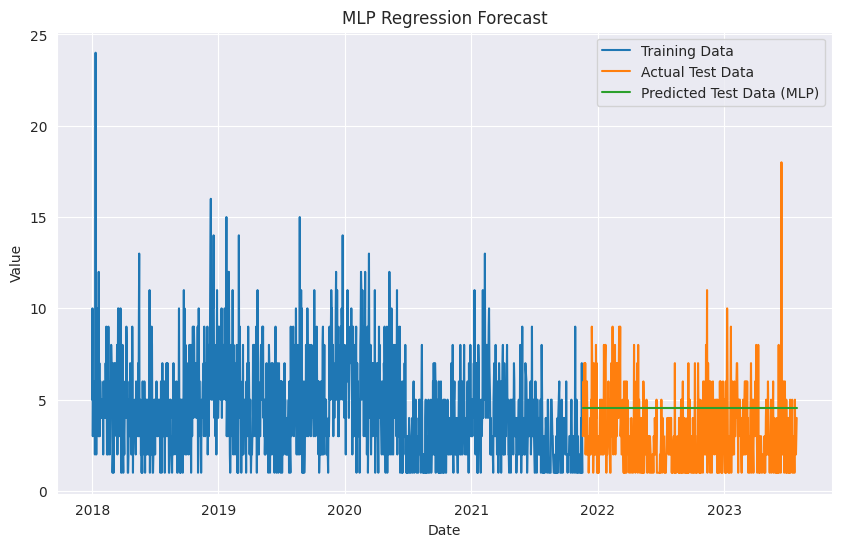

R-squared: -0.42996110075854466
Mean Absolute Error (MAE): 2.1030480489472034
Mean Squared Error (MSE): 5.954392538947047
Root Mean Squared Error (RMSE): 2.440162400117469


In [18]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'v' with a column at index 3
training_dataX = v.sum(axis=1)
# Check for NaN values
print(training_dataX.isnull().sum())

# Impute NaN values with the mean or remove rows with NaN values
training_dataX = training_dataX.fillna(training_dataX.mean())
training_dataX = training_dataX.dropna()

# Create Training and Test
train_data_size = int(training_dataX.shape[0] * 0.7)
train_df = pd.DataFrame({'ds': training_dataX.index, 'y': training_dataX.values})
train = train_df.iloc[:train_data_size]
test = train_df.iloc[train_data_size:]

# Convert 'ds' to numeric representation
train['ds_numeric'] = pd.to_numeric(train['ds'])
test['ds_numeric'] = pd.to_numeric(test['ds'])

# Define the parameter grid for grid search
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    #'alpha': [0.0001, 0.001, 0.01]
}

# Fit MLPRegressor model with grid search
mlp_model = MLPRegressor()
grid_search = GridSearchCV(mlp_model, param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(train[['ds_numeric']], train['y'])

# Get the best parameters from grid search
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best model to predict on the test data
best_mlp_model = grid_search.best_estimator_
test['y_pred'] = best_mlp_model.predict(test[['ds_numeric']])

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(train['ds'], train['y'], label='Training Data')
plt.plot(test['ds'], test['y'], label='Actual Test Data')
plt.plot(test['ds'], test['y_pred'], label=f'Predicted Test Data (MLP)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('MLP Regression Forecast')
plt.legend()
plt.show()

# Calculate regression metrics
r2 = r2_score(test['y'], test['y_pred'])
mae = mean_absolute_error(test['y'], test['y_pred'])
mse = mean_squared_error(test['y'], test['y_pred'])
rmse = sqrt(mse)

# Print regression metrics
print("R-squared:", r2)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


In [77]:

x = v.sum(axis=1)
x.loc[x > 40] = x.loc[x > 40] / 10

/home/dsciaux1/PycharmProjects/pythonProject/venv/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


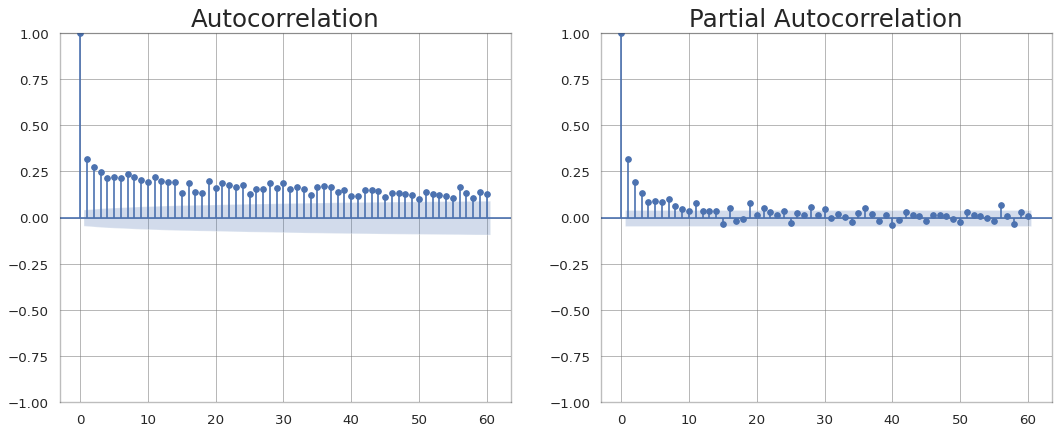

In [24]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()


sns.set_style(style='white')

# Import Data

# Draw Plot
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,6), dpi= 80)
plot_acf(x .tolist(), ax=ax1, lags=60)
plot_pacf(x .tolist(), ax=ax2, lags=60)

# https://towardsdatascience.com/time-series-from-scratch-autocorrelation-and-partial-autocorrelation-explained-1dd641e3076f
# lighten the borders
ax1.spines["top"].set_alpha(.3); ax2.spines["top"].set_alpha(.3)
ax1.spines["bottom"].set_alpha(.3); ax2.spines["bottom"].set_alpha(.3)
ax1.spines["right"].set_alpha(.3); ax2.spines["right"].set_alpha(.3)
ax1.spines["left"].set_alpha(.3); ax2.spines["left"].set_alpha(.3)
ax1.set_title('Autocorrelation', fontdict={'fontsize': 22})
ax2.set_title('Partial Autocorrelation', fontdict={'fontsize': 22})


ax1.grid(which="major", color="grey", linestyle="-", linewidth=0.5)
ax2.grid(which="major", color="grey", linestyle="-", linewidth=0.5)

# font size of tick labels
ax1.tick_params(axis='both', labelsize=12)
ax2.tick_params(axis='both', labelsize=12)
plt.show()

/home/dsciaux1/PycharmProjects/pythonProject/venv/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


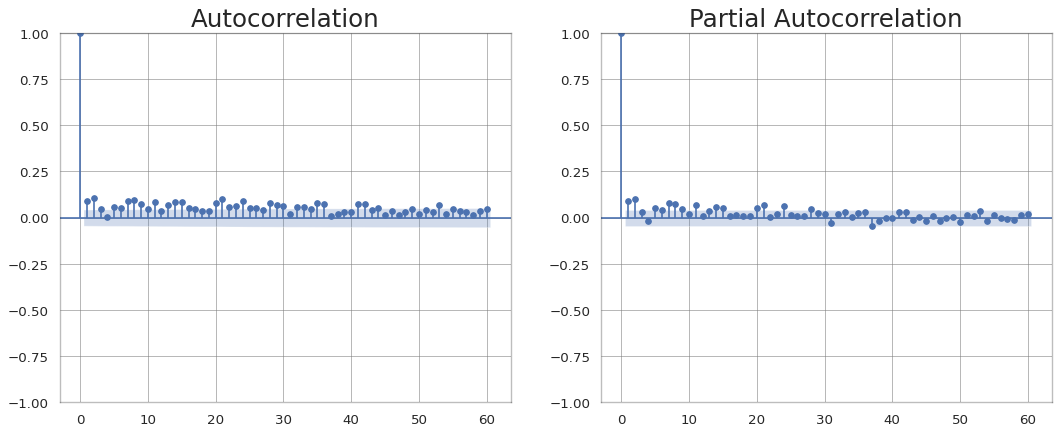

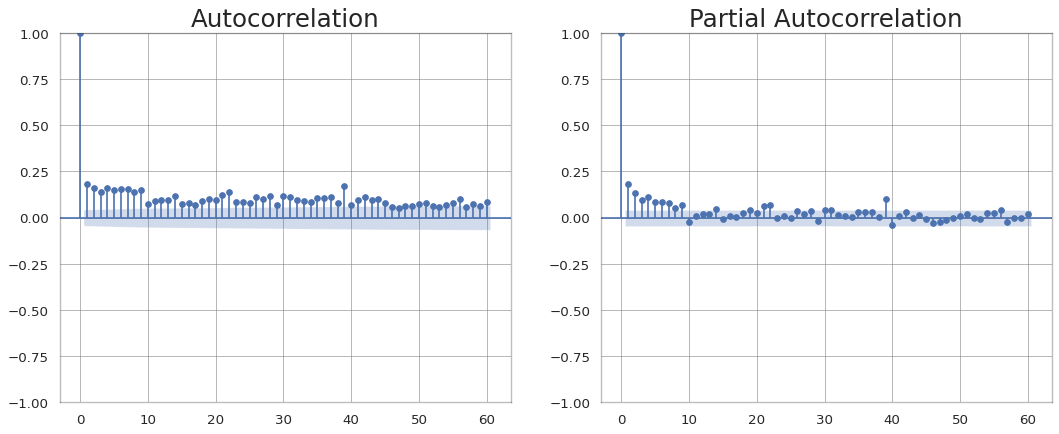

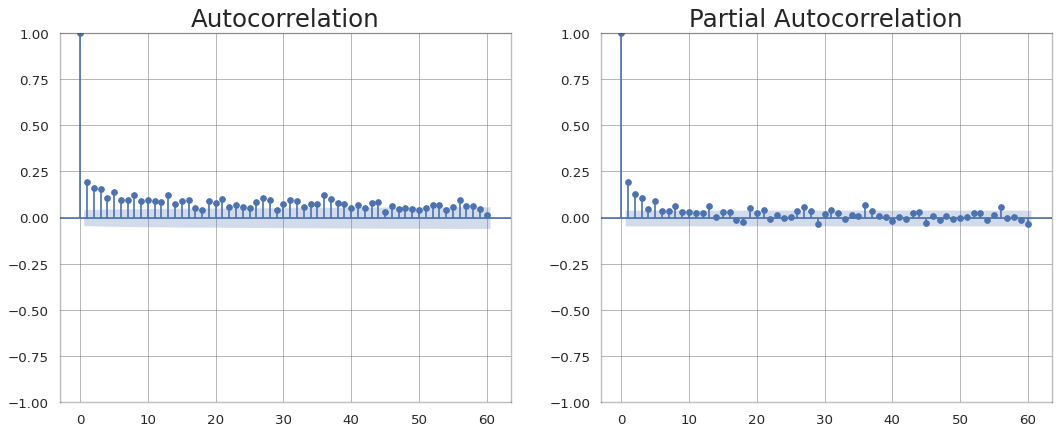

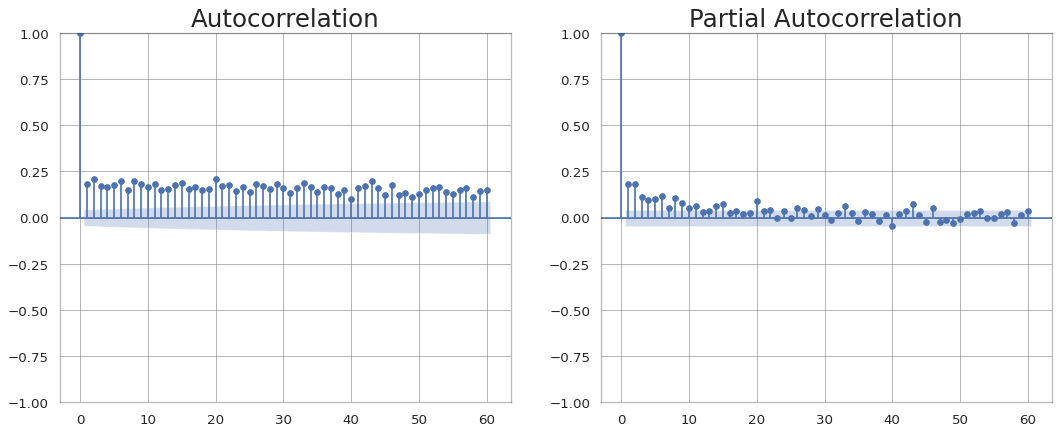

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
sns.set_style(style='white')

# Import Data

# Draw Plot
for i in range(0,v.columns.size):
  fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,6), dpi= 80)
  plot_acf(v[i] .tolist(), ax=ax1, lags=60)
  plot_pacf(v[i] .tolist(), ax=ax2, lags=60)

  # https://towardsdatascience.com/time-series-from-scratch-autocorrelation-and-partial-autocorrelation-explained-1dd641e3076f
  # lighten the borders
  ax1.spines["top"].set_alpha(.3); ax2.spines["top"].set_alpha(.3)
  ax1.spines["bottom"].set_alpha(.3); ax2.spines["bottom"].set_alpha(.3)
  ax1.spines["right"].set_alpha(.3); ax2.spines["right"].set_alpha(.3)
  ax1.spines["left"].set_alpha(.3); ax2.spines["left"].set_alpha(.3)
  ax1.set_title('Autocorrelation', fontdict={'fontsize': 22})
  ax2.set_title('Partial Autocorrelation', fontdict={'fontsize': 22})


  ax1.grid(which="major", color="grey", linestyle="-", linewidth=0.5)
  ax2.grid(which="major", color="grey", linestyle="-", linewidth=0.5)

  # font size of tick labels
  ax1.tick_params(axis='both', labelsize=12)
  ax2.tick_params(axis='both', labelsize=12)
  plt.show()

In [3]:
x=v.sum(axis=1)
x.loc[x > 40] = x.loc[x > 40] / 10



In [4]:
DadoInteiro = x 
dados30=DadoInteiro.loc[DadoInteiro.index<='2018-02-28']
dados6m=DadoInteiro.loc[DadoInteiro.index<='2018-06-30']
dados1ano=DadoInteiro.loc[DadoInteiro.index<='2023-06-1']
dados30

Date
2018-01-01    22.0
2018-01-02    15.0
2018-01-03    20.0
2018-01-04    13.0
2018-01-05    19.0
2018-01-06    11.0
2018-01-07    13.0
2018-01-08    18.0
2018-01-09    14.0
2018-01-10    13.0
2018-01-11    10.0
2018-01-12    11.0
2018-01-13     6.0
2018-01-14    15.0
2018-01-15    16.0
2018-01-16    13.0
2018-01-17    11.0
2018-01-18    15.0
2018-01-19     9.0
2018-01-20     4.2
2018-01-21    16.0
2018-01-22    16.0
2018-01-23    12.0
2018-01-24    13.0
2018-01-25    18.0
2018-01-26    13.0
2018-01-27    19.0
2018-01-28    22.0
2018-01-29    21.0
2018-01-30     9.0
2018-01-31    10.0
2018-02-01    14.0
2018-02-02    20.0
2018-02-03    20.0
2018-02-04    12.0
2018-02-05    15.0
2018-02-06    18.0
2018-02-07    12.0
2018-02-08    15.0
2018-02-09    10.0
2018-02-10    16.0
2018-02-11     9.0
2018-02-12     9.0
2018-02-13    12.0
2018-02-14     9.0
2018-02-15    11.0
2018-02-16     8.0
2018-02-17    11.0
2018-02-18    14.0
2018-02-19    22.0
2018-02-20    10.0
2018-02-21    12.0
2018-02

In [5]:
import seaborn as sns
sns.set_style("whitegrid")
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

#extracting dayli seasonality from time series adjusted by daily seasonality
sd_3m = sm.tsa.seasonal_decompose(dados30, period=7)

#extracting weekly seasonality from time series adjusted by daily seasonality
sd_6m = sm.tsa.seasonal_decompose(dados6m, period=7)



#extracting yearly seasonality from time series adjusted by daily and weekly seasonality
sd_2a = sm.tsa.seasonal_decompose(dados1ano, period=365)

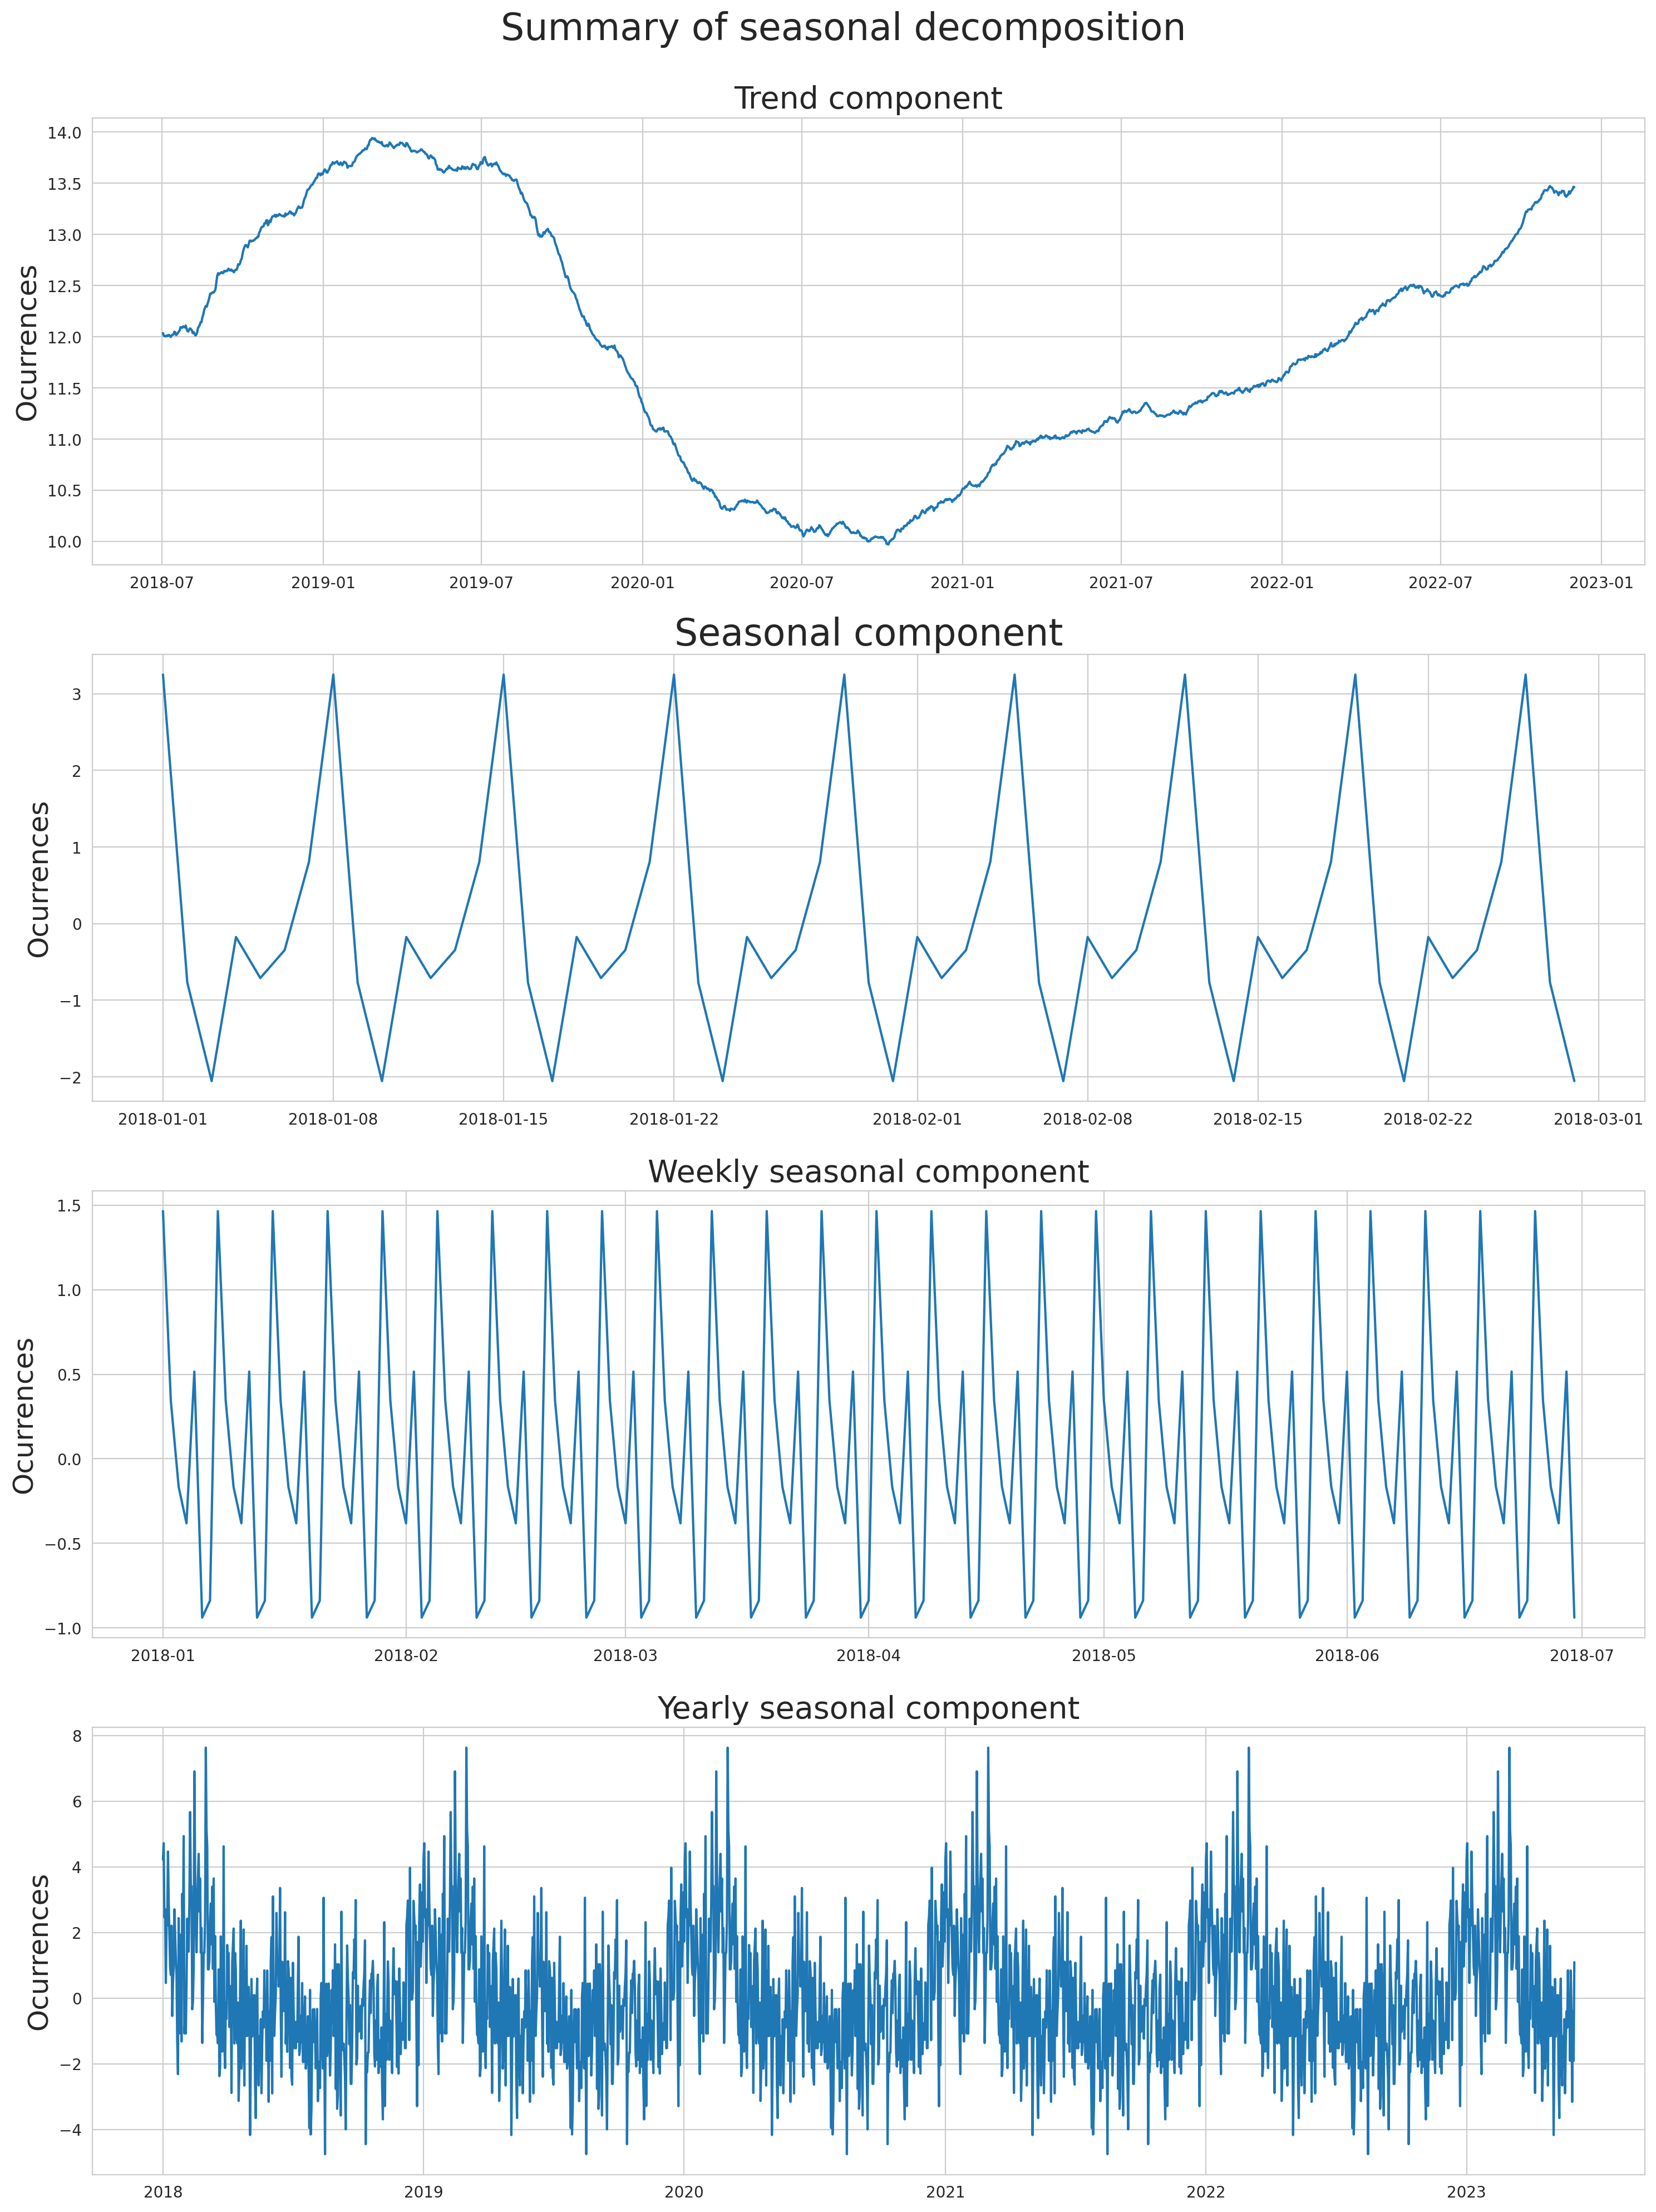

In [7]:
import datetime
import matplotlib.pyplot as plt


#drawing figure with subplots, predefined size and resolution
f, axes = plt.subplots(4,1,figsize=(18,24),dpi=200);


#setting figure title and adjusting title position and size
plt.suptitle('Summary of seasonal decomposition', y=0.92, fontsize=24);

#plotting trend component
axes[0].plot(sd_2a.trend)
axes[0].set_title('Trend component', fontdict={'fontsize': 20});

# #drawing black dashed vertical lines between y axis limits
# axes[0].vlines(datetime.datetime(2021,7,1), axes[0].get_ylim()[0], axes[0].get_ylim()[1], colors='black', linestyles='dashed');
# axes[0].vlines(datetime.datetime(2019,7,15), axes[0].get_ylim()[0], axes[0].get_ylim()[1], colors='black', linestyles='dashed');

# #placing three comments in text boxes
# axes[0].text(datetime.datetime(2021,7,1), 13, 'Increasing trend',
#              ha='center', va='center', bbox=dict(fc='white', ec='b', boxstyle='round'), fontsize=18);
# axes[0].text(datetime.datetime(2020,8,1), 13, 'COVID-19',
#              ha='center', va='center', bbox=dict(fc='white', ec='b', boxstyle='round'), fontsize=18);
# axes[0].text(datetime.datetime(2019,7,15), 13, 'Decreasing trend',
#              ha='center', va='center', bbox=dict(fc='white', ec='b', boxstyle='round'), fontsize=18);

#plotting daily seasonal component
axes[1].plot(sd_3m.seasonal);
axes[1].set_title('Seasonal component', fontdict={'fontsize': 24});
# axes[1].annotate('Weekdays', xy=(0.22, 0.35),
#             xycoords='axes fraction',
#             va='center', ha='center',
#             xytext=(0.22, 0.9),
#             textcoords='axes fraction',
#             bbox=dict(boxstyle='round', fc='w', ec='b'),
#             arrowprops=dict(color='black',
#                             arrowstyle='-[',
#                             mutation_scale=22,
#                             connectionstyle='arc3'),
#                  fontsize=18);
# axes[1].annotate('Weekends', xy=(0.37, 0.55),
#             xycoords='axes fraction',
#             va='center', ha='center',
#             xytext=(0.37, 0.90),
#             textcoords='axes fraction',
#             bbox=dict(boxstyle='round', fc='w', ec='b'),
#             arrowprops=dict(color='black',
#                             arrowstyle='-[',
#                             mutation_scale=19,
#                             connectionstyle='arc3'),
#                  fontsize=18);

                            
          

#plotting weekly seasonal component
axes[2].plot(sd_6m.seasonal);
axes[2].set_title('Weekly seasonal component', fontdict={'fontsize': 20});

# #placing comment in annotation with text box and arrow
# axes[2].annotate('Same pattern previous chart with more months', xy=(0.50, 0.75),
#             xycoords='axes fraction',
#             va='center', ha='center',
#             xytext=(0.50, 0.25),
#             textcoords='axes fraction',
#             bbox=dict(boxstyle='round', fc='w', ec='b'),
#             arrowprops=dict(color='black',
#                             arrowstyle='-[',
#                             mutation_scale=90,
#                             connectionstyle='arc3'),
#                  fontsize=18);

#plotting yearly seasonality
axes[3].plot(sd_2a.seasonal);
axes[3].set_title('Yearly seasonal component', fontdict={'fontsize': 20});

#placing comments in annotations with text boxes and arrows
# axes[3].annotate('Summer', xy=(0.34, 0.30),
#             xycoords='axes fraction',
#             va='center', ha='center',
#             xytext=(0.06, 0.05),
#             textcoords='axes fraction',
#             bbox=dict(boxstyle='round', fc='w', ec='b'),
#                  fontsize=18);
# axes[3].annotate('Autumn', xy=(0.54, 0.50),
#             xycoords='axes fraction',
#             va='center', ha='center',
#             xytext=(0.58, 0.74),
#             textcoords='axes fraction',
#             bbox=dict(boxstyle='round', fc='#f5f88f', ec='b'));
# axes[3].annotate('Winter', xy=(0.54, 0.50),
#             xycoords='axes fraction',
#             va='center', ha='center',
#             xytext=(0.50, 0.05),
#             textcoords='axes fraction',
#             bbox=dict(boxstyle='round', fc='w', ec='b'),
#                  fontsize=18);
# axes[3].annotate('Spring', xy=(0.54, 0.50),
#             xycoords='axes fraction',
#             va='center', ha='center',
#             xytext=(0.83, 0.74),
#             textcoords='axes fraction',
#             bbox=dict(boxstyle='round', fc='#f5f88f', ec='b'));

#plotting residual of decomposition
# axes[4].plot(sd_2a.resid);
# axes[4].set_title('Residual component', fontdict={'fontsize': 20});

#setting label for each y axis
for a in axes:
    a.set_ylabel('Ocurrences', fontsize=18);
    
plt.show();

In [13]:
from datetime import date
import os

output_directory = "Data/datasets"
os.makedirs(output_directory, exist_ok=True)
current_date = date.today().strftime("%Y-%m-%d")
output_filename = f"dataset_pre_processed_{current_date}.csv"
output_path = os.path.join(output_directory, output_filename)
v.to_csv(output_path, index=False)

print(f"Dataset saved to: {output_path}")


Dataset saved to: Data/datasets/dataset_pre_processed_2023-08-21.csv


In [11]:
v

cluster_label  0  1  2  3
Date                     
2018-01-01     9  3  9  1
2018-01-02     3  4  5  3
2018-01-03     6  7  6  1
2018-01-04     4  6  1  2
2018-01-05     5  9  3  2
...           .. .. .. ..
2023-07-27     5  5  3  3
2023-07-28     4  8  2  1
2023-07-29     6  4  0  1
2023-07-30     3  4  3  2
2023-07-31     1  0  0  0

[2037 rows x 4 columns]

In [32]:
v

Date
2018-01-01    22
2018-01-02    15
2018-01-03    20
2018-01-04    13
2018-01-05    19
              ..
2023-07-27    16
2023-07-28    15
2023-07-29    11
2023-07-30    12
2023-07-31     1
Length: 2037, dtype: int64

In [40]:
v.name = 'ValueColumn'
v

Date
2018-01-01    22
2018-01-02    15
2018-01-03    20
2018-01-04    13
2018-01-05    19
              ..
2023-07-27    16
2023-07-28    15
2023-07-29    11
2023-07-30    12
2023-07-31     1
Name: ValueColumn, Length: 2037, dtype: int64

In [5]:
x=v.sum(axis=1)

In [6]:
x.loc[x > 40] = x.loc[x > 40] / 10
x


Date
2018-01-01    39.0
2018-01-02    34.0
2018-01-03    25.0
2018-01-04    25.0
2018-01-05    31.0
              ... 
2023-07-27    24.0
2023-07-28    25.0
2023-07-29    19.0
2023-07-30    26.0
2023-07-31     1.0
Length: 2037, dtype: float64

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


(<Figure size 1250x1020 with 7 Axes>,
 array([<Axes: ylabel='2018'>, <Axes: ylabel='2019'>,
        <Axes: ylabel='2020'>, <Axes: ylabel='2021'>,
        <Axes: ylabel='2022'>, <Axes: ylabel='2023'>], dtype=object))

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


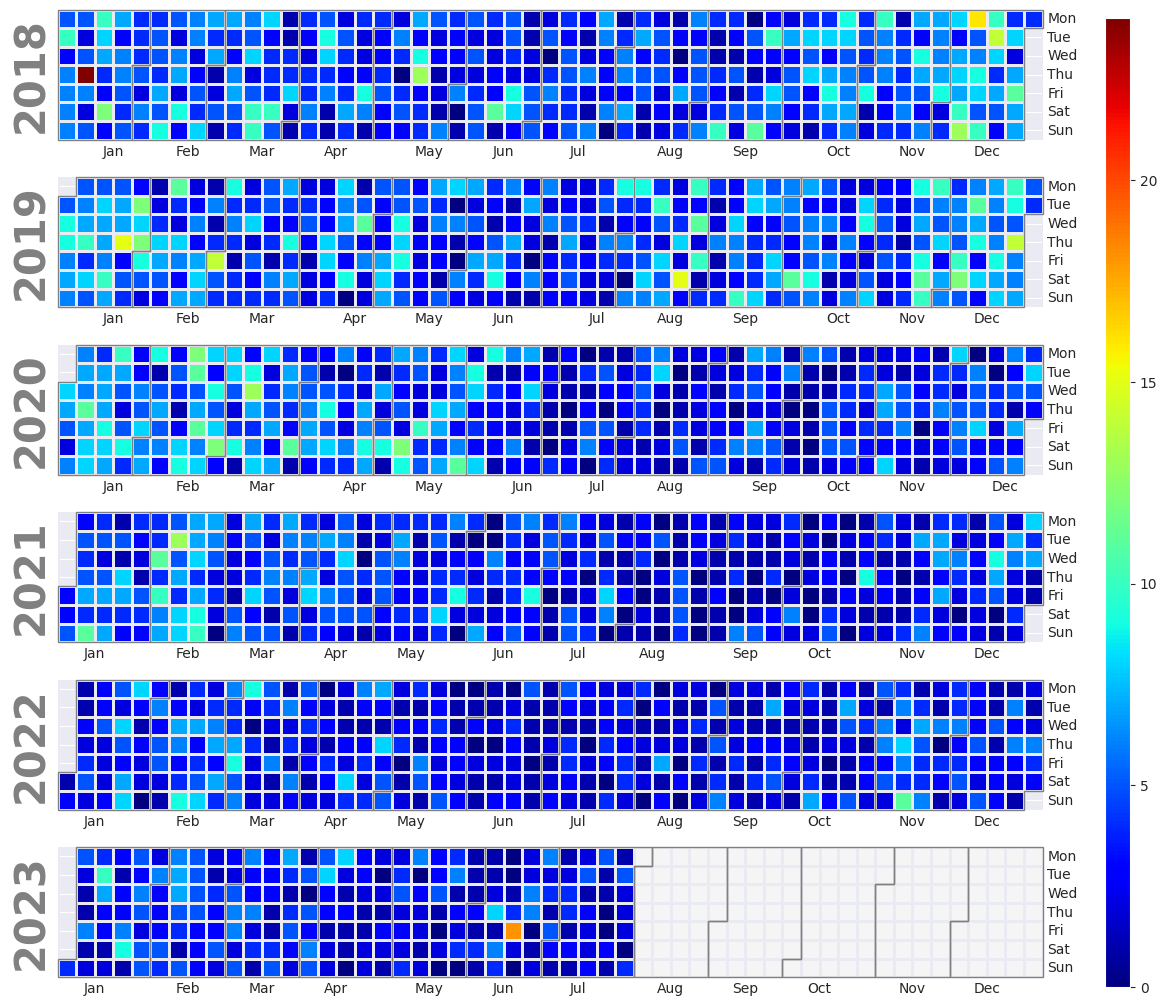

In [5]:
import calplot

calplot.calplot(v.sum(axis=1), cmap='jet', colorbar=True)
    

In [ ]:
import matplotlib.pyplot as plt
import calmap

# Sample data (replace with your data)

# Plot
plt.figure(figsize=(30, 30), dpi=0)
ax = calmap.calendarplot(
    x
,
    cmap='jet',
    fig_kws={'figsize': (30, 30)},
    yearlabel_kws={'color': 'black', 'fontsize': 20},
    subplot_kws={'title': 'Number of occurrences'}
)

plt.show()

In [6]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt


training_set = v

training_set = training_set.iloc[:,:].values

print(training_set.shape)

#plt.plot(training_set, label = 'Shampoo Sales Data')
#plt.plot(training_set)
#plt.show()


# fig, axs = plt.subplots(4,1, figsize=(25,30))
# fig.tight_layout(pad = 5)
# for i in range(0,v.columns.size):
#     axs[(i)].plot(v[v.columns[i]])
#     axs[(i)].set_title(v.columns[i])

(1943, 4)


In [20]:
v.sum(axis=0)

cluster_label
0     2948
1     5958
2    11318
3     4582
dtype: int64

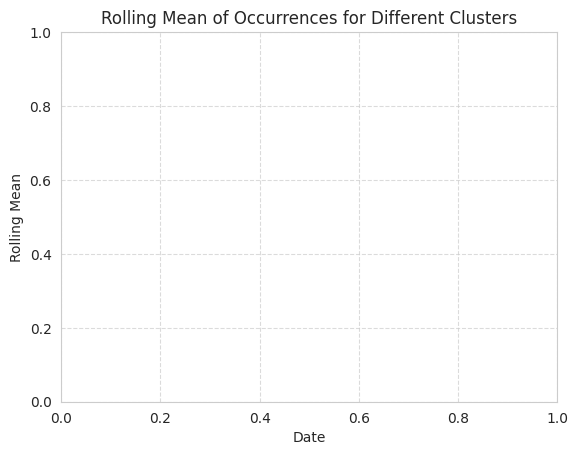

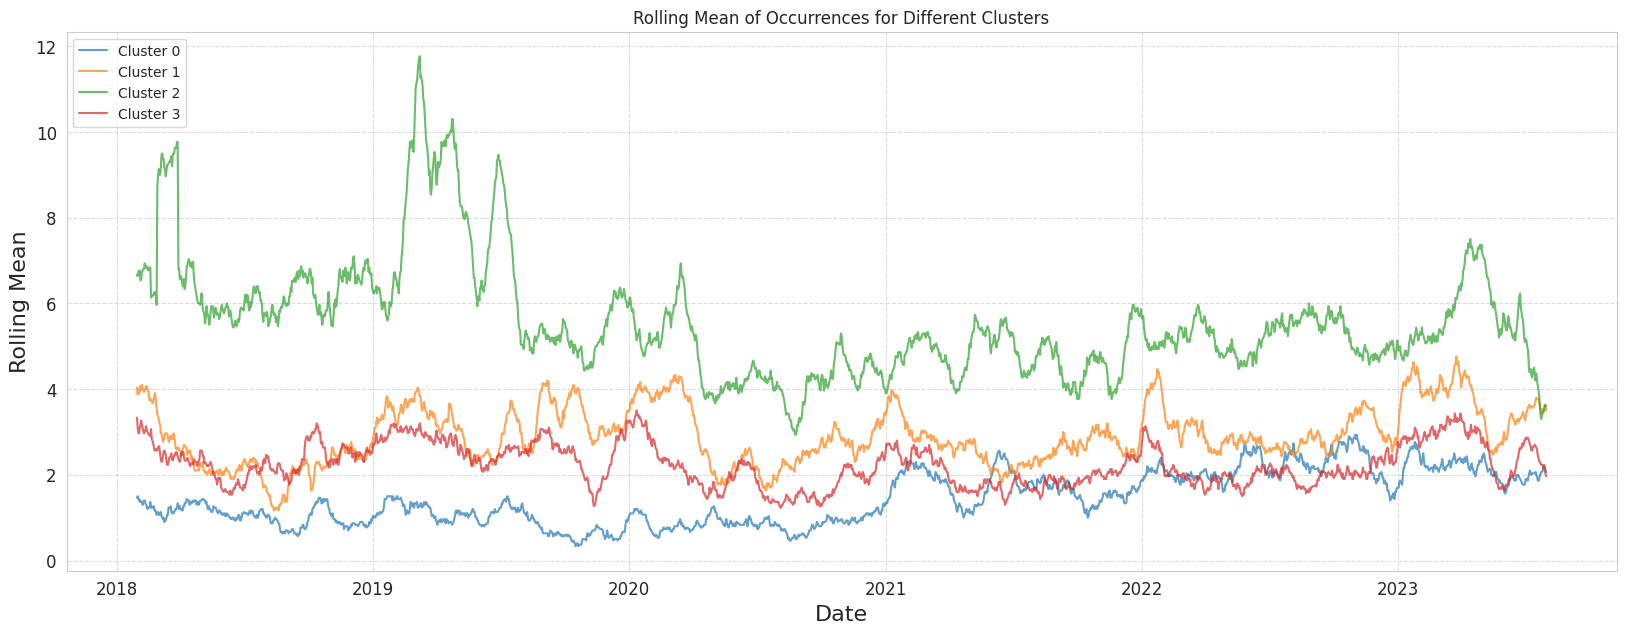

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style(style='whitegrid')  # Use seaborn with a white grid

# Assuming 'v' is a DataFrame with datetime in the first column and cluster data in the rest
rolling_mean = v.iloc[:, 0:].rolling(window=30).mean()

plt.grid(True, linestyle='--', alpha=0.7)

plt.title('Rolling Mean of Occurrences for Different Clusters')
plt.xlabel('Date')
plt.ylabel('Rolling Mean')
plt.show()
# Plot the rolling mean using a line plot for each cluster
plt.figure(figsize=(20, 7), facecolor='white')

for column in rolling_mean.columns:
    plt.plot(rolling_mean.index, rolling_mean[column], label=f'Cluster {column}', alpha=0.7)

plt.legend(loc='upper left')

# Set custom legend labels
legend_labels = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']
plt.legend(labels=legend_labels, loc='upper left')

plt.grid(True, linestyle='--', alpha=0.7)

plt.title('Rolling Mean of Occurrences for Different Clusters')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Rolling Mean', fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


In [11]:
from statsmodels.tsa.stattools import adfuller
for i in range(0,v.columns.size):
	result = adfuller(v[v.columns[i]])


	#anotar
	print('ADF Statistic: %f' % result[0])
	print('p-value: %f' % result[1])
	for key, value in result[4].items():
	  print('\t%s: %.3f' % (key, value))

ADF Statistic: -8.266412
p-value: 0.000000
	1%: -3.434
	5%: -2.863
	10%: -2.568
ADF Statistic: -5.535636
p-value: 0.000002
	1%: -3.434
	5%: -2.863
	10%: -2.568
ADF Statistic: -3.507869
p-value: 0.007787
	1%: -3.434
	5%: -2.863
	10%: -2.568
ADF Statistic: -5.666023
p-value: 0.000001
	1%: -3.434
	5%: -2.863
	10%: -2.568


In [4]:
import numpy as np


def sliding_windows(data, seq_length):
    x = []
    y = []

    for i in range(len(data)-seq_length-1):
        _x = data[i:(i+seq_length)]
        _y = data[i+seq_length]
        x.append(_x)
        y.append(_y)

    return np.array(x),np.array(y)

sc = MinMaxScaler()
training_data = sc.fit_transform(training_set)

seq_length = 6
x, y = sliding_windows(training_data, seq_length)

train_size = int(len(y) * 0.70)#treino e teste -> olhar talvez  70,
val_size = int(len(y) *0.90) #intervalo entre no codigo 70 e 90
test_size = int(len(y)*0.10) #restante, pelo codigo esse valor não é utilizado
#test_size = len(y) - train_size

#valição

dataX = Variable(torch.Tensor(np.array(x)))
#print(dataX.shape)
dataY = Variable(torch.Tensor(np.array(y)))

trainX = Variable(torch.Tensor(np.array(x[0:train_size])))
trainY = Variable(torch.Tensor(np.array(y[0:train_size])))

valX = Variable(torch.Tensor(np.array(x[train_size:val_size])))
valY = Variable(torch.Tensor(np.array(y[train_size:val_size])))

testX = Variable(torch.Tensor(np.array(x[val_size:len(x)])))
testY = Variable(torch.Tensor(np.array(y[val_size:len(y)])))
print(trainX.shape)
print(trainY.shape)
print(valX.shape)
print(valY.shape)




torch.Size([1421, 6, 4])
torch.Size([1421, 4])
torch.Size([406, 6, 4])
torch.Size([406, 4])


Predição normal a frente

In [ ]:
import optuna
import optuna
import matplotlib.pyplot as plt
from torch.utils.tensorboard import SummaryWriter


class LSTM(nn.Module):

    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super(LSTM, self).__init__()

        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length

        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,num_layers=num_layers, batch_first=True) #lstm
        self.fc_1 =  nn.Linear(hidden_size, 128) #fully connected 1
        self.fc = nn.Linear(128, num_classes) #fully connected last layer

        self.relu = nn.ReLU()

    def forward(self, x):
        h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size))

        c_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size))

        output, (hn, cn) = self.lstm(x, (h_0, c_0)) #lstm with input, hidden, and internal state
        hn = hn.view(-1, self.hidden_size) #reshaping the data for Dense layer next
        out = self.relu(hn)
        out = self.fc_1(out) #first Dense
        out = self.relu(out) #relu
        out = self.fc(out) #Final Output
        return out

def objective(trial):
    input_size = 4
    hidden_size = trial.suggest_int("hidden_size", 1, 10)
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1e-1)
  
    num_epochs = 500   
    num_layers=1
    num_classes = 4
    
    # Create a unique directory name for this trial based on the trial number
    trial_dir = f"trial_{trial.number}"
    writer = SummaryWriter(log_dir=trial_dir)

    
    lstm = LSTM(num_classes, input_size, hidden_size, num_layers)
    print('passei aqui 1')
    criterion = torch.nn.L1Loss()    # mean-squared error for regression
    optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)
    
    #writer = SummaryWriter()
    #optimizer = torch.optim.SGD(lstm.parameters(), lr=learning_rate)
    
    # Train the model
    iter_no=0

    for epoch in range(num_epochs):
        outputs = lstm(trainX)
        
        #limpa os grandientes
        optimizer.zero_grad()
        
        # obtain the loss function
        loss = criterion(outputs, trainY)
        loss.backward()
        
        optimizer.step()
        
        iter_no += 1
        
        # X(t+1) = LSTM.predict(X0_t)
        # X(1, t+1) = X(1,t) | X(t+1)
        # X(t+2) = LSTM.predict(X(1, t+1) )
        
        #validation
        outputs_val = lstm(valX)
        loss_val = criterion(outputs_val, valY)
        
        
        writer.add_scalar("Training Loss", loss.item(), epoch)
        writer.add_scalar("Validation Loss", loss_val.item(), epoch)
        
    
        
        if epoch % 100 == 0:
            print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))
            print("Epoch: %d, val_loss: %1.5f" % (epoch, loss_val.item()))
            #plt.plot(epoch,running_loss)
            #writer.flush()
            print(loss)
    writer.add_hparams(hparam_dict={"hidden_size": hidden_size,"learning_rate": learning_rate,},metric_dict={"Final Validation Loss":loss.item(),},)

    writer.close()

    return loss

if __name__ == "__main__":
    study = optuna.create_study(direction="minimize")
    study.optimize(objective, n_trials=10)

    print("Number of finished trials: ", len(study.trials))
    print("Best trial:")
    trial = study.best_trial

    print("Value: ", trial.value)
    print("Params: ")
    for key, value in trial.params.items():
        print(f"    {key}: {value}")

    best_hidden_size = trial.params["hidden_size"]
    best_learning_rate = trial.params["learning_rate"]

    print("Best Hyperparameters:")
    print(f"Hidden Size: {best_hidden_size}")
    print(f"Learning Rate: {best_learning_rate}")

    # Extract the loss values and hyperparameters
    loss_values = [trial.value for trial in study.trials]
    hidden_sizes = [trial.params["hidden_size"] for trial in study.trials]
    learning_rates = [trial.params["learning_rate"] for trial in study.trials]

    # Create a DataFrame for easier plotting with Seaborn
    import pandas as pd
    df = pd.DataFrame({'Loss': loss_values, 'Hidden Size': hidden_sizes, 'Learning Rate': learning_rates})

    # Plot the loss values
    plt.figure(figsize=(12, 6))
    sns.set(style="whitegrid")
    ax = sns.scatterplot(data=df, x='Loss', y='Hidden Size', palette="deep", s=100)
    plt.title("Loss vs. Hidden Size (Trials)")
    plt.xlabel("Loss")
    plt.ylabel("Hidden Size")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
#     1a análise - qual deve ser o tamanho da Lookback Window (LBW)?
#   - rodar vários tamanhos (de 1 a 10) usando optuna para hidden layer size (somente uma cada oculta)
# 
# 
# 2a análise - é benéfico adicioanr uma segunda camada oculta?
#   - usa. o melhor LBW da 1a analise e treina com duas camadas usando optuna para hidden layer size
# 
# 3a análise - qual a melhor estratégia para prever mais do que um passo à frente?
#   - treinar ou testar a melhor rede usando as duas estratégias


teste com optuna gerando os grficos de treino loss dia 23/10

In [ ]:
import optuna
import optuna
import matplotlib.pyplot as plt
from torch.utils.tensorboard import SummaryWriter


class LSTM(nn.Module):

    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super(LSTM, self).__init__()

        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length

        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,num_layers=num_layers, batch_first=True) #lstm
        self.fc_1 =  nn.Linear(hidden_size, 128) #fully connected 1
        self.fc = nn.Linear(128, num_classes) #fully connected last layer

        self.relu = nn.ReLU()

    def forward(self, x):
        h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size))

        c_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size))

        output, (hn, cn) = self.lstm(x, (h_0, c_0)) #lstm with input, hidden, and internal state
        hn = hn.view(-1, self.hidden_size) #reshaping the data for Dense layer next
        out = self.relu(hn)
        out = self.fc_1(out) #first Dense
        out = self.relu(out) #relu
        out = self.fc(out) #Final Output
        return out

def objective(trial):
    # Define your objective function as before
    input_size = 4
    hidden_size = trial.suggest_int("hidden_size", 1, 10)
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1e-1)
    num_epochs = 500
    num_layers = 1
    num_classes = 4

    # Create a unique directory name for this trial based on the trial number
    trial_dir = f"trial_{trial.number}"
    trial_writer = SummaryWriter(log_dir=trial_dir)

    lstm = LSTM(num_classes, input_size, hidden_size, num_layers)
    criterion = torch.nn.L1Loss()
    optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)

    training_losses = []  # Store training losses per epoch
    validation_losses = []  # Store validation losses per epoch

    for epoch in range(num_epochs):
        outputs = lstm(trainX)
        optimizer.zero_grad()
        loss = criterion(outputs, trainY)
        loss.backward()
        optimizer.step()

        # Validation
        outputs_val = lstm(valX)
        loss_val = criterion(outputs_val, valY)

        # Log the training loss, validation loss, and hyperparameters
        trial_writer.add_scalar("Training Loss", loss.item(), epoch)
        trial_writer.add_scalar("Validation Loss", loss_val.item(), epoch)

        # Store losses for plotting
        training_losses.append(loss.item())
        validation_losses.append(loss_val.item())

        if epoch % 100 == 0:
            print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))
            print("Epoch: %d, val_loss: %1.5f" % (epoch, loss_val.item()))

    # Log the best validation loss and hyperparameters for this trial
    trial_writer.add_hparams(
        hparam_dict={
            "hidden_size": hidden_size,
            "learning_rate": learning_rate,
        },
        metric_dict={
            "Final Validation Loss": loss_val.item(),
        },
    )
    trial_writer.close()

    # Plot the training and validation loss per epoch
    plt.figure(figsize=(12, 6))
    sns.set(style="whitegrid")
    epochs = range(num_epochs)
    plt.plot(epochs, training_losses, label="Training Loss")
    plt.plot(epochs, validation_losses, label="Validation Loss")
    plt.title("Loss vs. Epoch (Trial {})".format(trial.number))
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.tight_layout()
    plt.show()

    return loss

if __name__ == "__main__":
    study = optuna.create_study(direction="minimize")

    study.optimize(objective, n_trials=10)

    print("Number of finished trials: ", len(study.trials))

    # Use study.best_trial to get the best trial
    best_trial = study.best_trial
    print("Best trial number:", best_trial.number)
    print("Best trial value:", best_trial.value)
    print("Best trial hyperparameters:", best_trial.params)
    print("Best trial hyperparameters:")
    print("Hidden Size:", best_trial.params["hidden_size"])
    print("Learning Rate:", best_trial.params["learning_rate"])

Teste com 2 ou mais camadas escondidas

In [ ]:
import numpy as np


def sliding_windows(data, seq_length):
    x = []
    y = []

    for i in range(len(data)-seq_length-1):
        _x = data[i:(i+seq_length)]
        _y = data[i+seq_length]
        x.append(_x)
        y.append(_y)

    return np.array(x),np.array(y)

sc = MinMaxScaler()
training_data = sc.fit_transform(training_set)

seq_length = 6
x, y = sliding_windows(training_data, seq_length)

train_size = int(len(y) * 0.70)#treino e teste -> olhar talvez  70,
val_size = int(len(y) *0.90) #intervalo entre no codigo 70 e 90
test_size = int(len(y)*0.10) #restante, pelo codigo esse valor não é utilizado
#test_size = len(y) - train_size

#valição

dataX = Variable(torch.Tensor(np.array(x)))
#print(dataX.shape)
dataY = Variable(torch.Tensor(np.array(y)))

trainX = Variable(torch.Tensor(np.array(x[0:train_size])))
trainY = Variable(torch.Tensor(np.array(y[0:train_size])))

valX = Variable(torch.Tensor(np.array(x[train_size:val_size])))
valY = Variable(torch.Tensor(np.array(y[train_size:val_size])))

testX = Variable(torch.Tensor(np.array(x[val_size:len(x)])))
testY = Variable(torch.Tensor(np.array(y[val_size:len(y)])))
print(trainX.shape)
print(trainY.shape)
print(valX.shape)
print(valY.shape)

import optuna
import optuna
import matplotlib.pyplot as plt
from torch.utils.tensorboard import SummaryWriter


class LSTM(nn.Module):

    def __init__(self, num_classes, input_size, hidden_size, num_layers, num_hidden_layers):
        super(LSTM, self).__init__()

        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length
        self.num_hidden_layers = num_hidden_layers  # Number of hidden layers


        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,num_layers=num_layers, batch_first=True) #lstm
        # Define additional hidden layers
        self.hidden_layers = nn.ModuleList([nn.Linear(hidden_size, hidden_size) for _ in range(num_hidden_layers)])

        
        self.fc_1 =  nn.Linear(hidden_size, 128) #fully connected 1
        self.fc = nn.Linear(128, num_classes) #fully connected last layer

        self.relu = nn.ReLU()

    def forward(self, x):
        h_0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c_0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        out, _ = self.lstm(x, (h_0, c_0))

        # Pass through the hidden layers
        for hidden_layer in self.hidden_layers:
            out = self.relu(hidden_layer(out))

        # Continue with the existing code
        hn = out[:, -1, :]  # Select the output of the last time step
        out = self.relu(self.fc_1(hn))
        out = self.fc(out)
        return out

def objective(trial):
    # Define your objective function as before
    input_size = 4
    hidden_size = trial.suggest_int("hidden_size", 1, 10)
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1e-1)
    look_back = trial.suggest_int("look_back", 1, 10)  # New look-back hyperparameter
    num_hidden_layers = 3

    num_epochs = 500
    num_layers = 1
    num_classes = 4
    
    seq_length = look_back
    x, y = sliding_windows(training_data, seq_length)
    
    train_size = int(len(y) * 0.70)#treino e teste -> olhar talvez  70,
    val_size = int(len(y) *0.90) #intervalo entre no codigo 70 e 90
    test_size = int(len(y)*0.10) #restante, pelo codigo esse valor não é utilizado
    #test_size = len(y) - train_size
    
    #valição
    
    dataX = Variable(torch.Tensor(np.array(x)))
    #print(dataX.shape)
    dataY = Variable(torch.Tensor(np.array(y)))
    
    trainX = Variable(torch.Tensor(np.array(x[0:train_size])))
    trainY = Variable(torch.Tensor(np.array(y[0:train_size])))
    
    valX = Variable(torch.Tensor(np.array(x[train_size:val_size])))
    valY = Variable(torch.Tensor(np.array(y[train_size:val_size])))
    
    testX = Variable(torch.Tensor(np.array(x[val_size:len(x)])))
    testY = Variable(torch.Tensor(np.array(y[val_size:len(y)])))

    # Create a unique directory name for this trial based on the trial number
    trial_dir = f"trial_{trial.number}"
    trial_writer = SummaryWriter(log_dir=trial_dir)

    lstm = LSTM(num_classes, input_size, hidden_size, num_layers, num_hidden_layers)
    criterion = torch.nn.L1Loss()
    optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)

    training_losses = []  # Store training losses per epoch
    validation_losses = []  # Store validation losses per epoch

    for epoch in range(num_epochs):
        outputs = lstm(trainX)
        optimizer.zero_grad()
        loss = criterion(outputs, trainY)
        loss.backward()
        optimizer.step()

        # Validation
        outputs_val = lstm(valX)
        loss_val = criterion(outputs_val, valY)

        # Log the training loss, validation loss, and hyperparameters
        trial_writer.add_scalar("Training Loss", loss.item(), epoch)
        trial_writer.add_scalar("Validation Loss", loss_val.item(), epoch)

        # Store losses for plotting
        training_losses.append(loss.item())
        validation_losses.append(loss_val.item())

        # if epoch % 100 == 0:
        #     print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))
        #     print("Epoch: %d, val_loss: %1.5f" % (epoch, loss_val.item()))

    # Log the best validation loss and hyperparameters for this trial
    trial_writer.add_hparams(
        hparam_dict={
            "hidden_size": hidden_size,
            "learning_rate": learning_rate,
            "look_back": look_back,
        },
        metric_dict={
            "Final Validation Loss": loss_val.item(),
        },
    )
    trial_writer.close()

    # Plot the training and validation loss per epoch
    plt.figure(figsize=(12, 6))
    sns.set(style="whitegrid")
    epochs = range(num_epochs)
    plt.plot(epochs, training_losses, label="Training Loss")
    plt.plot(epochs, validation_losses, label="Validation Loss")
    plt.title("Loss vs. Epoch (Trial {})".format(trial.number))
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.tight_layout()
    plt.show()

    return loss

if __name__ == "__main__":
    study = optuna.create_study(direction="minimize")

    study.optimize(objective, n_trials=100)

    print("Number of finished trials: ", len(study.trials))

    # Use study.best_trial to get the best trial
    best_trial = study.best_trial
    print("Best trial number:", best_trial.number)
    print("Best trial value:", best_trial.value)
    print("Best trial hyperparameters:", best_trial.params)
    print("Best trial hyperparameters:")
    print("Hidden Size:", best_trial.params["hidden_size"])
    print("Learning Rate:", best_trial.params["learning_rate"])

In [ ]:
TESTES com optuna e lookbacjk

In [ ]:
import numpy as np


def sliding_windows(data, seq_length):
    x = []
    y = []

    for i in range(len(data)-seq_length-1):
        _x = data[i:(i+seq_length)]
        _y = data[i+seq_length]
        x.append(_x)
        y.append(_y)

    return np.array(x),np.array(y)

sc = MinMaxScaler()
training_data = sc.fit_transform(training_set)

seq_length = 6
x, y = sliding_windows(training_data, seq_length)

train_size = int(len(y) * 0.70)#treino e teste -> olhar talvez  70,
val_size = int(len(y) *0.90) #intervalo entre no codigo 70 e 90
test_size = int(len(y)*0.10) #restante, pelo codigo esse valor não é utilizado
#test_size = len(y) - train_size

#valição

dataX = Variable(torch.Tensor(np.array(x)))
#print(dataX.shape)
dataY = Variable(torch.Tensor(np.array(y)))

trainX = Variable(torch.Tensor(np.array(x[0:train_size])))
trainY = Variable(torch.Tensor(np.array(y[0:train_size])))

valX = Variable(torch.Tensor(np.array(x[train_size:val_size])))
valY = Variable(torch.Tensor(np.array(y[train_size:val_size])))

testX = Variable(torch.Tensor(np.array(x[val_size:len(x)])))
testY = Variable(torch.Tensor(np.array(y[val_size:len(y)])))
print(trainX.shape)
print(trainY.shape)
print(valX.shape)
print(valY.shape)

import optuna
import optuna
import matplotlib.pyplot as plt
from torch.utils.tensorboard import SummaryWriter


class LSTM(nn.Module):

    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super(LSTM, self).__init__()

        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length

        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,num_layers=num_layers, batch_first=True) #lstm
        self.fc_1 =  nn.Linear(hidden_size, 128) #fully connected 1
        self.fc = nn.Linear(128, num_classes) #fully connected last layer

        self.relu = nn.ReLU()

    def forward(self, x):
        h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size))

        c_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size))

        output, (hn, cn) = self.lstm(x, (h_0, c_0)) #lstm with input, hidden, and internal state
        hn = hn.view(-1, self.hidden_size) #reshaping the data for Dense layer next
        out = self.relu(hn)
        out = self.fc_1(out) #first Dense
        out = self.relu(out) #relu
        out = self.fc(out) #Final Output
        return out

def objective(trial):
    # Define your objective function as before
    input_size = 4
    hidden_size = trial.suggest_int("hidden_size", 1, 10)
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1e-1)
    look_back = trial.suggest_int("look_back", 1, 10)  # New look-back hyperparameter

    num_epochs = 500
    num_layers = 1
    num_classes = 4
    
    seq_length = look_back
    x, y = sliding_windows(training_data, seq_length)
    
    train_size = int(len(y) * 0.70)#treino e teste -> olhar talvez  70,
    val_size = int(len(y) *0.90) #intervalo entre no codigo 70 e 90
    test_size = int(len(y)*0.10) #restante, pelo codigo esse valor não é utilizado
    #test_size = len(y) - train_size
    
    #valição
    
    dataX = Variable(torch.Tensor(np.array(x)))
    #print(dataX.shape)
    dataY = Variable(torch.Tensor(np.array(y)))
    
    trainX = Variable(torch.Tensor(np.array(x[0:train_size])))
    trainY = Variable(torch.Tensor(np.array(y[0:train_size])))
    
    valX = Variable(torch.Tensor(np.array(x[train_size:val_size])))
    valY = Variable(torch.Tensor(np.array(y[train_size:val_size])))
    
    testX = Variable(torch.Tensor(np.array(x[val_size:len(x)])))
    testY = Variable(torch.Tensor(np.array(y[val_size:len(y)])))

    # Create a unique directory name for this trial based on the trial number
    trial_dir = f"trial_{trial.number}"
    trial_writer = SummaryWriter(log_dir=trial_dir)

    lstm = LSTM(num_classes, input_size, hidden_size, num_layers)
    criterion = torch.nn.L1Loss()
    optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)

    training_losses = []  # Store training losses per epoch
    validation_losses = []  # Store validation losses per epoch

    for epoch in range(num_epochs):
        outputs = lstm(trainX)
        optimizer.zero_grad()
        loss = criterion(outputs, trainY)
        loss.backward()
        optimizer.step()

        # Validation
        outputs_val = lstm(valX)
        loss_val = criterion(outputs_val, valY)

        # Log the training loss, validation loss, and hyperparameters
        trial_writer.add_scalar("Training Loss", loss.item(), epoch)
        trial_writer.add_scalar("Validation Loss", loss_val.item(), epoch)

        # Store losses for plotting
        training_losses.append(loss.item())
        validation_losses.append(loss_val.item())

        # if epoch % 100 == 0:
        #     print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))
        #     print("Epoch: %d, val_loss: %1.5f" % (epoch, loss_val.item()))

    # Log the best validation loss and hyperparameters for this trial
    trial_writer.add_hparams(
        hparam_dict={
            "hidden_size": hidden_size,
            "learning_rate": learning_rate,
            "look_back": look_back,
        },
        metric_dict={
            "Final Validation Loss": loss_val.item(),
        },
    )
    trial_writer.close()

    # Plot the training and validation loss per epoch
    plt.figure(figsize=(12, 6))
    sns.set(style="whitegrid")
    epochs = range(num_epochs)
    plt.plot(epochs, training_losses, label="Training Loss")
    plt.plot(epochs, validation_losses, label="Validation Loss")
    plt.title("Loss vs. Epoch (Trial {})".format(trial.number))
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.tight_layout()
    plt.show()

    return loss

if __name__ == "__main__":
    study = optuna.create_study(direction="minimize")

    study.optimize(objective, n_trials=100)

    print("Number of finished trials: ", len(study.trials))

    # Use study.best_trial to get the best trial
    best_trial = study.best_trial
    print("Best trial number:", best_trial.number)
    print("Best trial value:", best_trial.value)
    print("Best trial hyperparameters:", best_trial.params)
    print("Best trial hyperparameters:")
    print("Hidden Size:", best_trial.params["hidden_size"])
    print("Learning Rate:", best_trial.params["learning_rate"])

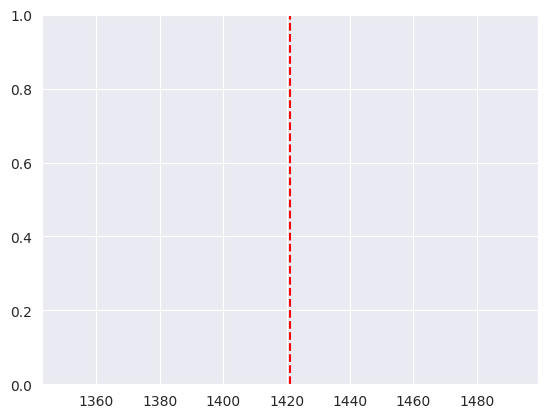

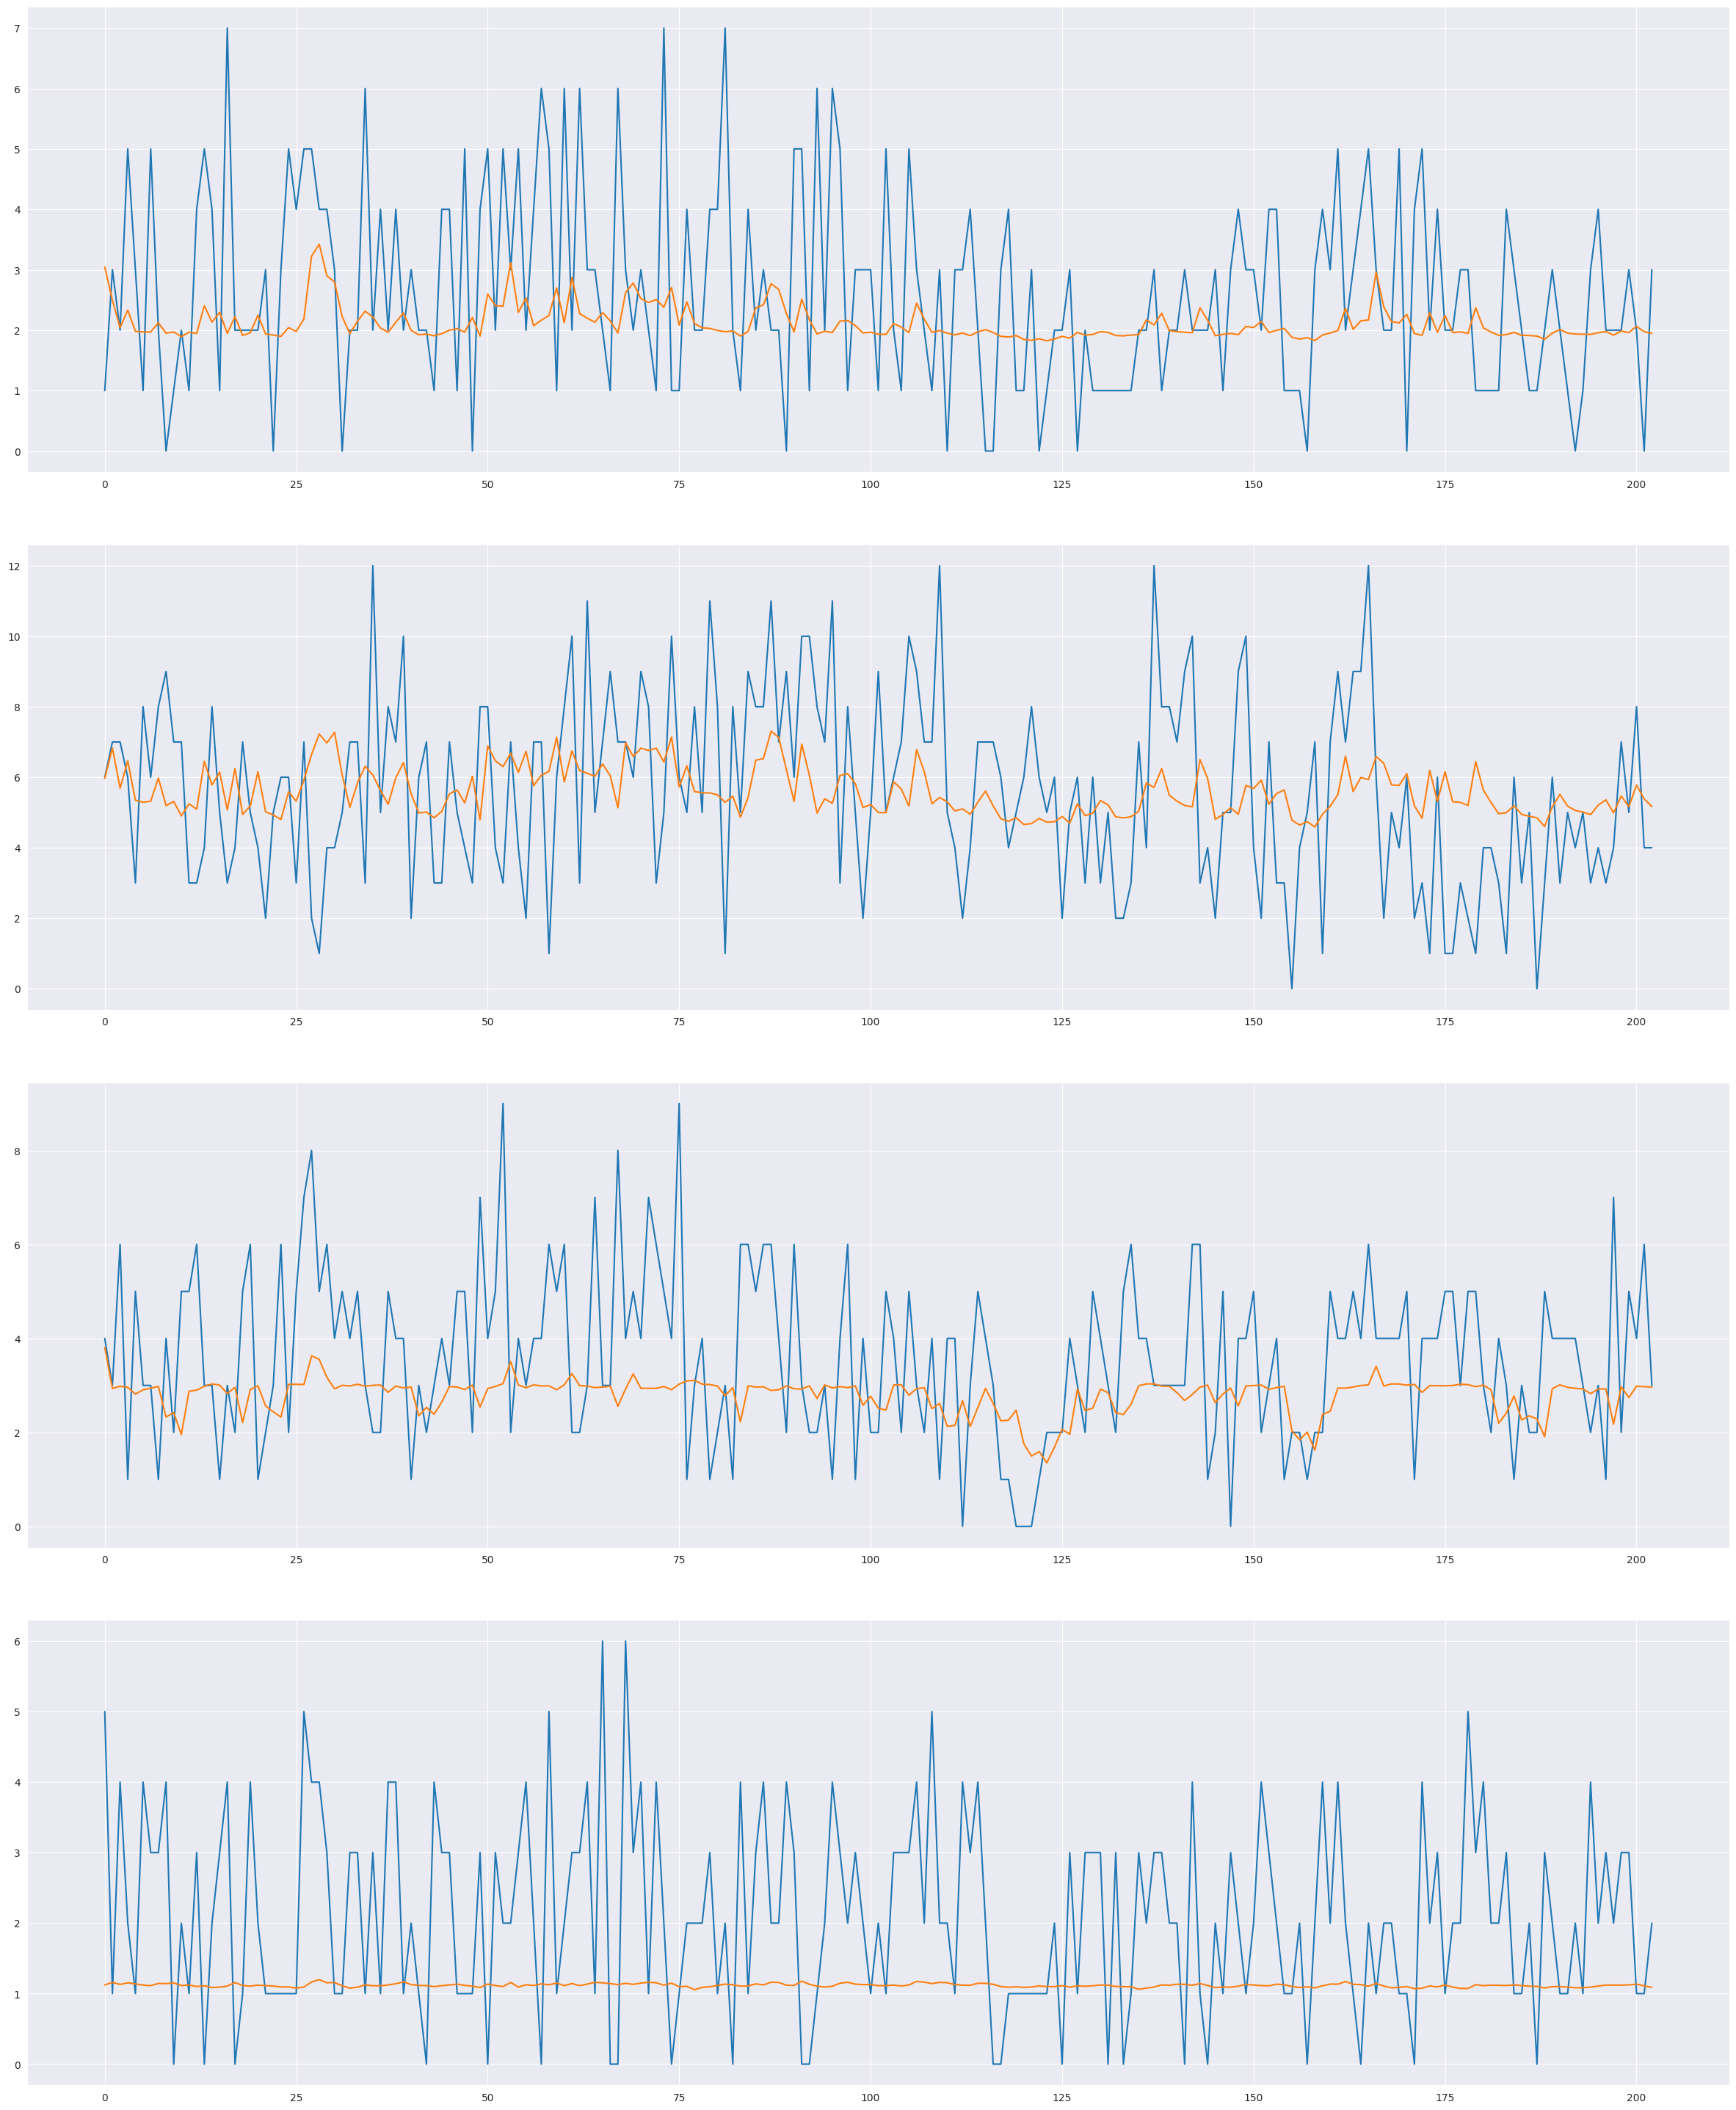

In [10]:

lstm.eval()
train_predict = lstm(testX)

data_predict = train_predict.data.numpy()
dataY_plot = testY.data.numpy()

data_predict = sc.inverse_transform(data_predict)

dataY_plot = sc.inverse_transform(dataY_plot)

plt.axvline(x=train_size, c='r', linestyle='--')

#plt.plot(dataY_plot[:,1:2])
"""
plt.plot(dataY_plot[:,0:1])
plt.plot(data_predict[:,0:1])
plt.suptitle('Time-Series Prediction')
plt.show()
"""

#z=dataY_plot[:,0]-data_predict[:,0]




fig, axs = plt.subplots(4,1, figsize=(25,30))
fig.tight_layout(pad = 5)

for i in range(0,4):
    axs[(i)].plot(dataY_plot[:,i] )
    axs[(i)].plot(data_predict[:,i] )

plt.show()

Predição de steps a frente com a propria LSTM

In [10]:
import numpy as np


def sliding_windows(data, seq_length):
    x = []
    y = []

    for i in range(len(data)-seq_length-1):
        _x = data[i:(i+seq_length)]
        _y = data[i+seq_length]
        x.append(_x)
        y.append(_y)

    return np.array(x),np.array(y)

sc = MinMaxScaler()
training_data = sc.fit_transform(training_set)

seq_length = 6
x, y = sliding_windows(training_data, seq_length)

train_size = int(len(y) * 0.70)#treino e teste -> olhar talvez  70,
val_size = int(len(y) *0.90) #intervalo entre no codigo 70 e 90
test_size = int(len(y)*0.10) #restante, pelo codigo esse valor não é utilizado
#test_size = len(y) - train_size

#valição

dataX = Variable(torch.Tensor(np.array(x)))
#print(dataX.shape)
dataY = Variable(torch.Tensor(np.array(y)))

trainX = Variable(torch.Tensor(np.array(x[0:train_size])))
trainY = Variable(torch.Tensor(np.array(y[0:train_size])))

valX = Variable(torch.Tensor(np.array(x[train_size:val_size])))
valY = Variable(torch.Tensor(np.array(y[train_size:val_size])))

testX = Variable(torch.Tensor(np.array(x[val_size:len(x)])))
testY = Variable(torch.Tensor(np.array(y[val_size:len(y)])))
print(trainX.shape)
print(trainY.shape)
print(valX.shape)
print(valY.shape)

import optuna
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# Define your LSTM model class
class LSTM(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super(LSTM, self).__init__()

        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size

        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, batch_first=True)
        self.fc_1 = nn.Linear(hidden_size, 128)
        self.fc = nn.Linear(128, num_classes)

        self.relu = nn.ReLU()

    def forward(self, x):
        h_0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c_0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        output, (hn, cn) = self.lstm(x, (h_0, c_0))
        hn = hn.view(-1, self.hidden_size)
        out = self.relu(hn)
        out = self.fc_1(out)
        out = self.relu(out)
        out = self.fc(out)
        return out

# Define the objective function
def objective(trial):
    input_size = 4
    hidden_size = trial.suggest_int("hidden_size", 1, 10)
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1e-1)
  
    num_epochs = 500
    num_layers = 1
    num_classes = 4
    
    lstm = LSTM(num_classes, input_size, hidden_size, num_layers)
    criterion = torch.nn.L1Loss()
    optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)
    
    num_prediction_steps = 3  # Number of steps to predict ahead
    predictions = []  # Store predictions
    
    # Initialize the input tensor for prediction (x_pred)
    x_pred = valX[0].unsqueeze(0)  # Use the first sequence from valX as the initial input


    for epoch in range(num_epochs):
        trainX = Variable(torch.Tensor(np.array(x[0:train_size])))

        outputs = lstm(trainX)

        optimizer.zero_grad()
        loss = criterion(outputs, trainY)
        loss.backward()
        optimizer.step()

        # Predict and update the input sequence step by step
        for step in range(num_prediction_steps):
            with torch.no_grad():
                # Predict one step ahead
                prediction = lstm(x_pred)
                predictions.append(prediction.squeeze().numpy())

                # Update x_pred with the predicted value
                x_pred[:, :-1, :] = x_pred[:, 1:, :]  # Shift the values to the left
                x_pred[:, -1, :] = torch.Tensor(predictions[-1])

            

    # Concatenate the predicted values to get the final predictions
    final_predictions = np.concatenate(predictions, axis=0)

    # Calculate the loss based on the final predictions and the true target
    final_loss = criterion(torch.Tensor(final_predictions), trainY[-len(predictions):])

    return final_loss.item()

if __name__ == "__main__":
    study = optuna.create_study(direction="minimize")
    study.optimize(objective, n_trials=20)

    print("Number of finished trials: ", len(study.trials))
    print("Best trial:")
    trial = study.best_trial

    print("Value: ", trial.value)
    print("Params: ")
    for key, value in trial.params.items():
        print(f"    {key}: {value}")

    best_hidden_size = trial.params["hidden_size"]
    best_learning_rate = trial.params["learning_rate"]

    print("Best Hyperparameters:")
    print(f"Hidden Size: {best_hidden_size}")
    print(f"Learning Rate: {best_learning_rate}")

    # Extract the loss values and hyperparameters
    loss_values = [trial.value for trial in study.trials]
    hidden_sizes = [trial.params["hidden_size"] for trial in study.trials]
    learning_rates = [trial.params["learning_rate"] for trial in study.trials]

    # Create a DataFrame for easier plotting with Seaborn
    df = pd.DataFrame({'Loss': loss_values, 'Hidden Size': hidden_sizes, 'Learning Rate': learning_rates})

# Plot the loss values
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
ax = sns.scatterplot(data=df, x='Loss', y='Hidden Size', hue='Learning Rate', palette="deep", s=100)
plt.title("Loss vs. Hidden Size (Trials)")
plt.xlabel("Loss")
plt.ylabel("Hidden Size")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


[I 2023-10-04 12:04:55,621] A new study created in memory with name: no-name-d9712102-e58c-4d5f-af23-141e0dacc411
/tmp/ipykernel_3087914/420302693.py:86: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1e-1)
[W 2023-10-04 12:04:55,633] Trial 0 failed with parameters: {'hidden_size': 3, 'learning_rate': 0.0004031933322933703} because of the following error: RuntimeError('unsupported operation: some elements of the input tensor and the written-to tensor refer to a single memory location. Please clone() the tensor before performing the operation.').
Traceback (most recent call last):
  File "/home/dsciaux1/PycharmProjects/pythonProject/venv/lib/python3.10/site-packages/optuna/study/_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "/tmp/ipy

torch.Size([1421, 6, 4])
torch.Size([1421, 4])
torch.Size([406, 6, 4])
torch.Size([406, 4])


RuntimeError: unsupported operation: some elements of the input tensor and the written-to tensor refer to a single memory location. Please clone() the tensor before performing the operation.

In [4]:
import numpy as np

def create_multi_step_sequences(data, seq_length, output_seq_length):
    x = []
    y = []

    for i in range(len(data) - seq_length - output_seq_length + 1):
        # Input sequence
        _x = data[i:(i + seq_length)]
        # Output sequence (future values to predict)
        _y = data[(i + seq_length):(i + seq_length + output_seq_length)]
        
        x.append(_x)
        y.append(_y)

    return np.array(x), np.array(y)

sc = MinMaxScaler()
training_data = sc.fit_transform(training_set)
# Example usage:
seq_length = 7  # For example, use the last 7 days to predict the next 3 days.
output_seq_length = 5  # Predict the next 3 days.
x, y = create_multi_step_sequences(training_data, seq_length, output_seq_length)

train_size = int(len(y) * 0.70)#treino e teste -> olhar talvez  70,
val_size = int(len(y) *0.90) #intervalo entre no codigo 70 e 90
test_size = int(len(y)*0.10) #restante, pelo codigo esse valor não é utilizado
#test_size = len(y) - train_size

#valição

dataX = Variable(torch.Tensor(np.array(x)))
#print(dataX.shape)
dataY = Variable(torch.Tensor(np.array(y)))

trainX = Variable(torch.Tensor(np.array(x[0:train_size])))
trainY = Variable(torch.Tensor(np.array(y[0:train_size])))

valX = Variable(torch.Tensor(np.array(x[train_size:val_size])))
valY = Variable(torch.Tensor(np.array(y[train_size:val_size])))

testX = Variable(torch.Tensor(np.array(x[val_size:len(x)])))
testY = Variable(torch.Tensor(np.array(y[val_size:len(y)])))
print(trainX.shape)
print(trainY.shape)
print(valX.shape)
print(valY.shape)

torch.Size([1418, 7, 4])
torch.Size([1418, 5, 4])
torch.Size([405, 7, 4])
torch.Size([405, 5, 4])


[I 2023-09-27 08:51:32,770] A new study created in memory with name: no-name-abf3c6a0-42b4-4c17-b2c4-757f86fe6432
/tmp/ipykernel_2445778/55919697.py:44: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1e-1)


passei aqui 1
Epoch: 0, loss: 0.09991
Epoch: 0, val_loss: 0.09314
tensor(0.0999, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.01940
Epoch: 100, val_loss: 0.02737
tensor(0.0194, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.01889
Epoch: 200, val_loss: 0.02706
tensor(0.0189, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.01871
Epoch: 300, val_loss: 0.02698
tensor(0.0187, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.01863
Epoch: 400, val_loss: 0.02699
tensor(0.0186, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:51:34,209] Trial 0 finished with value: 0.018578242510557175 and parameters: {'hidden_size': 3, 'learning_rate': 0.002614649553506129}. Best is trial 0 with value: 0.018578242510557175.


passei aqui 1
Epoch: 0, loss: 0.06466
Epoch: 0, val_loss: 0.07324
tensor(0.0647, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.03687
Epoch: 100, val_loss: 0.04600
tensor(0.0369, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.02627
Epoch: 200, val_loss: 0.03552
tensor(0.0263, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.02205
Epoch: 300, val_loss: 0.03114
tensor(0.0220, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.02046
Epoch: 400, val_loss: 0.02934
tensor(0.0205, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:51:35,457] Trial 1 finished with value: 0.019951077178120613 and parameters: {'hidden_size': 2, 'learning_rate': 5.3520130852251055e-05}. Best is trial 0 with value: 0.018578242510557175.


passei aqui 1
Epoch: 0, loss: 0.06878
Epoch: 0, val_loss: 0.07079
tensor(0.0688, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.01956
Epoch: 100, val_loss: 0.02660
tensor(0.0196, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.01879
Epoch: 200, val_loss: 0.02624
tensor(0.0188, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.01867
Epoch: 300, val_loss: 0.02626
tensor(0.0187, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.01858
Epoch: 400, val_loss: 0.02621
tensor(0.0186, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:51:36,995] Trial 2 finished with value: 0.018494151532649994 and parameters: {'hidden_size': 6, 'learning_rate': 0.002717149782689511}. Best is trial 2 with value: 0.018494151532649994.


passei aqui 1
Epoch: 0, loss: 0.09846
Epoch: 0, val_loss: 0.09925
tensor(0.0985, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.02112
Epoch: 100, val_loss: 0.03005
tensor(0.0211, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.01983
Epoch: 200, val_loss: 0.02848
tensor(0.0198, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.01983
Epoch: 300, val_loss: 0.02846
tensor(0.0198, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.01983
Epoch: 400, val_loss: 0.02846
tensor(0.0198, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:51:38,405] Trial 3 finished with value: 0.01982889324426651 and parameters: {'hidden_size': 1, 'learning_rate': 0.00016096513656551714}. Best is trial 2 with value: 0.018494151532649994.


passei aqui 1
Epoch: 0, loss: 0.06929
Epoch: 0, val_loss: 0.08626
tensor(0.0693, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.05458
Epoch: 100, val_loss: 0.06901
tensor(0.0546, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.04474
Epoch: 200, val_loss: 0.05743
tensor(0.0447, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.03795
Epoch: 300, val_loss: 0.04925
tensor(0.0380, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.03317
Epoch: 400, val_loss: 0.04345
tensor(0.0332, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:51:39,791] Trial 4 finished with value: 0.029748793691396713 and parameters: {'hidden_size': 2, 'learning_rate': 2.327407804374872e-05}. Best is trial 2 with value: 0.018494151532649994.


passei aqui 1
Epoch: 0, loss: 0.12273
Epoch: 0, val_loss: 0.55301
tensor(0.1227, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.01983
Epoch: 100, val_loss: 0.02847
tensor(0.0198, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.01983
Epoch: 200, val_loss: 0.02845
tensor(0.0198, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.01983
Epoch: 300, val_loss: 0.02846
tensor(0.0198, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.01983
Epoch: 400, val_loss: 0.02846
tensor(0.0198, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:51:41,159] Trial 5 finished with value: 0.019828880205750465 and parameters: {'hidden_size': 1, 'learning_rate': 0.03593764784959965}. Best is trial 2 with value: 0.018494151532649994.


passei aqui 1
Epoch: 0, loss: 0.11077
Epoch: 0, val_loss: 0.12673
tensor(0.1108, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.01977
Epoch: 100, val_loss: 0.02826
tensor(0.0198, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.01949
Epoch: 200, val_loss: 0.02791
tensor(0.0195, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.01911
Epoch: 300, val_loss: 0.02789
tensor(0.0191, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.01893
Epoch: 400, val_loss: 0.02761
tensor(0.0189, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:51:42,772] Trial 6 finished with value: 0.018822479993104935 and parameters: {'hidden_size': 4, 'learning_rate': 0.0009519658612869217}. Best is trial 2 with value: 0.018494151532649994.


passei aqui 1
Epoch: 0, loss: 0.05764
Epoch: 0, val_loss: 0.05874
tensor(0.0576, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.01950
Epoch: 100, val_loss: 0.02789
tensor(0.0195, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.01860
Epoch: 200, val_loss: 0.02646
tensor(0.0186, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.01839
Epoch: 300, val_loss: 0.02679
tensor(0.0184, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.01822
Epoch: 400, val_loss: 0.02706
tensor(0.0182, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:51:45,663] Trial 7 finished with value: 0.018062682822346687 and parameters: {'hidden_size': 10, 'learning_rate': 0.004110226183611985}. Best is trial 7 with value: 0.018062682822346687.


passei aqui 1
Epoch: 0, loss: 0.09780
Epoch: 0, val_loss: 0.09784
tensor(0.0978, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.01972
Epoch: 100, val_loss: 0.02782
tensor(0.0197, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.01889
Epoch: 200, val_loss: 0.02647
tensor(0.0189, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.01863
Epoch: 300, val_loss: 0.02664
tensor(0.0186, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.01853
Epoch: 400, val_loss: 0.02709
tensor(0.0185, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:51:47,159] Trial 8 finished with value: 0.018476618453860283 and parameters: {'hidden_size': 3, 'learning_rate': 0.0026836388934770644}. Best is trial 7 with value: 0.018062682822346687.


passei aqui 1
Epoch: 0, loss: 0.07101
Epoch: 0, val_loss: 0.08884
tensor(0.0710, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.01983
Epoch: 100, val_loss: 0.02842
tensor(0.0198, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.01982
Epoch: 200, val_loss: 0.02844
tensor(0.0198, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.01982
Epoch: 300, val_loss: 0.02843
tensor(0.0198, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.01981
Epoch: 400, val_loss: 0.02842
tensor(0.0198, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:51:48,656] Trial 9 finished with value: 0.019786575809121132 and parameters: {'hidden_size': 4, 'learning_rate': 0.00044663064104231574}. Best is trial 7 with value: 0.018062682822346687.


passei aqui 1
Epoch: 0, loss: 0.07179
Epoch: 0, val_loss: 1.21801
tensor(0.0718, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.01966
Epoch: 100, val_loss: 0.02825
tensor(0.0197, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.01950
Epoch: 200, val_loss: 0.02829
tensor(0.0195, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.01911
Epoch: 300, val_loss: 0.02841
tensor(0.0191, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.01909
Epoch: 400, val_loss: 0.02841
tensor(0.0191, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:51:50,605] Trial 10 finished with value: 0.019136179238557816 and parameters: {'hidden_size': 10, 'learning_rate': 0.09006604831194638}. Best is trial 7 with value: 0.018062682822346687.


passei aqui 1
Epoch: 0, loss: 0.05855
Epoch: 0, val_loss: 0.04231
tensor(0.0586, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.01908
Epoch: 100, val_loss: 0.02828
tensor(0.0191, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.01851
Epoch: 200, val_loss: 0.02627
tensor(0.0185, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.01831
Epoch: 300, val_loss: 0.02649
tensor(0.0183, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.01817
Epoch: 400, val_loss: 0.02678
tensor(0.0182, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:51:52,494] Trial 11 finished with value: 0.01814752072095871 and parameters: {'hidden_size': 10, 'learning_rate': 0.01003492437011483}. Best is trial 7 with value: 0.018062682822346687.


passei aqui 1
Epoch: 0, loss: 0.06498
Epoch: 0, val_loss: 0.03748
tensor(0.0650, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.01896
Epoch: 100, val_loss: 0.02751
tensor(0.0190, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.01857
Epoch: 200, val_loss: 0.02671
tensor(0.0186, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.01836
Epoch: 300, val_loss: 0.02708
tensor(0.0184, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.01815
Epoch: 400, val_loss: 0.02755
tensor(0.0182, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:51:54,510] Trial 12 finished with value: 0.01803845912218094 and parameters: {'hidden_size': 10, 'learning_rate': 0.012155373229411468}. Best is trial 12 with value: 0.01803845912218094.


passei aqui 1
Epoch: 0, loss: 0.08216
Epoch: 0, val_loss: 0.04246
tensor(0.0822, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.01884
Epoch: 100, val_loss: 0.02681
tensor(0.0188, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.01863
Epoch: 200, val_loss: 0.02628
tensor(0.0186, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.01853
Epoch: 300, val_loss: 0.02675
tensor(0.0185, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.01842
Epoch: 400, val_loss: 0.02716
tensor(0.0184, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:51:56,318] Trial 13 finished with value: 0.018269909545779228 and parameters: {'hidden_size': 8, 'learning_rate': 0.023798307941011818}. Best is trial 12 with value: 0.01803845912218094.


passei aqui 1
Epoch: 0, loss: 0.09072
Epoch: 0, val_loss: 0.05884
tensor(0.0907, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.01891
Epoch: 100, val_loss: 0.02714
tensor(0.0189, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.01872
Epoch: 200, val_loss: 0.02669
tensor(0.0187, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.01865
Epoch: 300, val_loss: 0.02701
tensor(0.0186, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.01853
Epoch: 400, val_loss: 0.02701
tensor(0.0185, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:51:58,095] Trial 14 finished with value: 0.01844257116317749 and parameters: {'hidden_size': 8, 'learning_rate': 0.009651138200374108}. Best is trial 12 with value: 0.01803845912218094.


passei aqui 1
Epoch: 0, loss: 0.07758
Epoch: 0, val_loss: 0.05744
tensor(0.0776, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.01906
Epoch: 100, val_loss: 0.02842
tensor(0.0191, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.01864
Epoch: 200, val_loss: 0.02618
tensor(0.0186, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.01848
Epoch: 300, val_loss: 0.02678
tensor(0.0185, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.01834
Epoch: 400, val_loss: 0.02719
tensor(0.0183, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:51:59,818] Trial 15 finished with value: 0.018261775374412537 and parameters: {'hidden_size': 8, 'learning_rate': 0.00924369228790929}. Best is trial 12 with value: 0.01803845912218094.


passei aqui 1
Epoch: 0, loss: 0.04894
Epoch: 0, val_loss: 0.06323
tensor(0.0489, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.01978
Epoch: 100, val_loss: 0.02839
tensor(0.0198, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.01922
Epoch: 200, val_loss: 0.02779
tensor(0.0192, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.01895
Epoch: 300, val_loss: 0.02685
tensor(0.0189, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.01877
Epoch: 400, val_loss: 0.02621
tensor(0.0188, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:52:01,576] Trial 16 finished with value: 0.018672019243240356 and parameters: {'hidden_size': 9, 'learning_rate': 0.00048498365395785925}. Best is trial 12 with value: 0.01803845912218094.


passei aqui 1
Epoch: 0, loss: 0.08125
Epoch: 0, val_loss: 0.07816
tensor(0.0813, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.01948
Epoch: 100, val_loss: 0.02609
tensor(0.0195, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.01858
Epoch: 200, val_loss: 0.02656
tensor(0.0186, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.01839
Epoch: 300, val_loss: 0.02791
tensor(0.0184, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.01826
Epoch: 400, val_loss: 0.02911
tensor(0.0183, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:52:03,271] Trial 17 finished with value: 0.01815299317240715 and parameters: {'hidden_size': 6, 'learning_rate': 0.004177391545802329}. Best is trial 12 with value: 0.01803845912218094.


passei aqui 1
Epoch: 0, loss: 0.07060
Epoch: 0, val_loss: 0.66156
tensor(0.0706, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.01979
Epoch: 100, val_loss: 0.02839
tensor(0.0198, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.01911
Epoch: 200, val_loss: 0.02850
tensor(0.0191, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.01907
Epoch: 300, val_loss: 0.02854
tensor(0.0191, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.01907
Epoch: 400, val_loss: 0.02860
tensor(0.0191, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:52:04,927] Trial 18 finished with value: 0.019033994525671005 and parameters: {'hidden_size': 7, 'learning_rate': 0.0722881182913444}. Best is trial 12 with value: 0.01803845912218094.


passei aqui 1
Epoch: 0, loss: 0.07694
Epoch: 0, val_loss: 0.04150
tensor(0.0769, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.01909
Epoch: 100, val_loss: 0.02857
tensor(0.0191, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.01880
Epoch: 200, val_loss: 0.02672
tensor(0.0188, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.01867
Epoch: 300, val_loss: 0.02669
tensor(0.0187, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.01852
Epoch: 400, val_loss: 0.02675
tensor(0.0185, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:52:06,749] Trial 19 finished with value: 0.018416231498122215 and parameters: {'hidden_size': 10, 'learning_rate': 0.02209078676693647}. Best is trial 12 with value: 0.01803845912218094.


passei aqui 1
Epoch: 0, loss: 0.08283
Epoch: 0, val_loss: 0.09253
tensor(0.0828, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.01976
Epoch: 100, val_loss: 0.02832
tensor(0.0198, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.01905
Epoch: 200, val_loss: 0.02758
tensor(0.0191, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.01875
Epoch: 300, val_loss: 0.02645
tensor(0.0188, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.01863
Epoch: 400, val_loss: 0.02660
tensor(0.0186, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:52:08,548] Trial 20 finished with value: 0.018548721447587013 and parameters: {'hidden_size': 9, 'learning_rate': 0.0014006739996003253}. Best is trial 12 with value: 0.01803845912218094.


passei aqui 1
Epoch: 0, loss: 0.06926
Epoch: 0, val_loss: 0.05423
tensor(0.0693, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.01902
Epoch: 100, val_loss: 0.02869
tensor(0.0190, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.01863
Epoch: 200, val_loss: 0.02673
tensor(0.0186, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.01831
Epoch: 300, val_loss: 0.02691
tensor(0.0183, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.01806
Epoch: 400, val_loss: 0.02724
tensor(0.0181, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:52:10,488] Trial 21 finished with value: 0.01791352406144142 and parameters: {'hidden_size': 10, 'learning_rate': 0.008091832999094764}. Best is trial 21 with value: 0.01791352406144142.


passei aqui 1
Epoch: 0, loss: 0.06462
Epoch: 0, val_loss: 0.05598
tensor(0.0646, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.01892
Epoch: 100, val_loss: 0.02711
tensor(0.0189, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.01856
Epoch: 200, val_loss: 0.02652
tensor(0.0186, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.01819
Epoch: 300, val_loss: 0.02791
tensor(0.0182, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.01797
Epoch: 400, val_loss: 0.02820
tensor(0.0180, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:52:12,343] Trial 22 finished with value: 0.01781255565583706 and parameters: {'hidden_size': 9, 'learning_rate': 0.006515546959141989}. Best is trial 22 with value: 0.01781255565583706.


passei aqui 1
Epoch: 0, loss: 0.07447
Epoch: 0, val_loss: 0.04540
tensor(0.0745, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.01983
Epoch: 100, val_loss: 0.02847
tensor(0.0198, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.01983
Epoch: 200, val_loss: 0.02846
tensor(0.0198, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.01983
Epoch: 300, val_loss: 0.02846
tensor(0.0198, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.01983
Epoch: 400, val_loss: 0.02846
tensor(0.0198, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:52:14,196] Trial 23 finished with value: 0.019828880205750465 and parameters: {'hidden_size': 9, 'learning_rate': 0.013680633638015116}. Best is trial 22 with value: 0.01781255565583706.


passei aqui 1
Epoch: 0, loss: 0.06426
Epoch: 0, val_loss: 0.05470
tensor(0.0643, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.01910
Epoch: 100, val_loss: 0.02805
tensor(0.0191, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.01871
Epoch: 200, val_loss: 0.02604
tensor(0.0187, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.01857
Epoch: 300, val_loss: 0.02605
tensor(0.0186, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.01848
Epoch: 400, val_loss: 0.02610
tensor(0.0185, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:52:15,928] Trial 24 finished with value: 0.01839139126241207 and parameters: {'hidden_size': 7, 'learning_rate': 0.005420916476907333}. Best is trial 22 with value: 0.01781255565583706.


passei aqui 1
Epoch: 0, loss: 0.06071
Epoch: 0, val_loss: 0.11433
tensor(0.0607, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.01937
Epoch: 100, val_loss: 0.02833
tensor(0.0194, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.01887
Epoch: 200, val_loss: 0.02650
tensor(0.0189, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.01875
Epoch: 300, val_loss: 0.02672
tensor(0.0187, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.01867
Epoch: 400, val_loss: 0.02677
tensor(0.0187, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:52:17,769] Trial 25 finished with value: 0.018621645867824554 and parameters: {'hidden_size': 9, 'learning_rate': 0.04122249826960168}. Best is trial 22 with value: 0.01781255565583706.


passei aqui 1
Epoch: 0, loss: 0.06676
Epoch: 0, val_loss: 0.03628
tensor(0.0668, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.01903
Epoch: 100, val_loss: 0.02837
tensor(0.0190, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.01863
Epoch: 200, val_loss: 0.02634
tensor(0.0186, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.01835
Epoch: 300, val_loss: 0.02652
tensor(0.0184, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.01817
Epoch: 400, val_loss: 0.02701
tensor(0.0182, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:52:19,480] Trial 26 finished with value: 0.018057165667414665 and parameters: {'hidden_size': 7, 'learning_rate': 0.017348061781587362}. Best is trial 22 with value: 0.01781255565583706.


passei aqui 1
Epoch: 0, loss: 0.07038
Epoch: 0, val_loss: 0.05590
tensor(0.0704, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.01966
Epoch: 100, val_loss: 0.02841
tensor(0.0197, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.01877
Epoch: 200, val_loss: 0.02647
tensor(0.0188, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.01852
Epoch: 300, val_loss: 0.02722
tensor(0.0185, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.01827
Epoch: 400, val_loss: 0.02880
tensor(0.0183, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:52:21,451] Trial 27 finished with value: 0.018068069592118263 and parameters: {'hidden_size': 10, 'learning_rate': 0.007931470131206167}. Best is trial 22 with value: 0.01781255565583706.


passei aqui 1
Epoch: 0, loss: 0.05861
Epoch: 0, val_loss: 0.07694
tensor(0.0586, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.01983
Epoch: 100, val_loss: 0.02844
tensor(0.0198, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.01983
Epoch: 200, val_loss: 0.02846
tensor(0.0198, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.01983
Epoch: 300, val_loss: 0.02846
tensor(0.0198, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.01983
Epoch: 400, val_loss: 0.02846
tensor(0.0198, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:52:23,205] Trial 28 finished with value: 0.019828880205750465 and parameters: {'hidden_size': 8, 'learning_rate': 0.03500263156709622}. Best is trial 22 with value: 0.01781255565583706.


passei aqui 1
Epoch: 0, loss: 0.06122
Epoch: 0, val_loss: 0.06005
tensor(0.0612, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.01981
Epoch: 100, val_loss: 0.02845
tensor(0.0198, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.01903
Epoch: 200, val_loss: 0.02796
tensor(0.0190, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.01855
Epoch: 300, val_loss: 0.02653
tensor(0.0185, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.01835
Epoch: 400, val_loss: 0.02697
tensor(0.0184, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:52:25,113] Trial 29 finished with value: 0.018214290961623192 and parameters: {'hidden_size': 9, 'learning_rate': 0.00515718363305731}. Best is trial 22 with value: 0.01781255565583706.


passei aqui 1
Epoch: 0, loss: 0.06220
Epoch: 0, val_loss: 0.07213
tensor(0.0622, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.01921
Epoch: 100, val_loss: 0.02830
tensor(0.0192, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.01885
Epoch: 200, val_loss: 0.02676
tensor(0.0188, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.01869
Epoch: 300, val_loss: 0.02623
tensor(0.0187, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.01856
Epoch: 400, val_loss: 0.02639
tensor(0.0186, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:52:27,015] Trial 30 finished with value: 0.018395116552710533 and parameters: {'hidden_size': 10, 'learning_rate': 0.0016887777614722668}. Best is trial 22 with value: 0.01781255565583706.


passei aqui 1
Epoch: 0, loss: 0.06860
Epoch: 0, val_loss: 0.03631
tensor(0.0686, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.01904
Epoch: 100, val_loss: 0.02808
tensor(0.0190, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.01865
Epoch: 200, val_loss: 0.02623
tensor(0.0187, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.01853
Epoch: 300, val_loss: 0.02620
tensor(0.0185, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.01834
Epoch: 400, val_loss: 0.02637
tensor(0.0183, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:52:28,652] Trial 31 finished with value: 0.018187815323472023 and parameters: {'hidden_size': 7, 'learning_rate': 0.016923360968323507}. Best is trial 22 with value: 0.01781255565583706.


passei aqui 1
Epoch: 0, loss: 0.06611
Epoch: 0, val_loss: 0.05176
tensor(0.0661, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.01885
Epoch: 100, val_loss: 0.02663
tensor(0.0188, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.01868
Epoch: 200, val_loss: 0.02679
tensor(0.0187, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.01853
Epoch: 300, val_loss: 0.02667
tensor(0.0185, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.01847
Epoch: 400, val_loss: 0.02695
tensor(0.0185, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:52:30,279] Trial 32 finished with value: 0.018367700278759003 and parameters: {'hidden_size': 5, 'learning_rate': 0.017769027746619672}. Best is trial 22 with value: 0.01781255565583706.


passei aqui 1
Epoch: 0, loss: 0.08221
Epoch: 0, val_loss: 0.05906
tensor(0.0822, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.01890
Epoch: 100, val_loss: 0.02761
tensor(0.0189, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.01837
Epoch: 200, val_loss: 0.02690
tensor(0.0184, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.01816
Epoch: 300, val_loss: 0.02729
tensor(0.0182, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.01795
Epoch: 400, val_loss: 0.02804
tensor(0.0179, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:52:32,052] Trial 33 finished with value: 0.01775316894054413 and parameters: {'hidden_size': 9, 'learning_rate': 0.006959924412259441}. Best is trial 33 with value: 0.01775316894054413.


passei aqui 1
Epoch: 0, loss: 0.06485
Epoch: 0, val_loss: 0.05565
tensor(0.0648, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.01916
Epoch: 100, val_loss: 0.02754
tensor(0.0192, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.01877
Epoch: 200, val_loss: 0.02645
tensor(0.0188, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.01867
Epoch: 300, val_loss: 0.02626
tensor(0.0187, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.01859
Epoch: 400, val_loss: 0.02630
tensor(0.0186, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:52:33,843] Trial 34 finished with value: 0.01846311055123806 and parameters: {'hidden_size': 9, 'learning_rate': 0.006491364804770918}. Best is trial 33 with value: 0.01775316894054413.


passei aqui 1
Epoch: 0, loss: 0.08496
Epoch: 0, val_loss: 0.08272
tensor(0.0850, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.01916
Epoch: 100, val_loss: 0.02788
tensor(0.0192, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.01886
Epoch: 200, val_loss: 0.02619
tensor(0.0189, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.01874
Epoch: 300, val_loss: 0.02633
tensor(0.0187, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.01862
Epoch: 400, val_loss: 0.02653
tensor(0.0186, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:52:35,711] Trial 35 finished with value: 0.018520882353186607 and parameters: {'hidden_size': 8, 'learning_rate': 0.0033343116321454917}. Best is trial 33 with value: 0.01775316894054413.


passei aqui 1
Epoch: 0, loss: 0.06711
Epoch: 0, val_loss: 0.07303
tensor(0.0671, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.01946
Epoch: 100, val_loss: 0.02827
tensor(0.0195, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.01889
Epoch: 200, val_loss: 0.02675
tensor(0.0189, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.01872
Epoch: 300, val_loss: 0.02617
tensor(0.0187, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.01856
Epoch: 400, val_loss: 0.02669
tensor(0.0186, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:52:38,209] Trial 36 finished with value: 0.01841328665614128 and parameters: {'hidden_size': 9, 'learning_rate': 0.0021067640311732945}. Best is trial 33 with value: 0.01775316894054413.


passei aqui 1
Epoch: 0, loss: 0.07185
Epoch: 0, val_loss: 0.04162
tensor(0.0718, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.01900
Epoch: 100, val_loss: 0.02757
tensor(0.0190, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.01866
Epoch: 200, val_loss: 0.02651
tensor(0.0187, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.01854
Epoch: 300, val_loss: 0.02691
tensor(0.0185, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.01838
Epoch: 400, val_loss: 0.02728
tensor(0.0184, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:52:40,927] Trial 37 finished with value: 0.018180273473262787 and parameters: {'hidden_size': 10, 'learning_rate': 0.011515174161184546}. Best is trial 33 with value: 0.01775316894054413.


passei aqui 1
Epoch: 0, loss: 0.05684
Epoch: 0, val_loss: 0.04696
tensor(0.0568, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.01913
Epoch: 100, val_loss: 0.02834
tensor(0.0191, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.01862
Epoch: 200, val_loss: 0.02649
tensor(0.0186, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.01836
Epoch: 300, val_loss: 0.02694
tensor(0.0184, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.01810
Epoch: 400, val_loss: 0.02761
tensor(0.0181, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:52:42,610] Trial 38 finished with value: 0.017750097438693047 and parameters: {'hidden_size': 8, 'learning_rate': 0.005673738710811179}. Best is trial 38 with value: 0.017750097438693047.


passei aqui 1
Epoch: 0, loss: 0.08431
Epoch: 0, val_loss: 0.09239
tensor(0.0843, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.01962
Epoch: 100, val_loss: 0.02769
tensor(0.0196, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.01882
Epoch: 200, val_loss: 0.02620
tensor(0.0188, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.01872
Epoch: 300, val_loss: 0.02635
tensor(0.0187, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.01861
Epoch: 400, val_loss: 0.02644
tensor(0.0186, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:52:44,460] Trial 39 finished with value: 0.018498247489333153 and parameters: {'hidden_size': 8, 'learning_rate': 0.0025681984292293446}. Best is trial 38 with value: 0.017750097438693047.


passei aqui 1
Epoch: 0, loss: 0.05931
Epoch: 0, val_loss: 0.05146
tensor(0.0593, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.01919
Epoch: 100, val_loss: 0.02798
tensor(0.0192, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.01874
Epoch: 200, val_loss: 0.02666
tensor(0.0187, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.01864
Epoch: 300, val_loss: 0.02666
tensor(0.0186, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.01856
Epoch: 400, val_loss: 0.02707
tensor(0.0186, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:52:46,282] Trial 40 finished with value: 0.01848842389881611 and parameters: {'hidden_size': 5, 'learning_rate': 0.005032297092674934}. Best is trial 38 with value: 0.017750097438693047.


passei aqui 1
Epoch: 0, loss: 0.06205
Epoch: 0, val_loss: 0.04875
tensor(0.0621, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.01926
Epoch: 100, val_loss: 0.02684
tensor(0.0193, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.01858
Epoch: 200, val_loss: 0.02640
tensor(0.0186, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.01832
Epoch: 300, val_loss: 0.02653
tensor(0.0183, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.01811
Epoch: 400, val_loss: 0.02685
tensor(0.0181, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:52:48,095] Trial 41 finished with value: 0.017923766747117043 and parameters: {'hidden_size': 9, 'learning_rate': 0.006713797684558291}. Best is trial 38 with value: 0.017750097438693047.


passei aqui 1
Epoch: 0, loss: 0.07587
Epoch: 0, val_loss: 0.05994
tensor(0.0759, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.01888
Epoch: 100, val_loss: 0.02595
tensor(0.0189, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.01847
Epoch: 200, val_loss: 0.02775
tensor(0.0185, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.01827
Epoch: 300, val_loss: 0.02932
tensor(0.0183, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.01816
Epoch: 400, val_loss: 0.03024
tensor(0.0182, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:52:49,926] Trial 42 finished with value: 0.017995182424783707 and parameters: {'hidden_size': 9, 'learning_rate': 0.007173377208422776}. Best is trial 38 with value: 0.017750097438693047.


passei aqui 1
Epoch: 0, loss: 0.05584
Epoch: 0, val_loss: 0.05882
tensor(0.0558, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.01917
Epoch: 100, val_loss: 0.02842
tensor(0.0192, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.01878
Epoch: 200, val_loss: 0.02664
tensor(0.0188, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.01862
Epoch: 300, val_loss: 0.02674
tensor(0.0186, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.01852
Epoch: 400, val_loss: 0.02663
tensor(0.0185, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:52:51,549] Trial 43 finished with value: 0.01839061826467514 and parameters: {'hidden_size': 6, 'learning_rate': 0.003325437493005374}. Best is trial 38 with value: 0.017750097438693047.


passei aqui 1
Epoch: 0, loss: 0.05763
Epoch: 0, val_loss: 0.05696
tensor(0.0576, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.01936
Epoch: 100, val_loss: 0.02760
tensor(0.0194, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.01860
Epoch: 200, val_loss: 0.02681
tensor(0.0186, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.01832
Epoch: 300, val_loss: 0.02810
tensor(0.0183, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.01811
Epoch: 400, val_loss: 0.02862
tensor(0.0181, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:52:53,373] Trial 44 finished with value: 0.01787770539522171 and parameters: {'hidden_size': 8, 'learning_rate': 0.0038698870972917973}. Best is trial 38 with value: 0.017750097438693047.


passei aqui 1
Epoch: 0, loss: 0.08649
Epoch: 0, val_loss: 0.08540
tensor(0.0865, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.01914
Epoch: 100, val_loss: 0.02824
tensor(0.0191, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.01879
Epoch: 200, val_loss: 0.02701
tensor(0.0188, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.01854
Epoch: 300, val_loss: 0.02665
tensor(0.0185, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.01841
Epoch: 400, val_loss: 0.02668
tensor(0.0184, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:52:55,321] Trial 45 finished with value: 0.018298892304301262 and parameters: {'hidden_size': 7, 'learning_rate': 0.003276687988903627}. Best is trial 38 with value: 0.017750097438693047.


passei aqui 1
Epoch: 0, loss: 0.07096
Epoch: 0, val_loss: 0.08293
tensor(0.0710, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.01954
Epoch: 100, val_loss: 0.02819
tensor(0.0195, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.01912
Epoch: 200, val_loss: 0.02829
tensor(0.0191, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.01886
Epoch: 300, val_loss: 0.02685
tensor(0.0189, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.01870
Epoch: 400, val_loss: 0.02623
tensor(0.0187, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:52:57,151] Trial 46 finished with value: 0.018641475588083267 and parameters: {'hidden_size': 8, 'learning_rate': 0.001965082003992069}. Best is trial 38 with value: 0.017750097438693047.


passei aqui 1
Epoch: 0, loss: 0.06356
Epoch: 0, val_loss: 0.07851
tensor(0.0636, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.01982
Epoch: 100, val_loss: 0.02843
tensor(0.0198, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.01973
Epoch: 200, val_loss: 0.02825
tensor(0.0197, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.01902
Epoch: 300, val_loss: 0.02794
tensor(0.0190, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.01876
Epoch: 400, val_loss: 0.02640
tensor(0.0188, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:52:59,099] Trial 47 finished with value: 0.018641790375113487 and parameters: {'hidden_size': 8, 'learning_rate': 0.0011696924743522079}. Best is trial 38 with value: 0.017750097438693047.


passei aqui 1
Epoch: 0, loss: 0.05788
Epoch: 0, val_loss: 0.06186
tensor(0.0579, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.01897
Epoch: 100, val_loss: 0.02748
tensor(0.0190, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.01871
Epoch: 200, val_loss: 0.02635
tensor(0.0187, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.01860
Epoch: 300, val_loss: 0.02641
tensor(0.0186, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.01850
Epoch: 400, val_loss: 0.02642
tensor(0.0185, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:53:01,072] Trial 48 finished with value: 0.018407117575407028 and parameters: {'hidden_size': 10, 'learning_rate': 0.00440159644952116}. Best is trial 38 with value: 0.017750097438693047.


passei aqui 1
Epoch: 0, loss: 0.08599
Epoch: 0, val_loss: 0.04371
tensor(0.0860, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.01943
Epoch: 100, val_loss: 0.02796
tensor(0.0194, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.01898
Epoch: 200, val_loss: 0.02723
tensor(0.0190, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.01879
Epoch: 300, val_loss: 0.02730
tensor(0.0188, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.01870
Epoch: 400, val_loss: 0.02712
tensor(0.0187, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:53:02,501] Trial 49 finished with value: 0.018633803352713585 and parameters: {'hidden_size': 3, 'learning_rate': 0.00927499874421817}. Best is trial 38 with value: 0.017750097438693047.


passei aqui 1
Epoch: 0, loss: 0.05889
Epoch: 0, val_loss: 0.06553
tensor(0.0589, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.01969
Epoch: 100, val_loss: 0.02808
tensor(0.0197, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.01898
Epoch: 200, val_loss: 0.02708
tensor(0.0190, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.01886
Epoch: 300, val_loss: 0.02653
tensor(0.0189, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.01879
Epoch: 400, val_loss: 0.02640
tensor(0.0188, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:53:04,181] Trial 50 finished with value: 0.018709547817707062 and parameters: {'hidden_size': 6, 'learning_rate': 0.0011100166067372472}. Best is trial 38 with value: 0.017750097438693047.


passei aqui 1
Epoch: 0, loss: 0.07413
Epoch: 0, val_loss: 0.06472
tensor(0.0741, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.01979
Epoch: 100, val_loss: 0.02842
tensor(0.0198, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.01906
Epoch: 200, val_loss: 0.02867
tensor(0.0191, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.01870
Epoch: 300, val_loss: 0.02699
tensor(0.0187, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.01853
Epoch: 400, val_loss: 0.02836
tensor(0.0185, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:53:06,157] Trial 51 finished with value: 0.018401365727186203 and parameters: {'hidden_size': 9, 'learning_rate': 0.0059903833650296265}. Best is trial 38 with value: 0.017750097438693047.


passei aqui 1
Epoch: 0, loss: 0.05328
Epoch: 0, val_loss: 0.04557
tensor(0.0533, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.01899
Epoch: 100, val_loss: 0.02760
tensor(0.0190, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.01859
Epoch: 200, val_loss: 0.02641
tensor(0.0186, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.01846
Epoch: 300, val_loss: 0.02618
tensor(0.0185, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.01835
Epoch: 400, val_loss: 0.02636
tensor(0.0183, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:53:08,227] Trial 52 finished with value: 0.018281888216733932 and parameters: {'hidden_size': 9, 'learning_rate': 0.00693689405791982}. Best is trial 38 with value: 0.017750097438693047.


passei aqui 1
Epoch: 0, loss: 0.05933
Epoch: 0, val_loss: 0.06063
tensor(0.0593, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.01921
Epoch: 100, val_loss: 0.02804
tensor(0.0192, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.01872
Epoch: 200, val_loss: 0.02629
tensor(0.0187, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.01859
Epoch: 300, val_loss: 0.02622
tensor(0.0186, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.01844
Epoch: 400, val_loss: 0.02632
tensor(0.0184, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:53:11,724] Trial 53 finished with value: 0.018293306231498718 and parameters: {'hidden_size': 8, 'learning_rate': 0.0026048966470340923}. Best is trial 38 with value: 0.017750097438693047.


passei aqui 1
Epoch: 0, loss: 0.06196
Epoch: 0, val_loss: 0.04043
tensor(0.0620, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.01879
Epoch: 100, val_loss: 0.02620
tensor(0.0188, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.01847
Epoch: 200, val_loss: 0.02697
tensor(0.0185, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.01821
Epoch: 300, val_loss: 0.02861
tensor(0.0182, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.01796
Epoch: 400, val_loss: 0.03159
tensor(0.0180, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:53:15,497] Trial 54 finished with value: 0.017809448763728142 and parameters: {'hidden_size': 10, 'learning_rate': 0.01136720774149165}. Best is trial 38 with value: 0.017750097438693047.


passei aqui 1
Epoch: 0, loss: 0.06341
Epoch: 0, val_loss: 0.04632
tensor(0.0634, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.01905
Epoch: 100, val_loss: 0.02850
tensor(0.0190, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.01864
Epoch: 200, val_loss: 0.02658
tensor(0.0186, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.01836
Epoch: 300, val_loss: 0.02646
tensor(0.0184, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.01818
Epoch: 400, val_loss: 0.02680
tensor(0.0182, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:53:18,030] Trial 55 finished with value: 0.018011437729001045 and parameters: {'hidden_size': 10, 'learning_rate': 0.008787084021216265}. Best is trial 38 with value: 0.017750097438693047.


passei aqui 1
Epoch: 0, loss: 0.06777
Epoch: 0, val_loss: 0.06317
tensor(0.0678, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.01907
Epoch: 100, val_loss: 0.02825
tensor(0.0191, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.01880
Epoch: 200, val_loss: 0.02710
tensor(0.0188, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.01868
Epoch: 300, val_loss: 0.02701
tensor(0.0187, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.01862
Epoch: 400, val_loss: 0.02705
tensor(0.0186, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:53:20,020] Trial 56 finished with value: 0.018587447702884674 and parameters: {'hidden_size': 2, 'learning_rate': 0.011163045655089835}. Best is trial 38 with value: 0.017750097438693047.


passei aqui 1
Epoch: 0, loss: 0.05865
Epoch: 0, val_loss: 0.03869
tensor(0.0586, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.01873
Epoch: 100, val_loss: 0.02613
tensor(0.0187, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.01841
Epoch: 200, val_loss: 0.02698
tensor(0.0184, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.01811
Epoch: 300, val_loss: 0.02844
tensor(0.0181, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.01777
Epoch: 400, val_loss: 0.02931
tensor(0.0178, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:53:22,477] Trial 57 finished with value: 0.017544161528348923 and parameters: {'hidden_size': 10, 'learning_rate': 0.013527594185412785}. Best is trial 57 with value: 0.017544161528348923.


passei aqui 1
Epoch: 0, loss: 0.06964
Epoch: 0, val_loss: 0.04125
tensor(0.0696, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.01883
Epoch: 100, val_loss: 0.02662
tensor(0.0188, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.01848
Epoch: 200, val_loss: 0.02687
tensor(0.0185, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.01816
Epoch: 300, val_loss: 0.02726
tensor(0.0182, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.01784
Epoch: 400, val_loss: 0.02746
tensor(0.0178, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:53:25,199] Trial 58 finished with value: 0.017625831067562103 and parameters: {'hidden_size': 10, 'learning_rate': 0.012448125386650157}. Best is trial 57 with value: 0.017544161528348923.


passei aqui 1
Epoch: 0, loss: 0.06216
Epoch: 0, val_loss: 0.04366
tensor(0.0622, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.01908
Epoch: 100, val_loss: 0.02868
tensor(0.0191, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.01877
Epoch: 200, val_loss: 0.02649
tensor(0.0188, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.01872
Epoch: 300, val_loss: 0.02658
tensor(0.0187, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.01865
Epoch: 400, val_loss: 0.02648
tensor(0.0186, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:53:27,100] Trial 59 finished with value: 0.018482951447367668 and parameters: {'hidden_size': 10, 'learning_rate': 0.02760809897255201}. Best is trial 57 with value: 0.017544161528348923.


passei aqui 1
Epoch: 0, loss: 0.06158
Epoch: 0, val_loss: 0.03539
tensor(0.0616, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.01872
Epoch: 100, val_loss: 0.02622
tensor(0.0187, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.01854
Epoch: 200, val_loss: 0.02629
tensor(0.0185, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.01829
Epoch: 300, val_loss: 0.02689
tensor(0.0183, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.01792
Epoch: 400, val_loss: 0.02823
tensor(0.0179, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:53:29,091] Trial 60 finished with value: 0.017694080248475075 and parameters: {'hidden_size': 10, 'learning_rate': 0.01480089458787092}. Best is trial 57 with value: 0.017544161528348923.


passei aqui 1
Epoch: 0, loss: 0.06589
Epoch: 0, val_loss: 0.03905
tensor(0.0659, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.01910
Epoch: 100, val_loss: 0.02840
tensor(0.0191, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.01865
Epoch: 200, val_loss: 0.02653
tensor(0.0187, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.01850
Epoch: 300, val_loss: 0.02665
tensor(0.0185, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.01836
Epoch: 400, val_loss: 0.02719
tensor(0.0184, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:53:31,246] Trial 61 finished with value: 0.018251363188028336 and parameters: {'hidden_size': 10, 'learning_rate': 0.013900361982466492}. Best is trial 57 with value: 0.017544161528348923.


passei aqui 1
Epoch: 0, loss: 0.07915
Epoch: 0, val_loss: 0.03290
tensor(0.0791, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.01888
Epoch: 100, val_loss: 0.02673
tensor(0.0189, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.01858
Epoch: 200, val_loss: 0.02645
tensor(0.0186, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.01839
Epoch: 300, val_loss: 0.02663
tensor(0.0184, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.01809
Epoch: 400, val_loss: 0.02691
tensor(0.0181, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:53:34,077] Trial 62 finished with value: 0.017783934250473976 and parameters: {'hidden_size': 10, 'learning_rate': 0.021421131109417273}. Best is trial 57 with value: 0.017544161528348923.


passei aqui 1
Epoch: 0, loss: 0.05101
Epoch: 0, val_loss: 0.03179
tensor(0.0510, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.01898
Epoch: 100, val_loss: 0.02745
tensor(0.0190, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.01862
Epoch: 200, val_loss: 0.02659
tensor(0.0186, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.01839
Epoch: 300, val_loss: 0.02760
tensor(0.0184, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.01821
Epoch: 400, val_loss: 0.02759
tensor(0.0182, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:53:37,228] Trial 63 finished with value: 0.018090609461069107 and parameters: {'hidden_size': 10, 'learning_rate': 0.023517956415048544}. Best is trial 57 with value: 0.017544161528348923.


passei aqui 1
Epoch: 0, loss: 0.07826
Epoch: 0, val_loss: 0.16921
tensor(0.0783, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.01900
Epoch: 100, val_loss: 0.02740
tensor(0.0190, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.01879
Epoch: 200, val_loss: 0.02629
tensor(0.0188, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.01871
Epoch: 300, val_loss: 0.02649
tensor(0.0187, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.01867
Epoch: 400, val_loss: 0.02687
tensor(0.0187, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:53:39,427] Trial 64 finished with value: 0.018528638407588005 and parameters: {'hidden_size': 10, 'learning_rate': 0.0500921508866449}. Best is trial 57 with value: 0.017544161528348923.


passei aqui 1
Epoch: 0, loss: 0.06641
Epoch: 0, val_loss: 0.06597
tensor(0.0664, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.01896
Epoch: 100, val_loss: 0.02716
tensor(0.0190, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.01870
Epoch: 200, val_loss: 0.02647
tensor(0.0187, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.01856
Epoch: 300, val_loss: 0.02715
tensor(0.0186, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.01837
Epoch: 400, val_loss: 0.02695
tensor(0.0184, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:53:41,431] Trial 65 finished with value: 0.01827896200120449 and parameters: {'hidden_size': 10, 'learning_rate': 0.029296670247249797}. Best is trial 57 with value: 0.017544161528348923.


passei aqui 1
Epoch: 0, loss: 0.08267
Epoch: 0, val_loss: 0.25499
tensor(0.0827, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.01983
Epoch: 100, val_loss: 0.02846
tensor(0.0198, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.01983
Epoch: 200, val_loss: 0.02846
tensor(0.0198, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.01983
Epoch: 300, val_loss: 0.02846
tensor(0.0198, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.01983
Epoch: 400, val_loss: 0.02846
tensor(0.0198, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:53:42,838] Trial 66 finished with value: 0.019828880205750465 and parameters: {'hidden_size': 1, 'learning_rate': 0.019051251753152337}. Best is trial 57 with value: 0.017544161528348923.


passei aqui 1
Epoch: 0, loss: 0.06646
Epoch: 0, val_loss: 0.03686
tensor(0.0665, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.01983
Epoch: 100, val_loss: 0.02846
tensor(0.0198, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.01983
Epoch: 200, val_loss: 0.02846
tensor(0.0198, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.01983
Epoch: 300, val_loss: 0.02846
tensor(0.0198, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.01983
Epoch: 400, val_loss: 0.02846
tensor(0.0198, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:53:44,994] Trial 67 finished with value: 0.019828880205750465 and parameters: {'hidden_size': 9, 'learning_rate': 0.014422364967757948}. Best is trial 57 with value: 0.017544161528348923.


passei aqui 1
Epoch: 0, loss: 0.06799
Epoch: 0, val_loss: 0.04951
tensor(0.0680, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.01912
Epoch: 100, val_loss: 0.02846
tensor(0.0191, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.01876
Epoch: 200, val_loss: 0.02654
tensor(0.0188, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.01864
Epoch: 300, val_loss: 0.02664
tensor(0.0186, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.01850
Epoch: 400, val_loss: 0.02670
tensor(0.0185, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:53:47,116] Trial 68 finished with value: 0.01842433214187622 and parameters: {'hidden_size': 10, 'learning_rate': 0.02366187262508332}. Best is trial 57 with value: 0.017544161528348923.


passei aqui 1
Epoch: 0, loss: 0.06042
Epoch: 0, val_loss: 0.04122
tensor(0.0604, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.01904
Epoch: 100, val_loss: 0.02820
tensor(0.0190, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.01859
Epoch: 200, val_loss: 0.02651
tensor(0.0186, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.01849
Epoch: 300, val_loss: 0.02682
tensor(0.0185, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.01830
Epoch: 400, val_loss: 0.02704
tensor(0.0183, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:53:49,224] Trial 69 finished with value: 0.018103575333952904 and parameters: {'hidden_size': 10, 'learning_rate': 0.012245675744626403}. Best is trial 57 with value: 0.017544161528348923.


passei aqui 1
Epoch: 0, loss: 0.07123
Epoch: 0, val_loss: 0.03495
tensor(0.0712, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.01902
Epoch: 100, val_loss: 0.02759
tensor(0.0190, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.01878
Epoch: 200, val_loss: 0.02635
tensor(0.0188, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.01866
Epoch: 300, val_loss: 0.02657
tensor(0.0187, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.01853
Epoch: 400, val_loss: 0.02681
tensor(0.0185, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:53:51,161] Trial 70 finished with value: 0.018427696079015732 and parameters: {'hidden_size': 9, 'learning_rate': 0.015950456800194864}. Best is trial 57 with value: 0.017544161528348923.


passei aqui 1
Epoch: 0, loss: 0.06373
Epoch: 0, val_loss: 0.04314
tensor(0.0637, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.01907
Epoch: 100, val_loss: 0.02859
tensor(0.0191, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.01865
Epoch: 200, val_loss: 0.02683
tensor(0.0186, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.01846
Epoch: 300, val_loss: 0.02716
tensor(0.0185, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.01828
Epoch: 400, val_loss: 0.02731
tensor(0.0183, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:53:53,130] Trial 71 finished with value: 0.01805391162633896 and parameters: {'hidden_size': 9, 'learning_rate': 0.010461184392045386}. Best is trial 57 with value: 0.017544161528348923.


passei aqui 1
Epoch: 0, loss: 0.07886
Epoch: 0, val_loss: 0.03599
tensor(0.0789, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.01882
Epoch: 100, val_loss: 0.02620
tensor(0.0188, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.01854
Epoch: 200, val_loss: 0.02671
tensor(0.0185, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.01815
Epoch: 300, val_loss: 0.02741
tensor(0.0182, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.01784
Epoch: 400, val_loss: 0.02807
tensor(0.0178, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:53:55,161] Trial 72 finished with value: 0.01768660359084606 and parameters: {'hidden_size': 10, 'learning_rate': 0.021326638289716576}. Best is trial 57 with value: 0.017544161528348923.


passei aqui 1
Epoch: 0, loss: 0.07883
Epoch: 0, val_loss: 0.08284
tensor(0.0788, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.01911
Epoch: 100, val_loss: 0.02827
tensor(0.0191, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.01877
Epoch: 200, val_loss: 0.02652
tensor(0.0188, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.01857
Epoch: 300, val_loss: 0.02668
tensor(0.0186, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.01840
Epoch: 400, val_loss: 0.02673
tensor(0.0184, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:53:57,091] Trial 73 finished with value: 0.018161771818995476 and parameters: {'hidden_size': 10, 'learning_rate': 0.03318184447761675}. Best is trial 57 with value: 0.017544161528348923.


passei aqui 1
Epoch: 0, loss: 0.06524
Epoch: 0, val_loss: 0.03525
tensor(0.0652, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.01913
Epoch: 100, val_loss: 0.02844
tensor(0.0191, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.01877
Epoch: 200, val_loss: 0.02598
tensor(0.0188, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.01856
Epoch: 300, val_loss: 0.02633
tensor(0.0186, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.01836
Epoch: 400, val_loss: 0.02713
tensor(0.0184, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:53:59,033] Trial 74 finished with value: 0.01815139502286911 and parameters: {'hidden_size': 10, 'learning_rate': 0.01959773823030844}. Best is trial 57 with value: 0.017544161528348923.


passei aqui 1
Epoch: 0, loss: 0.07913
Epoch: 0, val_loss: 0.07025
tensor(0.0791, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.01895
Epoch: 100, val_loss: 0.02675
tensor(0.0189, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.01876
Epoch: 200, val_loss: 0.02617
tensor(0.0188, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.01869
Epoch: 300, val_loss: 0.02727
tensor(0.0187, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.01840
Epoch: 400, val_loss: 0.02676
tensor(0.0184, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:54:01,071] Trial 75 finished with value: 0.01816394552588463 and parameters: {'hidden_size': 10, 'learning_rate': 0.03878516999549448}. Best is trial 57 with value: 0.017544161528348923.


passei aqui 1
Epoch: 0, loss: 0.04893
Epoch: 0, val_loss: 0.03303
tensor(0.0489, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.01933
Epoch: 100, val_loss: 0.02820
tensor(0.0193, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.01872
Epoch: 200, val_loss: 0.02634
tensor(0.0187, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.01860
Epoch: 300, val_loss: 0.02694
tensor(0.0186, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.01846
Epoch: 400, val_loss: 0.02816
tensor(0.0185, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:54:02,972] Trial 76 finished with value: 0.018343482166528702 and parameters: {'hidden_size': 9, 'learning_rate': 0.013139830309112359}. Best is trial 57 with value: 0.017544161528348923.


passei aqui 1
Epoch: 0, loss: 0.07450
Epoch: 0, val_loss: 0.22819
tensor(0.0745, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.01955
Epoch: 100, val_loss: 0.02816
tensor(0.0195, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.01905
Epoch: 200, val_loss: 0.02856
tensor(0.0190, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.01902
Epoch: 300, val_loss: 0.02859
tensor(0.0190, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.01899
Epoch: 400, val_loss: 0.02861
tensor(0.0190, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:54:05,054] Trial 77 finished with value: 0.018880074843764305 and parameters: {'hidden_size': 10, 'learning_rate': 0.051973681443011246}. Best is trial 57 with value: 0.017544161528348923.


passei aqui 1
Epoch: 0, loss: 0.05616
Epoch: 0, val_loss: 0.04538
tensor(0.0562, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.01890
Epoch: 100, val_loss: 0.02637
tensor(0.0189, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.01855
Epoch: 200, val_loss: 0.02675
tensor(0.0186, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.01834
Epoch: 300, val_loss: 0.02713
tensor(0.0183, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.01820
Epoch: 400, val_loss: 0.02689
tensor(0.0182, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:54:06,948] Trial 78 finished with value: 0.018099039793014526 and parameters: {'hidden_size': 9, 'learning_rate': 0.025585132792597016}. Best is trial 57 with value: 0.017544161528348923.


passei aqui 1
Epoch: 0, loss: 0.06570
Epoch: 0, val_loss: 0.04104
tensor(0.0657, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.01887
Epoch: 100, val_loss: 0.02668
tensor(0.0189, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.01866
Epoch: 200, val_loss: 0.02637
tensor(0.0187, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.01859
Epoch: 300, val_loss: 0.02621
tensor(0.0186, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.01844
Epoch: 400, val_loss: 0.02647
tensor(0.0184, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:54:08,842] Trial 79 finished with value: 0.018268441781401634 and parameters: {'hidden_size': 10, 'learning_rate': 0.020847328326503704}. Best is trial 57 with value: 0.017544161528348923.


passei aqui 1
Epoch: 0, loss: 0.06968
Epoch: 0, val_loss: 0.05144
tensor(0.0697, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.01892
Epoch: 100, val_loss: 0.02708
tensor(0.0189, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.01862
Epoch: 200, val_loss: 0.02633
tensor(0.0186, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.01839
Epoch: 300, val_loss: 0.02686
tensor(0.0184, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.01820
Epoch: 400, val_loss: 0.02704
tensor(0.0182, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:54:10,837] Trial 80 finished with value: 0.018026066944003105 and parameters: {'hidden_size': 9, 'learning_rate': 0.008239614056466369}. Best is trial 57 with value: 0.017544161528348923.


passei aqui 1
Epoch: 0, loss: 0.06305
Epoch: 0, val_loss: 0.05299
tensor(0.0630, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.01892
Epoch: 100, val_loss: 0.02626
tensor(0.0189, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.01865
Epoch: 200, val_loss: 0.02633
tensor(0.0186, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.01850
Epoch: 300, val_loss: 0.02631
tensor(0.0185, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.01831
Epoch: 400, val_loss: 0.02648
tensor(0.0183, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:54:12,804] Trial 81 finished with value: 0.018182633444666862 and parameters: {'hidden_size': 9, 'learning_rate': 0.005644644831286145}. Best is trial 57 with value: 0.017544161528348923.


passei aqui 1
Epoch: 0, loss: 0.06975
Epoch: 0, val_loss: 0.03580
tensor(0.0698, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.01867
Epoch: 100, val_loss: 0.02617
tensor(0.0187, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.01828
Epoch: 200, val_loss: 0.02718
tensor(0.0183, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.01804
Epoch: 300, val_loss: 0.02802
tensor(0.0180, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.01787
Epoch: 400, val_loss: 0.02862
tensor(0.0179, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:54:14,744] Trial 82 finished with value: 0.017615938559174538 and parameters: {'hidden_size': 10, 'learning_rate': 0.0161494027528541}. Best is trial 57 with value: 0.017544161528348923.


passei aqui 1
Epoch: 0, loss: 0.05706
Epoch: 0, val_loss: 0.04323
tensor(0.0571, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.01879
Epoch: 100, val_loss: 0.02616
tensor(0.0188, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.01842
Epoch: 200, val_loss: 0.02714
tensor(0.0184, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.01822
Epoch: 300, val_loss: 0.02743
tensor(0.0182, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.01806
Epoch: 400, val_loss: 0.02747
tensor(0.0181, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:54:16,595] Trial 83 finished with value: 0.01791287399828434 and parameters: {'hidden_size': 10, 'learning_rate': 0.009854713606910597}. Best is trial 57 with value: 0.017544161528348923.


passei aqui 1
Epoch: 0, loss: 0.05691
Epoch: 0, val_loss: 0.03341
tensor(0.0569, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.01890
Epoch: 100, val_loss: 0.02745
tensor(0.0189, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.01856
Epoch: 200, val_loss: 0.02620
tensor(0.0186, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.01839
Epoch: 300, val_loss: 0.02646
tensor(0.0184, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.01815
Epoch: 400, val_loss: 0.02681
tensor(0.0182, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:54:18,543] Trial 84 finished with value: 0.017892789095640182 and parameters: {'hidden_size': 10, 'learning_rate': 0.015710590542882954}. Best is trial 57 with value: 0.017544161528348923.


passei aqui 1
Epoch: 0, loss: 0.06854
Epoch: 0, val_loss: 0.04086
tensor(0.0685, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.01881
Epoch: 100, val_loss: 0.02608
tensor(0.0188, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.01864
Epoch: 200, val_loss: 0.02664
tensor(0.0186, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.01847
Epoch: 300, val_loss: 0.02706
tensor(0.0185, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.01828
Epoch: 400, val_loss: 0.02732
tensor(0.0183, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:54:20,470] Trial 85 finished with value: 0.018169039860367775 and parameters: {'hidden_size': 10, 'learning_rate': 0.01805950332468833}. Best is trial 57 with value: 0.017544161528348923.


passei aqui 1
Epoch: 0, loss: 0.05690
Epoch: 0, val_loss: 0.03797
tensor(0.0569, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.01868
Epoch: 100, val_loss: 0.02621
tensor(0.0187, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.01834
Epoch: 200, val_loss: 0.02620
tensor(0.0183, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.01810
Epoch: 300, val_loss: 0.02698
tensor(0.0181, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.01772
Epoch: 400, val_loss: 0.02816
tensor(0.0177, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:54:22,446] Trial 86 finished with value: 0.017473725602030754 and parameters: {'hidden_size': 10, 'learning_rate': 0.011718290881535698}. Best is trial 86 with value: 0.017473725602030754.


passei aqui 1
Epoch: 0, loss: 0.07387
Epoch: 0, val_loss: 0.04450
tensor(0.0739, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.01883
Epoch: 100, val_loss: 0.02653
tensor(0.0188, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.01859
Epoch: 200, val_loss: 0.02698
tensor(0.0186, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.01826
Epoch: 300, val_loss: 0.02763
tensor(0.0183, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.01799
Epoch: 400, val_loss: 0.02847
tensor(0.0180, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:54:24,271] Trial 87 finished with value: 0.017739033326506615 and parameters: {'hidden_size': 9, 'learning_rate': 0.013391537735623406}. Best is trial 86 with value: 0.017473725602030754.


passei aqui 1
Epoch: 0, loss: 0.07258
Epoch: 0, val_loss: 0.06124
tensor(0.0726, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.01888
Epoch: 100, val_loss: 0.02604
tensor(0.0189, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.01870
Epoch: 200, val_loss: 0.02658
tensor(0.0187, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.01858
Epoch: 300, val_loss: 0.02674
tensor(0.0186, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.01845
Epoch: 400, val_loss: 0.02681
tensor(0.0184, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:54:26,110] Trial 88 finished with value: 0.018329447135329247 and parameters: {'hidden_size': 9, 'learning_rate': 0.008271357161691958}. Best is trial 86 with value: 0.017473725602030754.


passei aqui 1
Epoch: 0, loss: 0.06168
Epoch: 0, val_loss: 0.03833
tensor(0.0617, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.01888
Epoch: 100, val_loss: 0.02679
tensor(0.0189, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.01853
Epoch: 200, val_loss: 0.02670
tensor(0.0185, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.01828
Epoch: 300, val_loss: 0.02730
tensor(0.0183, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.01801
Epoch: 400, val_loss: 0.02810
tensor(0.0180, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:54:27,955] Trial 89 finished with value: 0.017813188955187798 and parameters: {'hidden_size': 9, 'learning_rate': 0.015102954791988067}. Best is trial 86 with value: 0.017473725602030754.


passei aqui 1
Epoch: 0, loss: 0.05707
Epoch: 0, val_loss: 0.05936
tensor(0.0571, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.01884
Epoch: 100, val_loss: 0.02637
tensor(0.0188, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.01852
Epoch: 200, val_loss: 0.02759
tensor(0.0185, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.01829
Epoch: 300, val_loss: 0.02976
tensor(0.0183, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.01811
Epoch: 400, val_loss: 0.03338
tensor(0.0181, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:54:29,478] Trial 90 finished with value: 0.01783384010195732 and parameters: {'hidden_size': 8, 'learning_rate': 0.004637091796017249}. Best is trial 86 with value: 0.017473725602030754.


passei aqui 1
Epoch: 0, loss: 0.06122
Epoch: 0, val_loss: 0.03287
tensor(0.0612, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.01893
Epoch: 100, val_loss: 0.02717
tensor(0.0189, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.01867
Epoch: 200, val_loss: 0.02637
tensor(0.0187, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.01848
Epoch: 300, val_loss: 0.02683
tensor(0.0185, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.01825
Epoch: 400, val_loss: 0.02789
tensor(0.0183, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:54:31,203] Trial 91 finished with value: 0.01809743233025074 and parameters: {'hidden_size': 10, 'learning_rate': 0.021615660108314554}. Best is trial 86 with value: 0.017473725602030754.


passei aqui 1
Epoch: 0, loss: 0.06045
Epoch: 0, val_loss: 0.07205
tensor(0.0604, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.01891
Epoch: 100, val_loss: 0.02756
tensor(0.0189, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.01856
Epoch: 200, val_loss: 0.02662
tensor(0.0186, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.01842
Epoch: 300, val_loss: 0.02691
tensor(0.0184, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.01830
Epoch: 400, val_loss: 0.02697
tensor(0.0183, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:54:32,982] Trial 92 finished with value: 0.017993634566664696 and parameters: {'hidden_size': 10, 'learning_rate': 0.030277953727791424}. Best is trial 86 with value: 0.017473725602030754.


passei aqui 1
Epoch: 0, loss: 0.05930
Epoch: 0, val_loss: 0.04143
tensor(0.0593, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.01905
Epoch: 100, val_loss: 0.02834
tensor(0.0190, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.01868
Epoch: 200, val_loss: 0.02687
tensor(0.0187, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.01833
Epoch: 300, val_loss: 0.02819
tensor(0.0183, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.01810
Epoch: 400, val_loss: 0.02880
tensor(0.0181, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:54:34,724] Trial 93 finished with value: 0.01787278801202774 and parameters: {'hidden_size': 10, 'learning_rate': 0.012718286092624622}. Best is trial 86 with value: 0.017473725602030754.


passei aqui 1
Epoch: 0, loss: 0.05394
Epoch: 0, val_loss: 0.03718
tensor(0.0539, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.01863
Epoch: 100, val_loss: 0.02687
tensor(0.0186, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.01826
Epoch: 200, val_loss: 0.03089
tensor(0.0183, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.01807
Epoch: 300, val_loss: 0.03304
tensor(0.0181, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.01787
Epoch: 400, val_loss: 0.03300
tensor(0.0179, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:54:36,405] Trial 94 finished with value: 0.017648909240961075 and parameters: {'hidden_size': 9, 'learning_rate': 0.00966980447876956}. Best is trial 86 with value: 0.017473725602030754.


passei aqui 1
Epoch: 0, loss: 0.05354
Epoch: 0, val_loss: 0.04502
tensor(0.0535, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.01876
Epoch: 100, val_loss: 0.02625
tensor(0.0188, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.01836
Epoch: 200, val_loss: 0.02752
tensor(0.0184, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.01805
Epoch: 300, val_loss: 0.02927
tensor(0.0181, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.01772
Epoch: 400, val_loss: 0.03152
tensor(0.0177, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:54:38,306] Trial 95 finished with value: 0.017483066767454147 and parameters: {'hidden_size': 9, 'learning_rate': 0.0074154874901421995}. Best is trial 86 with value: 0.017473725602030754.


passei aqui 1
Epoch: 0, loss: 0.06559
Epoch: 0, val_loss: 0.04805
tensor(0.0656, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.01909
Epoch: 100, val_loss: 0.02856
tensor(0.0191, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.01878
Epoch: 200, val_loss: 0.02643
tensor(0.0188, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.01846
Epoch: 300, val_loss: 0.02729
tensor(0.0185, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.01824
Epoch: 400, val_loss: 0.02705
tensor(0.0182, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:54:40,098] Trial 96 finished with value: 0.018068062141537666 and parameters: {'hidden_size': 9, 'learning_rate': 0.009838696287606885}. Best is trial 86 with value: 0.017473725602030754.


passei aqui 1
Epoch: 0, loss: 0.05805
Epoch: 0, val_loss: 0.04527
tensor(0.0581, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.01886
Epoch: 100, val_loss: 0.02688
tensor(0.0189, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.01855
Epoch: 200, val_loss: 0.02636
tensor(0.0186, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.01838
Epoch: 300, val_loss: 0.02634
tensor(0.0184, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.01823
Epoch: 400, val_loss: 0.02657
tensor(0.0182, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:54:42,041] Trial 97 finished with value: 0.01813792809844017 and parameters: {'hidden_size': 9, 'learning_rate': 0.007832343515798777}. Best is trial 86 with value: 0.017473725602030754.


passei aqui 1
Epoch: 0, loss: 0.07179
Epoch: 0, val_loss: 0.06312
tensor(0.0718, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.01888
Epoch: 100, val_loss: 0.02635
tensor(0.0189, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.01846
Epoch: 200, val_loss: 0.02648
tensor(0.0185, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.01818
Epoch: 300, val_loss: 0.02699
tensor(0.0182, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.01795
Epoch: 400, val_loss: 0.02711
tensor(0.0179, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:54:43,983] Trial 98 finished with value: 0.01778518036007881 and parameters: {'hidden_size': 9, 'learning_rate': 0.005382072027753921}. Best is trial 86 with value: 0.017473725602030754.


passei aqui 1
Epoch: 0, loss: 0.05831
Epoch: 0, val_loss: 0.04054
tensor(0.0583, grad_fn=<MseLossBackward0>)
Epoch: 100, loss: 0.01905
Epoch: 100, val_loss: 0.02854
tensor(0.0191, grad_fn=<MseLossBackward0>)
Epoch: 200, loss: 0.01879
Epoch: 200, val_loss: 0.02676
tensor(0.0188, grad_fn=<MseLossBackward0>)
Epoch: 300, loss: 0.01873
Epoch: 300, val_loss: 0.02662
tensor(0.0187, grad_fn=<MseLossBackward0>)
Epoch: 400, loss: 0.01871
Epoch: 400, val_loss: 0.02668
tensor(0.0187, grad_fn=<MseLossBackward0>)


[I 2023-09-27 08:54:45,598] Trial 99 finished with value: 0.018677739426493645 and parameters: {'hidden_size': 8, 'learning_rate': 0.01114199988844431}. Best is trial 86 with value: 0.017473725602030754.
/tmp/ipykernel_2445778/55919697.py:116: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.scatterplot(data=df, x=df.index, y='Loss', palette="deep", s=100)


Number of finished trials:  100
Best trial:
Value:  0.017473725602030754
Params: 
    hidden_size: 10
    learning_rate: 0.011718290881535698
Best Hyperparameters:
Hidden Size: 10
Learning Rate: 0.011718290881535698


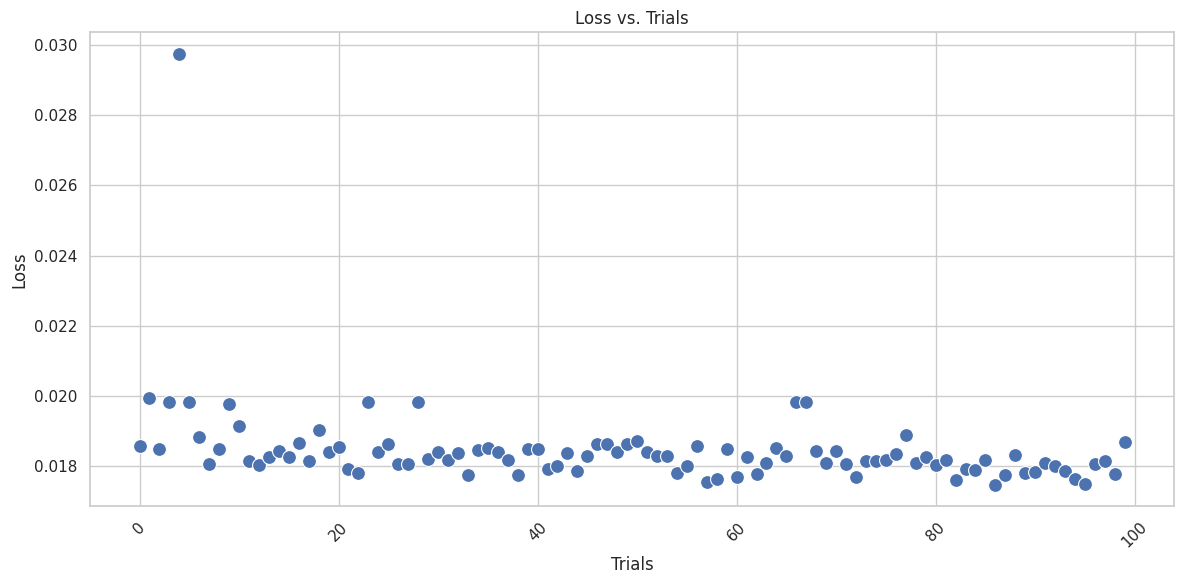

In [6]:
import optuna
import optuna
import matplotlib.pyplot as plt



class LSTM(nn.Module):

    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super(LSTM, self).__init__()

        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length

        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, batch_first=True) # LSTM
        self.fc_1 = nn.Linear(hidden_size, 128)  # fully connected 1
        self.fc = nn.Linear(128, num_classes*5)  # fully connected last layer with 3 output nodes for predicting 3 steps ahead

        self.relu = nn.ReLU()


    def forward(self, x):
        h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size))

        c_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size))

        output, (hn, cn) = self.lstm(x, (h_0, c_0))  # LSTM with input, hidden, and internal state
        hn = hn.view(-1, self.hidden_size)  # reshaping the data for Dense layer next
        out = self.relu(hn)
        out = self.fc_1(out)  # first Dense
        out = self.relu(out)  # relu
        out = self.fc(out)  # Final Output with 3 output nodes for predicting 3 steps ahead
        
        # Reshape the output to have 3 steps ahead for each dimension
        out = out.view(out.size(0), 5, self.num_classes)
        return out

def objective(trial):
    input_size = 4
    hidden_size = trial.suggest_int("hidden_size", 1, 10)
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1e-1)
  
    num_epochs = 500   
    num_layers=1
    num_classes = 4
    
    lstm = LSTM(num_classes, input_size, hidden_size, num_layers)
    criterion = torch.nn.MSELoss(reduction='mean')
    optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)
    
    #optimizer = torch.optim.SGD(lstm.parameters(), lr=learning_rate)
    
    # Train the model
    iter_no=0
    for epoch in range(num_epochs):
        outputs = lstm(trainX)
        #limpa os grandientes
        optimizer.zero_grad()
        
        # obtain the loss function
        loss = criterion(outputs, trainY)
        loss.backward()
        
        optimizer.step()
        
        iter_no += 1
        
        #validation
        outputs_val = lstm(valX)
        loss_val = criterion(outputs_val, valY)
        
        if epoch % 100 == 0:
            print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))
            print("Epoch: %d, val_loss: %1.5f" % (epoch, loss_val.item()))
            #plt.plot(epoch,running_loss)
            #writer.flush()
            print(loss)
    return loss

if __name__ == "__main__":
    study = optuna.create_study(direction="minimize")
    study.optimize(objective, n_trials=100)

    print("Number of finished trials: ", len(study.trials))
    print("Best trial:")
    trial = study.best_trial

    print("Value: ", trial.value)
    print("Params: ")
    for key, value in trial.params.items():
        print(f"    {key}: {value}")

    best_hidden_size = trial.params["hidden_size"]
    best_learning_rate = trial.params["learning_rate"]

    print("Best Hyperparameters:")
    print(f"Hidden Size: {best_hidden_size}")
    print(f"Learning Rate: {best_learning_rate}")

    # Extract the loss values and hyperparameters
    loss_values = [trial.value for trial in study.trials]
    hidden_sizes = [trial.params["hidden_size"] for trial in study.trials]
    learning_rates = [trial.params["learning_rate"] for trial in study.trials]

    # Create a DataFrame for easier plotting with Seaborn
    import pandas as pd
    df = pd.DataFrame({'Loss': loss_values, 'Hidden Size': hidden_sizes, 'Learning Rate': learning_rates})

   # Plot the loss values
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
ax = sns.scatterplot(data=df, x=df.index, y='Loss', palette="deep", s=100)
plt.title("Loss vs. Trials")
plt.xlabel("Trials")
plt.ylabel("Loss")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

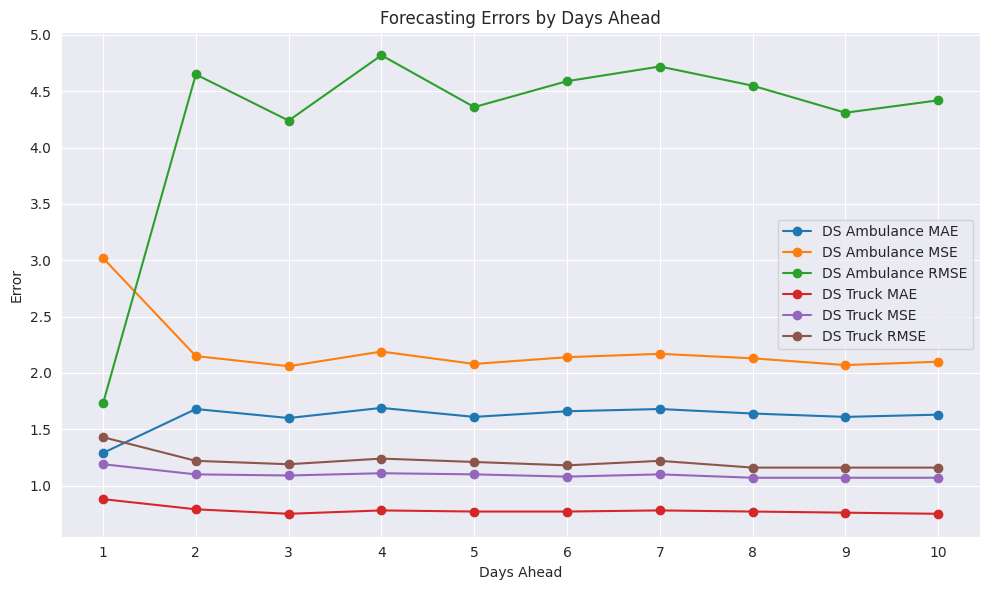

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = {
    'Days Ahead': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'DS-Ambulance-MAE': [1.29, 1.68, 1.60, 1.69, 1.61, 1.66, 1.68, 1.64, 1.61, 1.63],
    'DS-Ambulance-MSE': [3.02, 2.15, 2.06, 2.19, 2.08, 2.14, 2.17, 2.13, 2.07, 2.10],
    'DS-Ambulance-RMSE': [1.73, 4.65, 4.24, 4.82, 4.36, 4.59, 4.72, 4.55, 4.31, 4.42],
    'DS-Truck-MAE': [0.88, 0.79, 0.75, 0.78, 0.77, 0.77, 0.78, 0.77, 0.76, 0.75],
    'DS-Truck-MSE': [1.19, 1.10, 1.09, 1.11, 1.10, 1.08, 1.10, 1.07, 1.07, 1.07],
    'DS-Truck-RMSE': [1.43, 1.22, 1.19, 1.24, 1.21, 1.18, 1.22, 1.16, 1.16, 1.16]
}

df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot('Days Ahead', 'DS-Ambulance-MAE', data=df, marker='o', label='DS Ambulance MAE')
plt.plot('Days Ahead', 'DS-Ambulance-MSE', data=df, marker='o', label='DS Ambulance MSE')
plt.plot('Days Ahead', 'DS-Ambulance-RMSE', data=df, marker='o', label='DS Ambulance RMSE')
plt.plot('Days Ahead', 'DS-Truck-MAE', data=df, marker='o', label='DS Truck MAE')
plt.plot('Days Ahead', 'DS-Truck-MSE', data=df, marker='o', label='DS Truck MSE')
plt.plot('Days Ahead', 'DS-Truck-RMSE', data=df, marker='o', label='DS Truck RMSE')

plt.title('Forecasting Errors by Days Ahead')
plt.xlabel('Days Ahead')
plt.ylabel('Error')
plt.xticks(df['Days Ahead'])
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


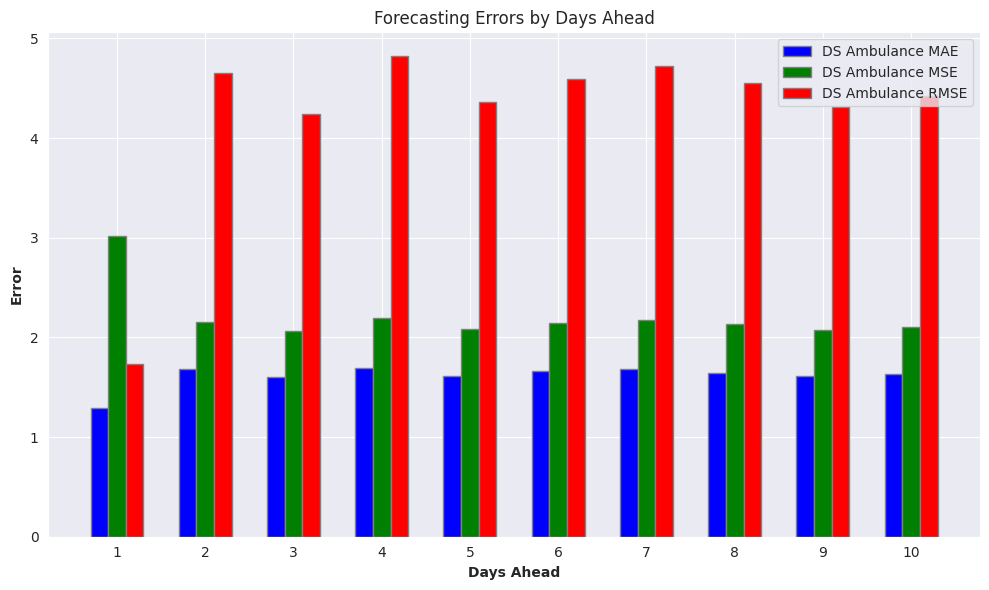

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Sample data
data = {
    'Days Ahead': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'DS-Ambulance-MAE': [1.29, 1.68, 1.60, 1.69, 1.61, 1.66, 1.68, 1.64, 1.61, 1.63],
    'DS-Ambulance-MSE': [3.02, 2.15, 2.06, 2.19, 2.08, 2.14, 2.17, 2.13, 2.07, 2.10],
    'DS-Ambulance-RMSE': [1.73, 4.65, 4.24, 4.82, 4.36, 4.59, 4.72, 4.55, 4.31, 4.42],
    'DS-Truck-MAE': [0.88, 0.79, 0.75, 0.78, 0.77, 0.77, 0.78, 0.77, 0.76, 0.75],
    'DS-Truck-MSE': [1.19, 1.10, 1.09, 1.11, 1.10, 1.08, 1.10, 1.07, 1.07, 1.07],
    'DS-Truck-RMSE': [1.43, 1.22, 1.19, 1.24, 1.21, 1.18, 1.22, 1.16, 1.16, 1.16]
}

df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(10, 6))

# Bar width
bar_width = 0.2

# Position of bars on x-axis
r1 = np.arange(len(df['Days Ahead']))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create bar plots
plt.bar(r1, df['DS-Ambulance-MAE'], color='b', width=bar_width, edgecolor='grey', label='DS Ambulance MAE')
plt.bar(r2, df['DS-Ambulance-MSE'], color='g', width=bar_width, edgecolor='grey', label='DS Ambulance MSE')
plt.bar(r3, df['DS-Ambulance-RMSE'], color='r', width=bar_width, edgecolor='grey', label='DS Ambulance RMSE')

# Add xticks on the middle of the group bars
plt.xlabel('Days Ahead', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(df['Days Ahead']))], df['Days Ahead'])

# Add y label
plt.ylabel('Error', fontweight='bold')

# Add a legend
plt.legend()

# Show plot
plt.title('Forecasting Errors by Days Ahead')
plt.tight_layout()
plt.show()


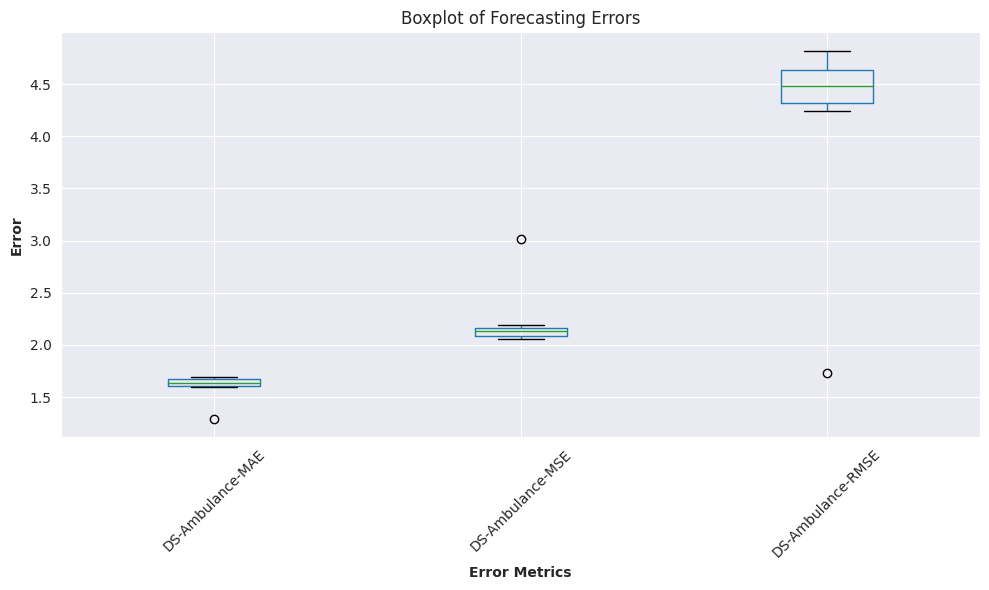

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = {
    'Days Ahead': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    'DS-Ambulance-MAE': [1.29, 1.68, 1.60, 1.69, 1.61, 1.66, 1.68, 1.64, 1.61, 1.63],
    'DS-Ambulance-MSE': [3.02, 2.15, 2.06, 2.19, 2.08, 2.14, 2.17, 2.13, 2.07, 2.10],
    'DS-Ambulance-RMSE': [1.73, 4.65, 4.24, 4.82, 4.36, 4.59, 4.72, 4.55, 4.31, 4.42],
    'DS-Truck-MAE': [0.88, 0.79, 0.75, 0.78, 0.77, 0.77, 0.78, 0.77, 0.76, 0.75],
    'DS-Truck-MSE': [1.19, 1.10, 1.09, 1.11, 1.10, 1.08, 1.10, 1.07, 1.07, 1.07],
    'DS-Truck-RMSE': [1.43, 1.22, 1.19, 1.24, 1.21, 1.18, 1.22, 1.16, 1.16, 1.16]
}

df = pd.DataFrame(data)

# Plotting boxplot
plt.figure(figsize=(10, 6))
df[['DS-Ambulance-MAE', 'DS-Ambulance-MSE', 'DS-Ambulance-RMSE']].boxplot()

# Add labels and title
plt.xlabel('Error Metrics', fontweight='bold')
plt.ylabel('Error', fontweight='bold')
plt.title('Boxplot of Forecasting Errors')

# Show plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<Figure size 2000x1000 with 0 Axes>

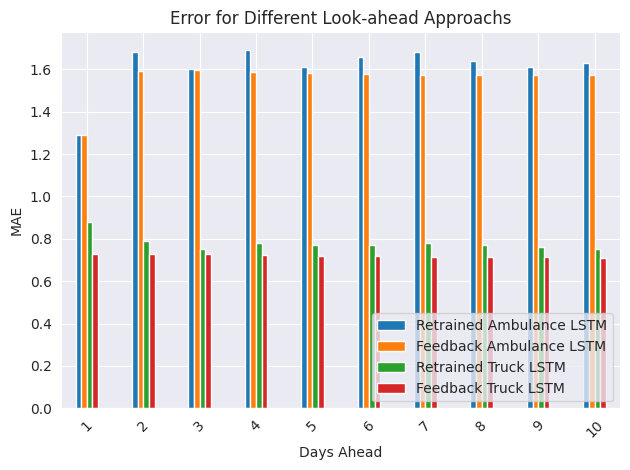

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Data from Table 1
data1 = {
    'Days Ahead': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'DS-Ambulance-MAE': [1.29, 1.68, 1.60, 1.69, 1.61, 1.66, 1.68, 1.64, 1.61, 1.63],
    'DS-Truck-MAE': [0.88, 0.79, 0.75, 0.78, 0.77, 0.77, 0.78, 0.77, 0.76, 0.75]
}

# Data from Table 2
data2 = {
    'Days Ahead': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'DS-Ambulance-MAE': [1.29, 1.594, 1.596, 1.587, 1.582, 1.578, 1.574, 1.573, 1.573, 1.574],
    'DS-Truck-MAE': [0.730, 0.730, 0.729, 0.723, 0.720, 0.718, 0.716, 0.713, 0.712, 0.711]
}

# Convert data to DataFrame
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

# Merge the two DataFrames on 'Days Ahead' column
merged_df = pd.merge(df1, df2, on='Days Ahead', suffixes=('_retrained', '_fed_back'))

# Plotting
plt.figure(figsize=(20, 10), facecolor='white')
merged_df.plot(x='Days Ahead', y=['DS-Ambulance-MAE_retrained', 'DS-Ambulance-MAE_fed_back', 'DS-Truck-MAE_retrained', 'DS-Truck-MAE_fed_back'], kind='bar', width=0.4)
plt.title('Error for Different Look-ahead Approachs')
plt.xlabel('Days Ahead')
plt.ylabel('MAE')
plt.legend(['Retrained Ambulance LSTM', 'Feedback Ambulance LSTM', 'Retrained Truck LSTM', 'Feedback Truck LSTM'], loc='lower right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


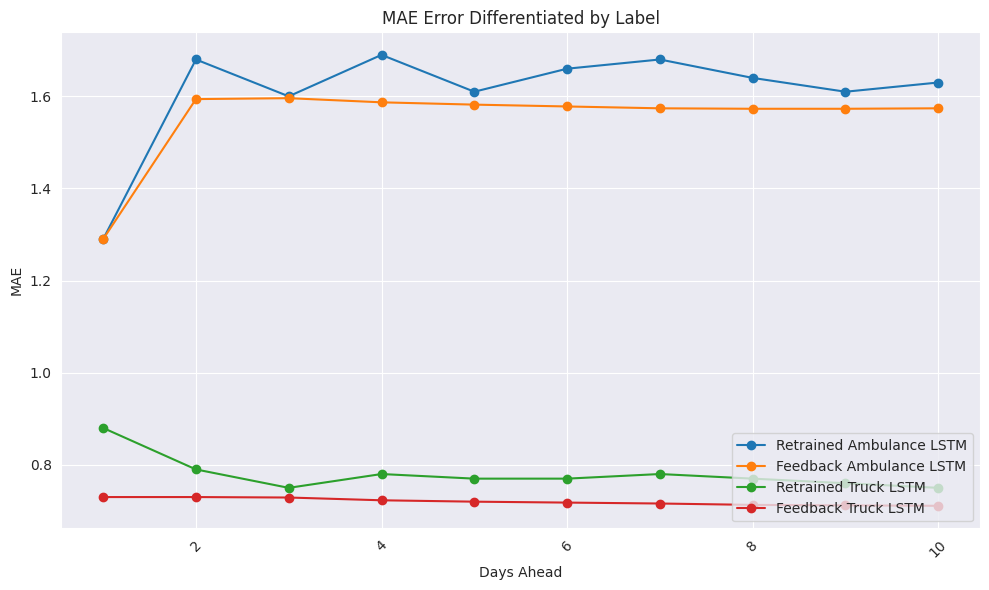

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Data from Table 1
data1 = {
    'Days Ahead': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'DS-Ambulance-MAE': [1.29, 1.68, 1.60, 1.69, 1.61, 1.66, 1.68, 1.64, 1.61, 1.63],
    'DS-Truck-MAE': [0.88, 0.79, 0.75, 0.78, 0.77, 0.77, 0.78, 0.77, 0.76, 0.75]
}

# Data from Table 2
data2 = {
    'Days Ahead': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'DS-Ambulance-MAE': [1.29, 1.594, 1.596, 1.587, 1.582, 1.578, 1.574, 1.573, 1.573, 1.574],
    'DS-Truck-MAE': [0.730, 0.730, 0.729, 0.723, 0.720, 0.718, 0.716, 0.713, 0.712, 0.711]
}

# Convert data to DataFrame
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

# Merge the two DataFrames on 'Days Ahead' column
merged_df = pd.merge(df1, df2, on='Days Ahead', suffixes=('_retrained', '_fed_back'))

# Plotting
plt.figure(figsize=(10, 6), facecolor='white')  # Set the background color to white
plt.plot(merged_df['Days Ahead'], merged_df['DS-Ambulance-MAE_retrained'], marker='o', label='Retrained Ambulance LSTM')
plt.plot(merged_df['Days Ahead'], merged_df['DS-Ambulance-MAE_fed_back'], marker='o', label='Feedback Ambulance LSTM')
plt.plot(merged_df['Days Ahead'], merged_df['DS-Truck-MAE_retrained'], marker='o', label='Retrained Truck LSTM')
plt.plot(merged_df['Days Ahead'], merged_df['DS-Truck-MAE_fed_back'], marker='o', label='Feedback Truck LSTM')
plt.title('MAE Error Differentiated by Label')
plt.xlabel('Days Ahead')
plt.ylabel('MAE')
plt.legend(loc='lower right')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


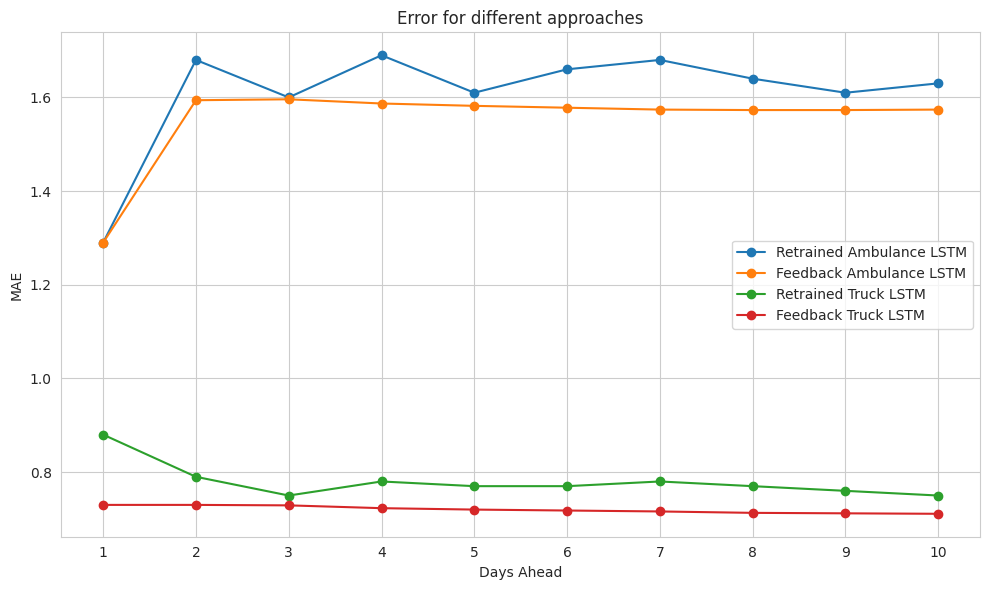

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style(style='whitegrid') 

# Data from Table 1
data1 = {
    'Days Ahead': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'DS-Ambulance-MAE': [1.29, 1.68, 1.60, 1.69, 1.61, 1.66, 1.68, 1.64, 1.61, 1.63],
    'DS-Truck-MAE': [0.88, 0.79, 0.75, 0.78, 0.77, 0.77, 0.78, 0.77, 0.76, 0.75]
}

# Data from Table 2
data2 = {
    'Days Ahead': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'DS-Ambulance-MAE': [1.29, 1.594, 1.596, 1.587, 1.582, 1.578, 1.574, 1.573, 1.573, 1.574],
    'DS-Truck-MAE': [0.730, 0.730, 0.729, 0.723, 0.720, 0.718, 0.716, 0.713, 0.712, 0.711]
}

# Convert data to DataFrame
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

# Merge the two DataFrames on 'Days Ahead' column
merged_df = pd.merge(df1, df2, on='Days Ahead', suffixes=('_retrained', '_fed_back'))

# Plotting
plt.figure(figsize=(10, 6), facecolor='white')  # Set the background color to white
plt.plot(merged_df['Days Ahead'], merged_df['DS-Ambulance-MAE_retrained'], marker='o', label='Retrained Ambulance LSTM')
plt.plot(merged_df['Days Ahead'], merged_df['DS-Ambulance-MAE_fed_back'], marker='o', label='Feedback Ambulance LSTM')
plt.plot(merged_df['Days Ahead'], merged_df['DS-Truck-MAE_retrained'], marker='o', label='Retrained Truck LSTM')
plt.plot(merged_df['Days Ahead'], merged_df['DS-Truck-MAE_fed_back'], marker='o', label='Feedback Truck LSTM')
plt.title('Error for different approaches')
plt.xlabel('Days Ahead')
plt.ylabel('MAE')
plt.legend(loc='center right')  # Placing the legend in the center right
plt.xticks(merged_df['Days Ahead'])
plt.grid(True)
plt.tight_layout()
plt.show()
